# Assignment 02

Name: Himanshu Tatawat

Roll Number: 12040660

References Used to Complete the Assignment

1.https://stackoverflow.com/questions/56090541/how-to-plot-precision-and-recall-of-multiclass-classifier 
2.https://stackoverflow.com/questions/15821116/how-to-measure-the-accuracy-of-knn-classifier-in-python
3.https://www.programcreek.com/python/example/99108/sklearn.svm.NuSVC



## Part A: Multi-Class Classification

Captchas were invented to prevent bots from attacking websites. But the ML models are breaking captchas. Thus, stronger captchas are being invented. In this part, we will train a ML model to break hcaptcha (https://www.hcaptcha.com/ )!!

Please download the following dataset: https://github.com/sarang-iitb/H-captcha-dataset

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from PIL import Image

### 0. Load the dataset

In [3]:
!git clone https://github.com/sarang-iitb/H-captcha-dataset

Cloning into 'H-captcha-dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [4]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall("n")
  zip_ref.close()

In [5]:
import zipfile
with zipfile.ZipFile("H-captcha-dataset/hcaptcha_dataset.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

### 1. Data Cleaning and Visualization

a) Check out the labels in the dataset. How many images belong to each class?

In [6]:
print(os.listdir("targetdir"))

['hcaptcha_dataset']


In [7]:
print(os.listdir("targetdir/hcaptcha_dataset"))

['test', 'train']


In [8]:
train = "targetdir/hcaptcha_dataset/train/"
test = "targetdir/hcaptcha_dataset/test/"

In [9]:
train_lab = os.listdir("targetdir/hcaptcha_dataset/train")
test_lab = os.listdir("targetdir/hcaptcha_dataset/test")

In [10]:
train_lab1 = print("The labels in train dataset are", train_lab)
test_lab1 = print("The labels in test dataset are", test_lab)

The labels in train dataset are ['motorbus', 'seaplane', 'motorcycle', 'bicycle', 'airplane', 'truck', 'boat']
The labels in test dataset are ['motorbus', 'seaplane', 'motorcycle', 'bicycle', 'airplane', 'truck', 'boat']


In [11]:
for i in train_lab:
    r1 = train + i
    images_count = os.listdir(str(r1))
    count = len(images_count)
    print("The no. of train images in",i, count)
    

The no. of train images in motorbus 256
The no. of train images in seaplane 280
The no. of train images in motorcycle 592
The no. of train images in bicycle 304
The no. of train images in airplane 402
The no. of train images in truck 656
The no. of train images in boat 528


In [12]:
for i in test_lab:
    r1 = test + i
    images_count = os.listdir(str(r1))
    count = len(images_count)
    print("The no. of test images in",i, count)

The no. of test images in motorbus 61
The no. of test images in seaplane 75
The no. of test images in motorcycle 141
The no. of test images in bicycle 71
The no. of test images in airplane 101
The no. of test images in truck 163
The no. of test images in boat 134


b) How many train and test images are present in your dataset? 

In [13]:
count = 0
for i in train_lab:
    r1 = train + i
    images_count = os.listdir(str(r1))
    count = len(images_count)+ count
    
print("The no. of images in train dataset", count)

The no. of images in train dataset 3018


In [14]:
count = 0
for i in test_lab:
    r1 = test + i
    images_count = os.listdir(str(r1))
    count = len(images_count) + count
    
print("The no. of images in test dataset", count)

The no. of images in test dataset 746


In [15]:

class_names_label = {class_name: i for i, class_name in enumerate(train_lab)}
nb_classes = len(train_lab)
IMAGE_SIZE = (32, 32)

Thus the image shape is not homogeneous so we have to resize our images to get uniform dataset analysis.

In [16]:
def load_data():
    datasets = [train, test]
    output = []
    
    for dataset in datasets:
        images = []
        labels = []
        print("Loading {}".format(dataset))
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                image = cv2.imread(img_path)
                print(image)
                if image is None:
                    print('Wrong path:', img_path)
                    continue
                else:
                    image = cv2.resize(image, IMAGE_SIZE)
#                     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    
                
                
                
                
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        output.append((images, labels))
    return output

In [17]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading targetdir/hcaptcha_dataset/train/


  0%|          | 0/256 [00:00<?, ?it/s]

[[[220 196 106]
  [225 201 111]
  [228 204 114]
  ...
  [236 218 123]
  [235 217 122]
  [230 212 117]]

 [[222 198 108]
  [227 203 113]
  [230 206 116]
  ...
  [238 220 125]
  [236 218 123]
  [231 213 118]]

 [[224 201 109]
  [230 207 115]
  [230 209 117]
  ...
  [239 223 126]
  [237 221 124]
  [232 216 119]]

 ...

 [[ 91 107  83]
  [ 90 106  82]
  [ 91 107  84]
  ...
  [ 64  85  46]
  [ 62  83  44]
  [ 60  81  42]]

 [[ 82 110  80]
  [ 78 109  78]
  [ 78 109  78]
  ...
  [ 66  87  48]
  [ 65  84  45]
  [ 62  81  42]]

 [[ 80 115  81]
  [ 76 111  77]
  [ 74 111  77]
  ...
  [ 64  85  46]
  [ 62  81  42]
  [ 58  77  38]]]
[[[240 235 232]
  [237 232 229]
  [232 227 224]
  ...
  [253 247 248]
  [240 234 235]
  [247 241 242]]

 [[240 235 232]
  [236 231 228]
  [232 227 224]
  ...
  [251 245 246]
  [235 229 230]
  [241 235 236]]

 [[240 235 232]
  [236 231 228]
  [232 227 224]
  ...
  [225 220 221]
  [205 200 201]
  [209 204 205]]

 ...

 [[165 165 177]
  [164 164 176]
  [163 163 175]
  ..

  7%|▋         | 19/256 [00:00<00:01, 170.28it/s]

[[[242 247 245]
  [241 246 244]
  [243 246 244]
  ...
  [151 174 169]
  [193 220 217]
  [197 226 223]]

 [[241 246 244]
  [241 246 244]
  [243 246 244]
  ...
  [152 174 169]
  [200 224 222]
  [203 230 227]]

 [[239 244 242]
  [240 245 243]
  [242 245 243]
  ...
  [157 174 170]
  [209 230 228]
  [211 233 231]]

 ...

 [[240 245 246]
  [241 246 247]
  [240 245 246]
  ...
  [222 224 224]
  [228 230 230]
  [226 228 228]]

 [[237 242 243]
  [238 243 244]
  [238 243 244]
  ...
  [251 252 250]
  [246 247 245]
  [247 248 246]]

 [[237 242 243]
  [238 243 244]
  [238 243 244]
  ...
  [251 252 250]
  [242 243 241]
  [248 249 247]]]
[[[224 230 235]
  [209 216 219]
  [200 207 210]
  ...
  [204 230 255]
  [202 227 255]
  [201 226 255]]

 [[205 211 216]
  [194 201 204]
  [190 197 200]
  ...
  [189 228 255]
  [188 226 255]
  [186 224 254]]

 [[193 199 204]
  [190 197 200]
  [199 206 209]
  ...
  [166 227 253]
  [162 225 253]
  [161 224 252]]

 ...

 [[185 190 199]
  [185 190 199]
  [187 192 201]
  ..

 14%|█▍        | 37/256 [00:00<00:01, 129.69it/s]

[[[201 211 218]
  [196 206 213]
  [155 166 170]
  ...
  [174 209 199]
  [185 220 210]
  [177 214 204]]

 [[199 209 216]
  [194 205 209]
  [151 162 166]
  ...
  [167 202 192]
  [176 211 201]
  [178 215 205]]

 [[199 211 215]
  [193 205 209]
  [151 162 166]
  ...
  [ 99 133 126]
  [ 93 127 120]
  [ 96 133 125]]

 ...

 [[227 228 226]
  [226 227 225]
  [223 224 222]
  ...
  [225 228 226]
  [230 233 231]
  [235 238 236]]

 [[254 255 253]
  [254 255 253]
  [253 254 252]
  ...
  [196 199 197]
  [202 205 203]
  [207 210 208]]

 [[254 255 253]
  [255 255 254]
  [255 255 254]
  ...
  [197 200 198]
  [203 206 204]
  [209 212 210]]]
[[[151 164 156]
  [151 164 156]
  [186 199 191]
  ...
  [237 236 240]
  [236 235 239]
  [235 234 238]]

 [[157 170 162]
  [137 152 144]
  [185 198 190]
  ...
  [237 236 240]
  [236 235 239]
  [235 234 238]]

 [[ 57  72  64]
  [ 42  59  50]
  [126 141 133]
  ...
  [234 236 237]
  [235 234 236]
  [235 234 236]]

 ...

 [[140 144 138]
  [136 140 134]
  [ 38  42  36]
  ..

 24%|██▍       | 62/256 [00:00<00:01, 174.39it/s]

[[[255 255 250]
  [255 252 247]
  [241 237 232]
  ...
  [246 242 237]
  [247 243 238]
  [248 244 239]]

 [[255 254 249]
  [255 252 247]
  [241 237 232]
  ...
  [245 241 236]
  [245 241 236]
  [246 242 237]]

 [[255 254 249]
  [255 251 246]
  [241 237 232]
  ...
  [238 234 229]
  [237 233 228]
  [237 233 228]]

 ...

 [[113 115 116]
  [112 114 115]
  [110 112 113]
  ...
  [133 135 136]
  [239 241 242]
  [238 240 241]]

 [[183 185 186]
  [180 182 183]
  [177 179 180]
  ...
  [135 137 138]
  [241 243 244]
  [240 242 243]]

 [[188 190 191]
  [184 186 187]
  [179 181 182]
  ...
  [135 137 138]
  [242 244 245]
  [241 243 244]]]
[[[248 246 245]
  [248 246 245]
  [246 247 245]
  ...
  [242 245 243]
  [242 245 243]
  [242 245 243]]

 [[248 246 245]
  [248 246 245]
  [246 247 245]
  ...
  [242 245 243]
  [242 245 243]
  [242 245 243]]

 [[245 246 244]
  [245 246 244]
  [245 246 244]
  ...
  [242 245 243]
  [242 245 243]
  [242 245 243]]

 ...

 [[118 115 117]
  [121 118 120]
  [ 69  66  68]
  ..

 35%|███▍      | 89/256 [00:00<00:00, 201.08it/s]

[[[180 155 151]
  [181 156 152]
  [183 158 154]
  ...
  [180 161 158]
  [241 224 221]
  [238 221 218]]

 [[181 156 152]
  [181 156 152]
  [183 158 154]
  ...
  [179 160 157]
  [240 223 220]
  [238 221 218]]

 [[182 157 155]
  [182 157 155]
  [183 158 154]
  ...
  [178 159 156]
  [239 222 219]
  [236 219 216]]

 ...

 [[120 127 144]
  [120 127 144]
  [121 128 145]
  ...
  [125 133 150]
  [126 134 151]
  [126 134 151]]

 [[124 129 144]
  [124 129 144]
  [124 129 144]
  ...
  [149 157 174]
  [151 159 176]
  [151 159 176]]

 [[125 130 145]
  [125 130 145]
  [125 130 145]
  ...
  [152 160 177]
  [153 161 178]
  [154 162 179]]]
[[[253 247 240]
  [252 246 239]
  [252 246 239]
  ...
  [235 240 238]
  [246 253 250]
  [247 254 251]]

 [[247 244 236]
  [247 244 236]
  [247 244 236]
  ...
  [235 240 238]
  [247 252 250]
  [247 254 251]]

 [[243 241 233]
  [242 240 232]
  [242 240 232]
  ...
  [234 239 237]
  [246 251 249]
  [247 252 250]]

 ...

 [[199 211 211]
  [199 211 211]
  [174 186 186]
  ..

 45%|████▌     | 116/256 [00:00<00:00, 222.63it/s]


[[[200 164 146]
  [200 164 146]
  [198 162 144]
  ...
  [153 122 101]
  [197 166 145]
  [200 169 148]]

 [[202 166 148]
  [202 166 148]
  [201 165 147]
  ...
  [155 124 103]
  [198 167 146]
  [201 170 149]]

 [[154 121 102]
  [153 120 101]
  [153 120 101]
  ...
  [158 127 106]
  [200 169 148]
  [203 172 151]]

 ...

 [[112 116 111]
  [111 115 110]
  [ 44  48  43]
  ...
  [ 52  55  53]
  [ 53  56  54]
  [ 54  57  55]]

 [[115 119 113]
  [112 116 110]
  [ 44  48  42]
  ...
  [ 51  54  52]
  [ 52  55  53]
  [ 53  56  54]]

 [[116 120 114]
  [113 117 111]
  [ 43  47  41]
  ...
  [ 50  53  51]
  [ 51  54  52]
  [ 52  55  53]]]
[[[251 253 254]
  [251 253 254]
  [251 253 254]
  ...
  [255 250 252]
  [255 253 255]
  [249 243 248]]

 [[251 253 254]
  [251 253 254]
  [251 253 254]
  ...
  [245 239 240]
  [247 241 242]
  [240 234 235]]

 [[251 253 254]
  [251 253 254]
  [250 252 253]
  ...
  [162 151 147]
  [169 158 154]
  [170 159 155]]

 ...

 [[179 153 137]
  [182 156 140]
  [185 159 143]
  .

 58%|█████▊    | 149/256 [00:00<00:00, 249.88it/s]


[[[186 135  92]
  [185 134  91]
  [183 132  89]
  ...
  [172 144 114]
  [255 247 225]
  [255 246 227]]

 [[184 133  90]
  [184 133  90]
  [182 131  88]
  ...
  [172 143 116]
  [255 247 226]
  [255 245 227]]

 [[182 131  88]
  [182 131  88]
  [181 130  87]
  ...
  [167 142 116]
  [255 245 226]
  [254 241 225]]

 ...

 [[250 255 255]
  [250 255 255]
  [186 192 197]
  ...
  [166 173 182]
  [168 172 183]
  [165 172 181]]

 [[244 249 252]
  [247 252 255]
  [175 181 186]
  ...
  [237 243 250]
  [239 241 251]
  [237 243 250]]

 [[245 250 253]
  [249 254 255]
  [176 182 187]
  ...
  [241 244 252]
  [241 244 252]
  [241 244 252]]]
[[[119 124 123]
  [117 122 121]
  [ 46  51  50]
  ...
  [220 225 224]
  [234 239 238]
  [231 236 235]]

 [[119 124 123]
  [114 119 118]
  [ 42  47  46]
  ...
  [217 222 221]
  [224 229 228]
  [220 225 224]]

 [[116 121 122]
  [112 117 118]
  [ 42  47  48]
  ...
  [224 229 228]
  [225 230 229]
  [222 227 226]]

 ...

 [[112 123 131]
  [114 125 133]
  [115 126 134]
  .

 68%|██████▊   | 175/256 [00:00<00:00, 240.98it/s]


[[[222 234 228]
  [221 233 227]
  [225 233 226]
  ...
  [ 92 105 127]
  [ 78  86 103]
  [ 78  84  97]]

 [[221 231 225]
  [222 232 226]
  [224 232 225]
  ...
  [ 91 105 127]
  [ 84  92 109]
  [ 90  96 109]]

 [[228 235 230]
  [231 238 233]
  [234 241 234]
  ...
  [ 81  98 119]
  [ 64  74  91]
  [ 65  73  86]]

 ...

 [[109 122 148]
  [106 121 147]
  [108 121 147]
  ...
  [ 83  97 120]
  [ 85  99 121]
  [ 85  99 121]]

 [[112 123 150]
  [110 123 149]
  [108 119 146]
  ...
  [ 80  96 119]
  [ 83 100 121]
  [ 82  99 120]]

 [[114 125 152]
  [112 123 150]
  [108 119 146]
  ...
  [ 79  95 118]
  [ 82  99 120]
  [ 81  98 119]]]
[[[210 209 205]
  [215 214 210]
  [177 174 170]
  ...
  [ 55  53  53]
  [131 129 129]
  [130 128 128]]

 [[213 212 208]
  [215 214 210]
  [175 172 168]
  ...
  [ 54  52  52]
  [130 128 128]
  [129 127 127]]

 [[180 179 175]
  [178 177 173]
  [132 129 125]
  ...
  [ 50  50  50]
  [126 126 126]
  [125 125 125]]

 ...

 [[ 89  86  82]
  [ 89  86  82]
  [ 90  87  83]
  .

 78%|███████▊  | 200/256 [00:00<00:00, 235.23it/s]

[[[160 164 165]
  [170 174 175]
  [192 196 197]
  ...
  [ 56  62  67]
  [121 125 130]
  [130 134 139]]

 [[156 160 161]
  [167 171 172]
  [190 194 195]
  ...
  [ 62  68  73]
  [121 125 130]
  [126 130 135]]

 [[149 153 154]
  [160 164 165]
  [179 183 184]
  ...
  [ 74  79  82]
  [125 130 133]
  [125 130 133]]

 ...

 [[167 169 170]
  [164 166 167]
  [135 137 138]
  ...
  [133 135 136]
  [131 133 134]
  [129 131 132]]

 [[169 171 172]
  [165 167 168]
  [134 136 137]
  ...
  [132 134 135]
  [129 131 132]
  [127 129 130]]

 [[170 172 173]
  [165 167 168]
  [134 136 137]
  ...
  [131 133 134]
  [128 130 131]
  [126 128 129]]]
[[[238 233 230]
  [246 241 238]
  [ 60  55  52]
  ...
  [168 159 155]
  [168 159 155]
  [167 158 154]]

 [[232 227 224]
  [241 236 233]
  [ 63  58  55]
  ...
  [166 157 153]
  [165 156 152]
  [164 155 151]]

 [[249 244 241]
  [249 244 241]
  [ 73  68  65]
  ...
  [ 75  64  60]
  [ 72  61  57]
  [ 71  60  56]]

 ...

 [[ 69  70  68]
  [ 84  85  83]
  [100 101  99]
  ..

 89%|████████▊ | 227/256 [00:01<00:00, 240.22it/s]

[[[249 248 252]
  [245 244 248]
  [240 239 241]
  ...
  [244 247 245]
  [243 246 244]
  [242 245 243]]

 [[250 249 253]
  [246 245 249]
  [240 239 241]
  ...
  [243 246 244]
  [243 246 244]
  [242 245 243]]

 [[250 249 251]
  [246 245 247]
  [241 240 242]
  ...
  [243 246 244]
  [242 245 243]
  [241 244 242]]

 ...

 [[ 70  58  58]
  [ 69  57  57]
  [ 68  56  54]
  ...
  [ 53  58  57]
  [ 54  59  58]
  [ 54  59  58]]

 [[ 99  87  85]
  [ 97  85  83]
  [ 94  82  80]
  ...
  [ 55  57  57]
  [ 55  57  57]
  [ 55  57  57]]

 [[104  92  90]
  [101  89  87]
  [ 95  83  81]
  ...
  [ 56  58  58]
  [ 55  57  57]
  [ 55  57  57]]]
[[[218 167 105]
  [216 166 106]
  [216 164 111]
  ...
  [214 180 120]
  [216 182 122]
  [216 182 122]]

 [[216 168 102]
  [214 168 104]
  [212 166 108]
  ...
  [215 181 121]
  [216 182 122]
  [217 183 123]]

 [[211 172  98]
  [211 171  99]
  [209 170 102]
  ...
  [215 181 122]
  [216 182 123]
  [217 183 124]]

 ...

 [[ 62  70  60]
  [ 64  71  64]
  [ 64  70  65]
  ..

 99%|█████████▉| 253/256 [00:01<00:00, 241.03it/s]

[[[249 245 250]
  [249 245 250]
  [250 246 252]
  ...
  [243 242 251]
  [247 246 255]
  [248 249 255]]

 [[247 243 248]
  [247 243 248]
  [248 244 249]
  ...
  [242 242 248]
  [245 247 255]
  [247 250 255]]

 [[243 242 244]
  [243 242 244]
  [243 242 244]
  ...
  [239 244 247]
  [241 247 252]
  [245 251 255]]

 ...

 [[252 250 250]
  [255 254 254]
  [189 187 187]
  ...
  [148 145 147]
  [148 145 147]
  [148 145 147]]

 [[252 250 250]
  [255 255 255]
  [195 193 193]
  ...
  [176 173 175]
  [177 174 176]
  [178 175 177]]

 [[253 251 251]
  [255 255 255]
  [198 196 196]
  ...
  [180 177 179]
  [183 180 182]
  [184 181 183]]]
[[[245 248 246]
  [246 249 247]
  [247 250 248]
  ...
  [196 181 178]
  [213 200 198]
  [213 200 198]]

 [[245 248 246]
  [246 249 247]
  [247 250 248]
  ...
  [195 180 177]
  [212 199 197]
  [212 199 197]]

 [[246 249 247]
  [246 249 247]
  [248 251 249]
  ...
  [177 165 161]
  [200 187 185]
  [204 191 189]]

 ...

 [[165 146 131]
  [165 146 131]
  [164 145 130]
  ..

100%|██████████| 256/256 [00:01<00:00, 219.83it/s]


[[[255 252 233]
  [255 251 232]
  [255 250 231]
  ...
  [210 189 151]
  [238 219 182]
  [240 221 184]]

 [[255 251 229]
  [255 250 228]
  [255 250 228]
  ...
  [210 189 151]
  [238 219 182]
  [240 221 184]]

 [[202 186 157]
  [202 186 157]
  [202 186 157]
  ...
  [210 189 151]
  [237 218 181]
  [239 220 183]]

 ...

 [[216 230 228]
  [210 223 225]
  [ 53  66  74]
  ...
  [ 74  88 100]
  [ 78  89 103]
  [ 76  90 102]]

 [[222 236 234]
  [213 226 228]
  [ 55  68  76]
  ...
  [213 225 235]
  [217 226 239]
  [216 228 238]]

 [[226 240 238]
  [217 231 230]
  [ 57  70  78]
  ...
  [219 229 239]
  [221 231 241]
  [223 233 243]]]
[[[ 95 107 149]
  [ 98 109 153]
  [106 119 165]
  ...
  [179 197 214]
  [177 194 215]
  [177 194 215]]

 [[ 98 109 153]
  [ 99 110 154]
  [105 117 165]
  ...
  [182 200 217]
  [180 197 218]
  [180 197 218]]

 [[102 112 159]
  [ 99 109 156]
  [104 115 165]
  ...
  [186 202 219]
  [182 196 218]
  [181 195 217]]

 ...

 [[101 110 153]
  [101 110 153]
  [101 110 153]
  ..

  0%|          | 0/280 [00:00<?, ?it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

  8%|▊         | 21/280 [00:00<00:01, 209.23it/s]

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..

 15%|█▌        | 42/280 [00:00<00:01, 207.46it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 23%|██▎       | 64/280 [00:00<00:01, 198.66it/s]

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 31%|███       | 86/280 [00:00<00:01, 190.41it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 40%|███▉      | 111/280 [00:00<00:00, 206.33it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 54%|█████▍    | 151/280 [00:00<00:00, 266.83it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 66%|██████▋   | 186/280 [00:00<00:00, 291.39it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 77%|███████▋  | 216/280 [00:00<00:00, 269.75it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  .

 89%|████████▊ | 248/280 [00:00<00:00, 282.20it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

100%|██████████| 280/280 [00:01<00:00, 257.03it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[254 253 255]
  [254 253 255]
  [254 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 253 255]
  [254 253 255]
  [254 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 253 255]
  [254 253 255]
  [254 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

  0%|          | 0/592 [00:00<?, ?it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 ...

 [[243 243 243]
  [252 252 252]
  [247 247 247]
  ...
  [248 250 251]
  [248 250 251]
  [248 250 251]]

 [[250 250 250]
  [255 255 255]
  [249 249 249]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 [[254 254 254]
  [255 255 255]
  [249 249 249]
  ...
  [248 250 251]
  [248 250 251]
  [249 251 252]]]
[[[124 131 124]
  [131 138 131]
  [135 142 137]
  ...
  [199 187 183]
  [195 183 179]
  [196 184 180]]

 [[127 134 127]
  [132 139 132]
  [134 141 136]
  ...
  [201 189 185]
  [195 183 179]
  [195 183 179]]

 [[128 135 128]
  [129 136 129]
  [127 134 129]
  ...
  [204 192 188]
  [197 185 181]
  [195 183 179]]

 ...

 [[120 120 120]
  [119 119 119]
  [118 118 118]
  ..

  3%|▎         | 17/592 [00:00<00:04, 125.14it/s]

[[[246 248 249]
  [246 248 249]
  [246 248 249]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 [[246 248 249]
  [246 248 249]
  [246 248 249]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 [[246 248 249]
  [246 248 249]
  [246 248 249]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 ...

 [[248 248 248]
  [249 249 249]
  [250 250 250]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[250 250 250]
  [249 249 249]
  [249 249 249]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]]
[[[200 207 204]
  [200 207 204]
  [199 204 202]
  ...
  [ 10  57  48]
  [  4  54  44]
  [  1  51  41]]

 [[196 203 200]
  [195 202 199]
  [195 200 198]
  ...
  [  8  55  46]
  [  6  53  44]
  [  3  53  43]]

 [[ 18  25  22]
  [ 17  24  21]
  [ 16  23  20]
  ...
  [ 27  74  65]
  [ 28  75  66]
  [ 30  77  68]]

 ...

 [[206 217 221]
  [190 208 209]
  [ 58  83  85]
  ..

  5%|▌         | 30/592 [00:00<00:05, 110.97it/s]

[[[ 90 165 137]
  [ 89 164 136]
  [ 78 153 125]
  ...
  [105 133 113]
  [ 82 104  85]
  [ 95 114  95]]

 [[ 86 160 134]
  [ 88 163 135]
  [ 79 153 127]
  ...
  [106 134 114]
  [ 81 103  85]
  [ 88 107  88]]

 [[ 82 154 131]
  [ 86 159 133]
  [ 77 149 126]
  ...
  [121 149 130]
  [ 96 117 102]
  [ 94 112  95]]

 ...

 [[111 126 128]
  [112 125 127]
  [113 125 127]
  ...
  [113 115 116]
  [113 115 116]
  [116 118 119]]

 [[110 123 125]
  [109 122 124]
  [109 121 123]
  ...
  [110 112 113]
  [110 112 113]
  [113 115 116]]

 [[108 121 123]
  [106 119 121]
  [106 118 120]
  ...
  [109 111 112]
  [110 112 113]
  [113 115 116]]]
[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 254 254]
  [255 254 255]
  [250 244 245]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [255 255 255]
  [255 254 255]
  [255 250 251]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [248 246 246]
  [254 249 250]
  [250 245 246]]

 ...

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ..

  9%|▉         | 52/592 [00:00<00:03, 152.64it/s]

[[[239 237 249]
  [224 224 238]
  [ 87  87 105]
  ...
  [213 221 228]
  [223 229 242]
  [221 226 241]]

 [[238 236 248]
  [224 224 236]
  [ 85  88 103]
  ...
  [213 222 231]
  [234 239 254]
  [226 233 250]]

 [[231 232 242]
  [220 222 232]
  [ 81  87 100]
  ...
  [ 62  71  85]
  [ 80  85 106]
  [ 63  69  92]]

 ...

 [[169 177 184]
  [172 181 185]
  [174 182 189]
  ...
  [102 113 117]
  [230 239 243]
  [230 239 243]]

 [[244 249 255]
  [245 251 255]
  [247 249 255]
  ...
  [105 112 121]
  [232 237 246]
  [232 238 245]]

 [[247 249 255]
  [248 250 255]
  [248 249 255]
  ...
  [110 116 127]
  [238 243 252]
  [237 242 251]]]
[[[250 252 253]
  [250 252 253]
  [250 252 253]
  ...
  [243 245 246]
  [246 248 249]
  [249 251 252]]

 [[248 250 251]
  [247 249 250]
  [247 249 250]
  ...
  [243 245 246]
  [246 248 249]
  [249 251 252]]

 [[244 246 247]
  [244 246 247]
  [244 246 247]
  ...
  [243 245 246]
  [246 248 249]
  [249 251 252]]

 ...

 [[255 255 255]
  [255 255 255]
  [248 248 248]
  ..

 12%|█▏        | 70/592 [00:00<00:03, 155.51it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [241 241 241]
  [247 247 247]
  [245 245 245]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [244 244 244]
  [250 250 250]
  [246 246 246]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [242 242 242]
  [255 255 255]
  [246 246 246]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 17%|█▋        | 99/592 [00:00<00:02, 199.01it/s]


[[[241 243 244]
  [241 243 244]
  [241 243 244]
  ...
  [241 243 244]
  [244 246 247]
  [247 249 250]]

 [[241 243 244]
  [241 243 244]
  [241 243 244]
  ...
  [241 243 244]
  [244 246 247]
  [247 249 250]]

 [[241 243 244]
  [241 243 244]
  [241 243 244]
  ...
  [241 243 244]
  [244 246 247]
  [247 249 250]]

 ...

 [[253 255 255]
  [251 253 254]
  [249 251 252]
  ...
  [245 247 248]
  [245 247 248]
  [245 247 248]]

 [[253 255 255]
  [251 253 254]
  [249 251 252]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 [[253 255 255]
  [251 253 254]
  [249 251 252]
  ...
  [249 251 252]
  [249 251 252]
  [249 251 252]]]
[[[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  .

 22%|██▏       | 130/592 [00:00<00:01, 232.53it/s]


[[[130 131 129]
  [130 131 129]
  [130 131 129]
  ...
  [129 130 128]
  [129 130 128]
  [129 130 128]]

 [[130 131 129]
  [130 131 129]
  [130 131 129]
  ...
  [130 131 129]
  [129 130 128]
  [129 130 128]]

 [[130 131 129]
  [130 131 129]
  [129 130 128]
  ...
  [130 131 129]
  [130 131 129]
  [129 130 128]]

 ...

 [[248 250 251]
  [248 250 251]
  [248 250 251]
  ...
  [248 250 251]
  [248 250 251]
  [248 250 251]]

 [[248 250 251]
  [248 250 251]
  [248 250 251]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 [[248 250 251]
  [248 250 251]
  [248 250 251]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]]
[[[205 207 208]
  [197 199 200]
  [188 190 191]
  ...
  [185 187 188]
  [185 187 188]
  [185 187 188]]

 [[204 206 207]
  [197 199 200]
  [188 190 191]
  ...
  [185 187 188]
  [185 187 188]
  [185 187 188]]

 [[203 205 206]
  [197 199 200]
  [188 190 191]
  ...
  [185 187 188]
  [185 187 188]
  [185 187 188]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  .

 26%|██▌       | 154/592 [00:00<00:02, 217.34it/s]


[[[171 200 191]
  [172 201 192]
  [104 135 126]
  ...
  [234 252 245]
  [234 255 247]
  [239 255 252]]

 [[164 193 184]
  [171 202 193]
  [116 147 138]
  ...
  [236 255 251]
  [234 255 249]
  [234 255 250]]

 [[151 182 173]
  [152 186 176]
  [ 92 126 116]
  ...
  [131 160 151]
  [135 164 155]
  [134 165 156]]

 ...

 [[111 182 155]
  [111 182 155]
  [108 182 154]
  ...
  [ 78 163 135]
  [102 186 161]
  [101 185 160]]

 [[181 243 219]
  [181 243 219]
  [181 243 219]
  ...
  [ 86 171 143]
  [109 193 168]
  [106 190 165]]

 [[183 241 217]
  [185 243 219]
  [185 243 219]
  ...
  [ 91 176 148]
  [113 197 172]
  [107 191 166]]]
[[[240 243 248]
  [241 244 249]
  [238 241 246]
  ...
  [ 41  44  48]
  [150 153 157]
  [155 158 162]]

 [[236 239 244]
  [238 241 246]
  [235 238 243]
  ...
  [ 41  44  48]
  [150 153 157]
  [153 156 160]]

 [[105 109 114]
  [106 110 115]
  [104 108 113]
  ...
  [ 41  44  48]
  [148 151 155]
  [150 153 157]]

 ...

 [[151 161 168]
  [146 156 163]
  [ 49  59  66]
  .

 30%|██▉       | 177/592 [00:00<00:02, 205.13it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[251 242 222]
  [251 242 222]
  [251 242 222]
  ...
  [243 238 217]
  [242 238 214]
  [242 238 214]]

 [[249 240 220]
  [249 240 220]
  [249 240 220]
  ...
  [245 240 219]
  [244 239 218]
  [243 239 215]]

 [[242 233 213]
  [242 233 213]
  [242 233 213]
  ...
  [247 241 222]
  [243 239 220]
  [241 238 217]]

 ...

 [[153 154 152]
  [158 159 157]
  [ 98  99  97]
  ..

 36%|███▌      | 211/592 [00:01<00:01, 242.39it/s]


[[[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 252 252]
  [251 251 251]
  [250 250 250]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 252 252]
  [251 251 251]
  [250 250 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [252 252 252]
  [251 251 251]
  [250 250 250]]]
[[[247 249 250]
  [247 249 250]
  [247 249 250]
  ...
  [248 250 251]
  [249 251 252]
  [250 252 253]]

 [[247 249 250]
  [247 249 250]
  [247 249 250]
  ...
  [248 250 251]
  [249 251 252]
  [250 252 253]]

 [[247 249 250]
  [247 249 250]
  [248 250 251]
  ...
  [248 250 251]
  [249 251 252]
  [250 252 253]]

 ...

 [[232 232 232]
  [233 233 233]
  [163 163 163]
  .

 40%|████      | 237/592 [00:01<00:01, 239.73it/s]

[[[196 211 207]
  [194 211 207]
  [195 216 208]
  ...
  [ 41 123  94]
  [ 55 134 107]
  [ 53 130 103]]

 [[203 218 214]
  [197 214 210]
  [199 222 214]
  ...
  [ 53 133 104]
  [ 59 136 108]
  [ 51 126  98]]

 [[ 44  62  55]
  [ 45  66  58]
  [ 73  96  88]
  ...
  [ 59 135 104]
  [ 56 130 100]
  [ 45 117  87]]

 ...

 [[215 236 234]
  [217 241 239]
  [143 176 172]
  ...
  [104 117 119]
  [107 120 122]
  [109 122 124]]

 [[223 241 242]
  [220 241 242]
  [148 179 178]
  ...
  [206 221 224]
  [208 223 226]
  [210 225 228]]

 [[226 244 245]
  [217 238 239]
  [144 175 174]
  ...
  [206 221 224]
  [208 223 226]
  [210 225 228]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 46%|████▌     | 272/592 [00:01<00:01, 270.22it/s]

[[[ 68  87  84]
  [ 71  90  87]
  [ 83 102  99]
  ...
  [ 45  72  62]
  [ 57  84  74]
  [ 74 101  91]]

 [[ 85 104 101]
  [ 92 111 108]
  [ 89 108 105]
  ...
  [ 52  79  69]
  [ 58  85  75]
  [ 69  96  86]]

 [[ 66  83  79]
  [ 79  96  92]
  [ 85 102  98]
  ...
  [ 59  86  76]
  [ 60  87  77]
  [ 63  90  80]]

 ...

 [[151 144 149]
  [147 140 143]
  [142 137 139]
  ...
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[154 147 150]
  [151 144 147]
  [146 141 143]
  ...
  [112 112 112]
  [113 113 113]
  [113 113 113]]

 [[149 142 145]
  [146 139 142]
  [141 136 137]
  ...
  [112 112 112]
  [114 114 114]
  [114 114 114]]]
[[[ 16  22  17]
  [ 15  21  16]
  [ 11  17  12]
  ...
  [  0   1   1]
  [108 110 110]
  [113 115 115]]

 [[ 17  23  18]
  [ 16  22  17]
  [ 12  18  13]
  ...
  [  0   0   0]
  [107 109 109]
  [111 113 113]]

 [[ 13  19  14]
  [ 14  20  15]
  [ 11  17  12]
  ...
  [  0   0   0]
  [104 106 106]
  [106 108 108]]

 ...

 [[128 129 127]
  [130 131 129]
  [ 40  41  39]
  ..

 52%|█████▏    | 305/592 [00:01<00:01, 280.39it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[252 252 252]
  [252 252 252]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[252 252 252]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[ 39  37  37]
  [ 35  33  33]
  [ 31  29  29]
  .

 57%|█████▋    | 336/592 [00:01<00:00, 288.33it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [207 207 207]
  [210 210 210]
  [214 214 214]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [251 251 251]
  [249 249 249]
  [251 251 251]]]
[[[252 254 255]
  [251 253 254]
  [250 252 253]
  ...
  [251 253 254]
  [251 253 254]
  [251 253 254]]

 [[252 254 255]
  [251 253 254]
  [250 252 253]
  ...
  [249 251 252]
  [249 251 252]
  [249 251 252]]

 [[252 254 255]
  [251 253 254]
  [250 252 253]
  ...
  [247 249 250]
  [247 249 250]
  [247 249 250]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  .

 68%|██████▊   | 401/592 [00:01<00:00, 294.68it/s]

[[[251 253 254]
  [251 253 254]
  [251 253 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[251 253 254]
  [251 253 254]
  [251 253 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[251 253 254]
  [251 253 254]
  [251 253 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [250 252 253]
  [250 252 253]
  [249 251 252]]

 [[251 251 251]
  [251 251 251]
  [252 252 252]
  ...
  [250 252 253]
  [249 251 252]
  [249 251 252]]

 [[250 250 250]
  [251 251 251]
  [252 252 252]
  ...
  [249 251 252]
  [249 251 252]
  [249 251 252]]]
[[[254 243 229]
  [253 242 228]
  [247 236 222]
  ...
  [114 131 117]
  [197 214 200]
  [189 206 192]]

 [[251 240 226]
  [250 239 225]
  [246 235 221]
  ...
  [116 133 119]
  [196 213 199]
  [190 207 193]]

 [[248 240 223]
  [249 241 224]
  [248 240 223]
  ...
  [122 136 124]
  [194 208 196]
  [192 206 194]]

 ...

 [[ 93 111 112]
  [ 87 105 106]
  [ 69  87  88]
  ..

 73%|███████▎  | 431/592 [00:01<00:00, 265.65it/s]

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[250 250 250]
  [247 247 247]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [248 248 248]
  [255 255 255]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [249 249 249]
  [255 255 255]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]]
[[[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [252 252 252]
  [251 251 251]
  [251 251 251]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [252 252 252]
  [252 252 252]
  [251 251 251]]

 ...

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ..

 78%|███████▊  | 459/592 [00:01<00:00, 243.49it/s]


[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[250 252 253]
  [250 252 253]
  [250 252 253]
  ...
  [250 252 253]
  [251 253 254]
  [250 252 253]]

 [[251 253 254]
  [251 253 254]
  [251 253 254]
  ...
  [250 252 253]
  [252 254 255]
  [253 255 255]]

 [[252 254 255]
  [252 254 255]
  [252 254 255]
  ...
  [246 248 249]
  [248 250 251]
  [250 252 253]]]
[[[211 213 214]
  [212 214 215]
  [213 215 216]
  ...
  [215 217 218]
  [214 216 217]
  [214 216 217]]

 [[211 213 214]
  [212 214 215]
  [213 215 216]
  ...
  [215 217 218]
  [214 216 217]
  [214 216 217]]

 [[211 213 214]
  [211 213 214]
  [213 215 216]
  ...
  [215 217 218]
  [214 216 217]
  [214 216 217]]

 ...

 [[235 235 235]
  [236 236 236]
  [238 238 238]
  .

 84%|████████▍ | 499/592 [00:02<00:00, 282.53it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [254 254 254]
  [253 253 253]
  [252 252 252]]

 [[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 ...

 [[ 91  90  94]
  [ 90  89  93]
  [ 89  88  92]
  .

 89%|████████▉ | 529/592 [00:02<00:00, 253.89it/s]


[[[240 242 243]
  [240 242 243]
  [240 242 243]
  ...
  [240 242 243]
  [240 242 243]
  [240 242 243]]

 [[240 242 243]
  [240 242 243]
  [240 242 243]
  ...
  [240 242 243]
  [240 242 243]
  [240 242 243]]

 [[240 242 243]
  [240 242 243]
  [240 242 243]
  ...
  [240 242 243]
  [240 242 243]
  [240 242 243]]

 ...

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [251 251 251]
  [253 253 253]
  [253 253 253]]

 [[255 250 251]
  [255 250 251]
  [255 250 251]
  ...
  [239 241 241]
  [242 242 242]
  [242 242 242]]

 [[255 250 251]
  [255 250 251]
  [255 250 251]
  ...
  [245 247 247]
  [246 246 246]
  [245 245 245]]]
[[[210 233 218]
  [210 231 216]
  [215 234 219]
  ...
  [ 50  71  56]
  [124 143 128]
  [126 145 130]]

 [[211 234 219]
  [207 230 215]
  [211 230 215]
  ...
  [ 49  70  55]
  [122 141 126]
  [124 143 128]]

 [[120 146 130]
  [115 141 125]
  [119 140 125]
  ...
  [ 54  77  62]
  [127 148 133]
  [130 151 136]]

 ...

 [[132 130 129]
  [132 130 129]
  [ 66  64  63]
  .

 94%|█████████▍| 556/592 [00:02<00:00, 225.22it/s]

[[[249 207 154]
  [249 207 154]
  [251 207 154]
  ...
  [249 223 183]
  [255 231 194]
  [255 231 194]]

 [[249 207 154]
  [249 207 154]
  [251 207 154]
  ...
  [251 224 187]
  [255 235 198]
  [255 236 199]]

 [[248 208 156]
  [250 207 156]
  [252 208 155]
  ...
  [250 222 187]
  [255 234 198]
  [255 234 198]]

 ...

 [[115 106  93]
  [116 107  94]
  [116 107  94]
  ...
  [139 130 117]
  [139 130 117]
  [139 130 117]]

 [[124 113  99]
  [124 113  99]
  [125 114 100]
  ...
  [140 131 118]
  [140 131 118]
  [141 132 119]]

 [[121 110  96]
  [122 111  97]
  [123 112  98]
  ...
  [141 132 119]
  [141 132 119]
  [141 132 119]]]
[[[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 ...

 [[250 252 253]
  [249 251 252]
  [248 250 251]
  ..

100%|██████████| 592/592 [00:02<00:00, 236.01it/s]


[[[223 223 223]
  [223 223 223]
  [223 223 223]
  ...
  [223 223 223]
  [223 223 223]
  [223 223 223]]

 [[223 223 223]
  [223 223 223]
  [223 223 223]
  ...
  [223 223 223]
  [223 223 223]
  [223 223 223]]

 [[222 222 222]
  [222 222 222]
  [222 222 222]
  ...
  [223 223 223]
  [223 223 223]
  [223 223 223]]

 ...

 [[251 251 251]
  [251 251 251]
  [252 252 252]
  ...
  [248 251 249]
  [248 251 249]
  [248 251 249]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [248 254 249]
  [249 255 250]
  [250 255 251]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [249 255 250]
  [251 255 252]
  [251 255 252]]]
[[[154 156 157]
  [152 154 155]
  [125 127 128]
  ...
  [206 208 209]
  [207 209 210]
  [208 210 211]]

 [[152 154 155]
  [151 153 154]
  [124 126 127]
  ...
  [206 208 209]
  [207 209 210]
  [207 209 210]]

 [[149 151 152]
  [149 151 152]
  [124 126 127]
  ...
  [135 137 138]
  [135 137 138]
  [135 137 138]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

  0%|          | 0/304 [00:00<?, ?it/s]

[[[155 155 155]
  [149 149 149]
  [  8   8   8]
  ...
  [151 151 151]
  [153 153 153]
  [155 155 155]]

 [[154 154 154]
  [148 148 148]
  [  8   8   8]
  ...
  [146 146 146]
  [147 147 147]
  [148 148 148]]

 [[152 152 152]
  [146 146 146]
  [  6   6   6]
  ...
  [  4   4   4]
  [  5   5   5]
  [  5   5   5]]

 ...

 [[  5   5   5]
  [  5   5   5]
  [  4   4   4]
  ...
  [  3   3   3]
  [ 32  32  32]
  [ 33  33  33]]

 [[ 38  38  38]
  [ 37  37  37]
  [ 35  35  35]
  ...
  [  3   3   3]
  [ 33  33  33]
  [ 36  36  36]]

 [[ 42  42  42]
  [ 40  40  40]
  [ 37  37  37]
  ...
  [  3   3   3]
  [ 34  34  34]
  [ 38  38  38]]]
[[[146 155 159]
  [153 162 166]
  [119 128 132]
  ...
  [155 163 170]
  [131 139 146]
  [133 141 148]]

 [[144 153 157]
  [148 157 161]
  [111 120 124]
  ...
  [156 164 171]
  [129 137 144]
  [130 138 145]]

 [[204 214 221]
  [205 215 222]
  [165 175 182]
  ...
  [197 207 214]
  [168 178 185]
  [167 177 184]]

 ...

 [[ 68  77  87]
  [ 69  78  88]
  [ 72  81  91]
  ..

 10%|▉         | 29/304 [00:00<00:01, 268.32it/s]

[[[ 0  0  3]
  [ 0  0  3]
  [ 0  0  3]
  ...
  [22 22 22]
  [25 25 25]
  [26 26 26]]

 [[ 0  0  3]
  [ 0  0  3]
  [ 0  0  3]
  ...
  [17 17 17]
  [19 19 19]
  [19 19 19]]

 [[ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 ...

 [[ 5  5  5]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 4  4  4]
  [15 15 15]
  [25 25 25]]

 [[15 15 15]
  [14 14 14]
  [13 13 13]
  ...
  [ 4  4  4]
  [17 17 17]
  [28 28 28]]

 [[24 24 24]
  [23 23 23]
  [20 20 20]
  ...
  [ 4  4  4]
  [18 18 18]
  [30 30 30]]]
[[[98 98 98]
  [96 96 96]
  [ 2  2  2]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[97 97 97]
  [96 96 96]
  [ 2  2  2]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[94 94 94]
  [94 94 94]
  [ 2  2  2]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 ...

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 3  3  3]
  [95 95 95]
  [94 94 94]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 2  2  2]
  [95 95 95]
  [96 96 96]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  .

 18%|█▊        | 56/304 [00:00<00:01, 225.66it/s]

[[[  4   0   1]
  [  4   0   1]
  [  4   0   1]
  ...
  [ 11   8   3]
  [ 11   8   3]
  [ 12   9   4]]

 [[  5   0   1]
  [  4   0   0]
  [  5   0   1]
  ...
  [ 10   7   2]
  [ 11   7   2]
  [ 11   8   3]]

 [[ 50  42  43]
  [ 48  43  42]
  [ 51  43  44]
  ...
  [129 126 118]
  [132 126 119]
  [130 127 119]]

 ...

 [[ 67  67  67]
  [ 67  67  67]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 68  68  68]
  [ 68  68  68]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 68  68  68]
  [ 68  68  68]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
[[[ 1  1  1]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 3  3  3]
  [ 0  0  0]
  [ 1  1  1]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 8  8  8]
  [ 6  6  6]
  [ 6  6  6]
  ...
  [71 71 71]
  [71 71 71]
  [71 71 71]]

 ...

 [[ 3  3  3]
  [ 2  2  2]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 3  3  3]
  [ 2  

 26%|██▌       | 79/304 [00:00<00:01, 219.32it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[138 138 138]
  [137 137 137]
  [  3   3   3]
  ..

 34%|███▎      | 102/304 [00:00<00:01, 189.05it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[  3   3   3]
  [  2   2   2]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  3   3   3]
  [  2   2   2]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  3   3   3]
  [  2   2   2]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ..

 40%|████      | 122/304 [00:00<00:00, 184.78it/s]

[[[191 230 209]
  [192 229 209]
  [125 154 138]
  ...
  [195 214 187]
  [184 198 187]
  [185 196 193]]

 [[190 227 207]
  [189 224 204]
  [121 148 132]
  ...
  [188 210 182]
  [180 197 184]
  [182 196 192]]

 [[195 224 208]
  [190 217 201]
  [122 145 131]
  ...
  [150 173 145]
  [149 167 154]
  [153 169 162]]

 ...

 [[ 16  14  14]
  [ 21  19  19]
  [ 21  19  19]
  ...
  [  7   7   7]
  [180 180 180]
  [185 185 185]]

 [[177 175 175]
  [182 180 180]
  [182 180 180]
  ...
  [  5   5   5]
  [187 187 187]
  [183 183 183]]

 [[189 187 187]
  [190 188 188]
  [185 183 183]
  ...
  [  9   9   9]
  [191 191 191]
  [179 179 179]]]
[[[146 146 146]
  [140 140 140]
  [  2   2   2]
  ...
  [142 142 142]
  [146 146 146]
  [149 149 149]]

 [[143 143 143]
  [139 139 139]
  [  1   1   1]
  ...
  [140 140 140]
  [143 143 143]
  [144 144 144]]

 [[139 139 139]
  [136 136 136]
  [  1   1   1]
  ...
  [  2   2   2]
  [  2   2   2]
  [  3   3   3]]

 ...

 [[  5   5   5]
  [  5   5   5]
  [  4   4   4]
  ..

 53%|█████▎    | 160/304 [00:00<00:00, 178.34it/s]

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  8   8   8]
  [ 86  86  86]
  [ 96  96  96]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  7   7   7]
  [ 84  84  84]
  [ 93  93  93]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  6   6   6]
  [ 80  80  80]
  [ 87  87  87]]

 ...

 [[ 93  93  93]
  [ 84  84  84]
  [  6   6   6]
  ...
  [  6   6   6]
  [  7   7   7]
  [  8   8   8]]

 [[ 99  99  99]
  [ 87  87  87]
  [  7   7   7]
  ...
  [ 86  86  86]
  [ 90  90  90]
  [ 92  92  92]]

 [[102 102 102]
  [ 89  89  89]
  [  7   7   7]
  ...
  [ 93  93  93]
  [ 99  99  99]
  [102 102 102]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 66%|██████▌   | 200/304 [00:01<00:00, 187.83it/s]

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[40 40 40]
  [36 36 36]
  [ 6  6  6]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[38 38 38]
  [35 35 35]
  [ 4  4  4]
  ...
  [40 40 40]
  [41 41 41]
  [41 41 41]]

 [[37 37 37]
  [33 33 33]
  [ 3  3  3]
  ...
  [38 38 38]
  [39 39 39]
  [39 39 39]]]
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [48 48 48]
  [49 49 49]
  [49 49 49]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  .

 80%|████████  | 244/304 [00:01<00:00, 197.72it/s]


[[[ 41  43  44]
  [ 39  41  42]
  [ 35  37  38]
  ...
  [110 108  98]
  [122 121 111]
  [131 131 119]]

 [[ 35  37  38]
  [ 34  36  36]
  [ 30  32  33]
  ...
  [104 103  93]
  [117 116 106]
  [126 126 114]]

 [[  9  11  11]
  [  7  10   8]
  [  7   7   7]
  ...
  [124 123 113]
  [136 135 125]
  [142 144 132]]

 ...

 [[187 185 184]
  [196 194 193]
  [ 93  91  90]
  ...
  [  1   2   0]
  [  1   2   0]
  [  2   3   1]]

 [[173 171 170]
  [177 175 174]
  [ 67  65  64]
  ...
  [ 28  31  29]
  [ 30  33  31]
  [ 31  34  32]]

 [[189 187 186]
  [176 174 173]
  [ 55  53  52]
  ...
  [ 26  29  27]
  [ 28  31  29]
  [ 30  33  31]]]
[[[246 246 246]
  [245 245 245]
  [244 244 244]
  ...
  [ 13  13  13]
  [170 170 170]
  [179 179 179]]

 [[251 251 251]
  [250 250 250]
  [248 248 248]
  ...
  [ 13  13  13]
  [169 169 169]
  [177 177 177]]

 [[ 75  75  75]
  [ 73  73  73]
  [ 67  67  67]
  ...
  [ 10  10  10]
  [164 164 164]
  [171 171 171]]

 ...

 [[241 241 241]
  [244 244 244]
  [113 113 113]
  .

 97%|█████████▋| 294/304 [00:01<00:00, 218.49it/s]

[[[1 2 0]
  [1 2 0]
  [1 2 0]
  ...
  [0 0 4]
  [0 0 4]
  [0 0 4]]

 [[1 2 0]
  [1 2 0]
  [1 2 0]
  ...
  [0 0 4]
  [0 0 4]
  [0 0 4]]

 [[1 2 0]
  [1 2 0]
  [1 2 0]
  ...
  [0 1 2]
  [0 1 2]
  [0 1 2]]

 ...

 [[3 0 2]
  [3 0 2]
  [3 0 2]
  ...
  [1 3 4]
  [1 2 6]
  [1 3 4]]

 [[1 0 4]
  [1 0 4]
  [1 0 4]
  ...
  [3 2 6]
  [3 1 7]
  [3 2 6]]

 [[0 0 3]
  [0 0 3]
  [0 0 3]
  ...
  [5 1 7]
  [5 1 7]
  [5 1 7]]]
[[[247 249 250]
  [248 250 251]
  [249 251 252]
  ...
  [251 253 254]
  [251 253 254]
  [251 253 254]]

 [[248 250 251]
  [248 250 251]
  [249 251 252]
  ...
  [251 253 254]
  [251 253 254]
  [251 253 254]]

 [[249 251 252]
  [249 251 252]
  [249 251 252]
  ...
  [251 253 254]
  [251 253 254]
  [251 253 254]]

 ...

 [[250 252 253]
  [250 252 253]
  [250 252 253]
  ...
  [250 252 253]
  [250 252 253]
  [250 252 253]]

 [[250 252 253]
  [250 252 253]
  [250 252 253]
  ...
  [250 252 253]
  [250 252 253]
  [250 252 253]]

 [[250 252 253]
  [250 252 253]
  [250 252 253]
  ...
  [250

100%|██████████| 304/304 [00:01<00:00, 198.84it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 73  73  73]
  [ 70  70  70]
  [ 64  64  64]
  ...
  [214 214 214]
  [255 255 255]
  [255 255 255]]

 [[242 242 242]
  [239 239 239]
  [235 235 235]
  ...
  [171 171 171]
  [246 246 246]
  [252 252 252]]

 [[242 242 242]
  [239 239 239]
  [235 235 235]
  ...
  [167 167 167]
  [254 254 254]
  [255 255 255]]]
[[[237 238 236]
  [237 238 236]
  [238 239 237]
  ...
  [240 243 241]
  [241 244 242]
  [241 244 242]]

 [[237 238 236]
  [237 238 236]
  [238 239 237]
  ...
  [240 243 241]
  [240 243 241]
  [240 243 241]]

 [[236 237 235]
  [236 237 235]
  [237 238 236]
  ...
  [238 241 239]
  [238 241 239]
  [238 241 239]]

 ...

 [[171 184 186]
  [167 180 182]
  [174 186 188]
  .


  0%|          | 0/402 [00:00<?, ?it/s]

[[[255 254 243]
  [255 255 243]
  [205 188 167]
  ...
  [255 255 243]
  [255 255 244]
  [255 255 244]]

 [[255 254 243]
  [255 255 243]
  [204 187 166]
  ...
  [255 254 237]
  [255 255 238]
  [255 255 239]]

 [[255 254 243]
  [255 255 242]
  [202 185 164]
  ...
  [196 179 153]
  [198 181 155]
  [199 182 156]]

 ...

 [[ 60  65  74]
  [ 60  66  73]
  [ 59  64  73]
  ...
  [116 128 134]
  [201 209 216]
  [206 215 219]]

 [[ 82  85  93]
  [ 78  82  87]
  [ 72  75  83]
  ...
  [118 130 136]
  [204 212 219]
  [210 219 223]]

 [[ 86  90  95]
  [ 82  86  91]
  [ 74  78  83]
  ...
  [119 131 137]
  [206 214 221]
  [212 221 225]]]
[[[137 108  81]
  [137 108  81]
  [137 108  81]
  ...
  [134 108  84]
  [175 151 127]
  [178 154 130]]

 [[137 108  81]
  [137 108  81]
  [137 108  81]
  ...
  [134 108  84]
  [175 151 127]
  [177 153 129]]

 [[137 108  81]
  [137 108  81]
  [137 108  81]
  ...
  [134 108  84]
  [174 150 126]
  [176 152 128]]

 ...

 [[ 53  56  60]
  [ 53  56  60]
  [ 53  56  60]
  ..

 10%|▉         | 39/402 [00:00<00:00, 372.24it/s]

[[[255 254 253]
  [255 254 253]
  [255 254 253]
  ...
  [250 248 247]
  [253 251 250]
  [255 254 253]]

 [[255 254 253]
  [255 254 253]
  [255 254 253]
  ...
  [249 247 246]
  [253 251 250]
  [255 253 252]]

 [[255 253 252]
  [255 253 252]
  [255 253 252]
  ...
  [248 246 245]
  [251 249 248]
  [254 252 251]]

 ...

 [[255 248 250]
  [255 254 255]
  [200 202 202]
  ...
  [130 152 147]
  [133 155 150]
  [134 156 151]]

 [[255 246 248]
  [255 254 255]
  [205 205 205]
  ...
  [234 250 243]
  [236 252 245]
  [237 253 246]]

 [[255 245 247]
  [255 253 255]
  [209 207 207]
  ...
  [238 250 244]
  [239 251 245]
  [239 251 245]]]
[[[158 111  79]
  [158 111  79]
  [156 109  78]
  ...
  [138  94  65]
  [138  94  65]
  [138  94  65]]

 [[156 109  77]
  [155 110  77]
  [155 108  77]
  ...
  [138  94  65]
  [138  94  65]
  [138  94  65]]

 [[152 107  74]
  [150 107  74]
  [152 106  75]
  ...
  [138  94  65]
  [138  94  65]
  [138  94  65]]

 ...

 [[124  89  69]
  [123  88  68]
  [123  88  68]
  ..

 19%|█▉        | 77/402 [00:00<00:01, 286.98it/s]

[[[253 240 202]
  [252 239 201]
  [251 238 200]
  ...
  [255 249 227]
  [255 249 227]
  [255 250 228]]

 [[253 240 202]
  [252 239 201]
  [251 238 200]
  ...
  [255 252 225]
  [255 252 228]
  [255 253 226]]

 [[252 238 202]
  [252 238 202]
  [250 236 200]
  ...
  [243 234 201]
  [244 234 204]
  [244 235 202]]

 ...

 [[167 184 197]
  [166 185 198]
  [166 185 198]
  ...
  [197 216 221]
  [244 255 255]
  [245 251 255]]

 [[211 227 239]
  [210 228 239]
  [209 227 238]
  ...
  [199 215 221]
  [244 255 255]
  [245 251 255]]

 [[213 229 241]
  [212 228 240]
  [209 227 238]
  ...
  [198 214 220]
  [243 254 255]
  [244 250 255]]]
[[[210 211 209]
  [213 214 212]
  [151 152 150]
  ...
  [206 207 205]
  [209 210 208]
  [210 211 209]]

 [[209 210 208]
  [212 213 211]
  [150 151 149]
  ...
  [210 211 209]
  [212 213 211]
  [213 214 212]]

 [[207 208 206]
  [211 212 210]
  [149 150 148]
  ...
  [150 151 149]
  [151 152 150]
  [151 152 150]]

 ...

 [[148 146 145]
  [147 145 144]
  [146 144 143]
  ..

 27%|██▋       | 107/402 [00:00<00:01, 245.00it/s]


[[[163 140 108]
  [155 132 100]
  [ 71  46  14]
  ...
  [255 255 252]
  [255 255 252]
  [255 255 252]]

 [[161 138 106]
  [153 130  98]
  [ 71  46  14]
  ...
  [255 255 249]
  [255 255 249]
  [255 255 249]]

 [[155 132 100]
  [150 127  95]
  [ 70  45  13]
  ...
  [137 124 110]
  [140 127 113]
  [142 129 115]]

 ...

 [[ 48  59  73]
  [ 45  59  71]
  [ 44  55  69]
  ...
  [ 17  31  53]
  [ 93 107 129]
  [101 115 137]]

 [[205 214 227]
  [201 213 223]
  [200 209 222]
  ...
  [ 19  33  55]
  [ 97 111 133]
  [107 121 143]]

 [[206 216 226]
  [204 214 224]
  [200 210 220]
  ...
  [ 19  33  55]
  [ 98 112 134]
  [109 123 145]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  .

 34%|███▎      | 135/402 [00:00<00:01, 255.58it/s]

[[[241 246 247]
  [241 246 247]
  [240 245 246]
  ...
  [220 223 227]
  [253 254 255]
  [253 254 255]]

 [[239 244 245]
  [239 244 245]
  [238 243 244]
  ...
  [220 223 227]
  [253 254 255]
  [253 254 255]]

 [[214 219 220]
  [213 218 219]
  [213 218 219]
  ...
  [219 222 226]
  [253 254 255]
  [253 254 255]]

 ...

 [[245 250 248]
  [248 255 254]
  [114 131 127]
  ...
  [ 58  90  79]
  [ 62  92  81]
  [ 61  93  82]]

 [[246 251 249]
  [248 255 254]
  [117 134 130]
  ...
  [190 215 205]
  [194 218 208]
  [194 219 209]]

 [[247 252 250]
  [248 255 254]
  [119 136 132]
  ...
  [193 214 205]
  [197 218 209]
  [199 220 211]]]
[[[247 218 187]
  [246 217 186]
  [244 215 184]
  ...
  [152  98  38]
  [152  98  38]
  [152  98  38]]

 [[249 217 182]
  [248 216 181]
  [246 214 179]
  ...
  [152  98  38]
  [152  98  38]
  [152  98  38]]

 [[147 107  65]
  [146 106  64]
  [145 105  63]
  ...
  [152  98  38]
  [152  98  38]
  [152  98  38]]

 ...

 [[165 112  55]
  [165 112  55]
  [165 112  55]
  ..

 41%|████      | 164/402 [00:00<00:00, 265.14it/s]

[[[193 153 128]
  [194 154 129]
  [197 157 132]
  ...
  [211 155 126]
  [223 167 138]
  [225 169 140]]

 [[190 149 124]
  [191 151 126]
  [194 153 128]
  ...
  [211 155 126]
  [224 168 139]
  [226 170 141]]

 [[181 137 113]
  [181 140 115]
  [186 142 118]
  ...
  [212 156 127]
  [224 170 140]
  [226 172 142]]

 ...

 [[135  91  67]
  [132  86  62]
  [100  52  28]
  ...
  [112  61  35]
  [115  66  40]
  [120  71  45]]

 [[186 128  93]
  [181 123  88]
  [153  90  56]
  ...
  [144  83  49]
  [150  92  57]
  [158 100  65]]

 [[193 128  89]
  [189 122  83]
  [157  88  49]
  ...
  [152  87  48]
  [160  98  58]
  [169 107  67]]]
[[[212 178 132]
  [213 179 133]
  [216 182 136]
  ...
  [224 180 121]
  [224 181 124]
  [225 182 125]]

 [[220 185 141]
  [220 187 141]
  [222 187 143]
  ...
  [222 180 121]
  [224 181 124]
  [223 183 125]]

 [[224 190 147]
  [221 190 145]
  [221 187 144]
  ...
  [223 180 123]
  [222 181 126]
  [221 182 127]]

 ...

 [[ 59  85  79]
  [ 57  83  77]
  [ 55  81  75]
  ..

 48%|████▊     | 194/402 [00:00<00:00, 273.59it/s]

[[[239 222 209]
  [239 222 209]
  [239 223 210]
  ...
  [226 207 192]
  [238 219 204]
  [239 220 205]]

 [[237 220 207]
  [237 220 207]
  [236 220 207]
  ...
  [227 208 193]
  [238 219 204]
  [240 221 206]]

 [[227 210 197]
  [227 210 197]
  [226 210 197]
  ...
  [225 209 193]
  [237 221 205]
  [238 222 206]]

 ...

 [[158 159 163]
  [162 163 167]
  [122 123 127]
  ...
  [ 86  87  91]
  [ 99  98 102]
  [104 105 109]]

 [[138 137 139]
  [140 139 141]
  [ 99  98 100]
  ...
  [136 135 137]
  [150 147 149]
  [156 155 157]]

 [[142 141 143]
  [144 143 145]
  [101 100 102]
  ...
  [139 136 138]
  [150 147 149]
  [158 155 157]]]
[[[216 194 166]
  [216 194 166]
  [216 194 166]
  ...
  [211 190 162]
  [211 190 162]
  [212 191 163]]

 [[216 194 166]
  [216 194 166]
  [216 194 166]
  ...
  [212 191 163]
  [212 191 163]
  [212 191 163]]

 [[216 194 166]
  [216 194 166]
  [215 193 165]
  ...
  [213 192 164]
  [213 192 164]
  [213 192 164]]

 ...

 [[100 101 105]
  [100 101 105]
  [ 99 100 104]
  ..

 55%|█████▌    | 222/402 [00:00<00:00, 215.13it/s]

[[[241 203 161]
  [241 203 161]
  [240 202 160]
  ...
  [218 186 150]
  [241 209 173]
  [239 207 171]]

 [[240 202 160]
  [240 202 160]
  [239 201 159]
  ...
  [218 186 150]
  [241 209 173]
  [238 206 170]]

 [[217 179 137]
  [217 179 137]
  [217 179 137]
  ...
  [218 186 150]
  [241 209 173]
  [237 205 169]]

 ...

 [[ 62  64  65]
  [ 62  64  65]
  [ 61  63  64]
  ...
  [ 62  64  65]
  [ 60  62  63]
  [ 60  62  63]]

 [[ 61  63  64]
  [ 60  62  63]
  [ 59  61  62]
  ...
  [110 112 113]
  [110 112 113]
  [110 112 113]]

 [[ 62  64  65]
  [ 61  63  64]
  [ 59  61  62]
  ...
  [114 116 117]
  [116 118 119]
  [117 119 120]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[2 0 0]
  [2 0 0]
  [2 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 0 0]
  [2 0 0]
  [2 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 0 0]
  [2 0 0]
  [2

 61%|██████    | 246/402 [00:01<00:00, 197.53it/s]


[[[147 137 127]
  [147 137 127]
  [147 137 127]
  ...
  [145 135 125]
  [145 135 125]
  [145 135 125]]

 [[147 137 127]
  [147 137 127]
  [147 137 127]
  ...
  [145 135 125]
  [145 135 125]
  [145 135 125]]

 [[147 137 127]
  [147 137 127]
  [147 137 127]
  ...
  [145 135 125]
  [145 135 125]
  [145 135 125]]

 ...

 [[ 62  55  52]
  [ 60  55  52]
  [ 62  55  52]
  ...
  [ 67  62  59]
  [ 69  62  59]
  [ 68  63  60]]

 [[  5   0   0]
  [  4   0   0]
  [  5   0   0]
  ...
  [  9   5   4]
  [ 10   5   4]
  [  9   5   4]]

 [[  7   3   2]
  [  7   3   2]
  [  7   3   2]
  ...
  [  6   2   1]
  [  7   3   2]
  [  7   3   2]]]
[[[203 201 200]
  [204 202 201]
  [100  98  97]
  ...
  [251 249 248]
  [252 250 249]
  [252 250 249]]

 [[201 199 198]
  [203 201 200]
  [ 99  97  96]
  ...
  [247 245 244]
  [249 247 246]
  [249 247 246]]

 [[198 196 195]
  [200 198 197]
  [ 98  96  95]
  ...
  [141 139 138]
  [144 142 141]
  [145 143 142]]

 ...

 [[102  99  95]
  [101  98  94]
  [100  97  93]
  .

 67%|██████▋   | 268/402 [00:01<00:00, 184.16it/s]

[[[40 38 38]
  [36 34 34]
  [ 5  3  3]
  ...
  [31 31 31]
  [34 34 34]
  [36 36 36]]

 [[38 36 36]
  [35 33 33]
  [ 5  3  3]
  ...
  [28 28 28]
  [30 30 30]
  [31 31 31]]

 [[35 33 33]
  [33 31 31]
  [ 5  3  3]
  ...
  [ 2  2  2]
  [ 3  3  3]
  [ 3  3  3]]

 ...

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 0  1  2]
  [27 29 30]
  [27 29 30]]

 [[32 32 32]
  [31 31 31]
  [29 29 29]
  ...
  [ 3  5  6]
  [32 34 35]
  [33 35 36]]

 [[39 39 39]
  [37 37 37]
  [34 34 34]
  ...
  [ 3  5  6]
  [32 34 35]
  [34 36 37]]]
[[[201 177 147]
  [201 177 147]
  [199 177 149]
  ...
  [190 170 145]
  [230 212 189]
  [232 214 191]]

 [[201 177 147]
  [201 177 147]
  [199 177 149]
  ...
  [190 170 145]
  [229 211 188]
  [231 213 190]]

 [[199 177 149]
  [199 177 149]
  [199 177 149]
  ...
  [189 169 144]
  [228 210 187]
  [230 212 189]]

 ...

 [[ 97 109 121]
  [ 99 111 123]
  [102 114 126]
  ...
  [ 69  89 100]
  [ 69  87  98]
  [ 66  86  97]]

 [[ 96 105 118]
  [ 98 107 120]
  [101 110 123]
  ...
  

 72%|███████▏  | 291/402 [00:01<00:00, 190.03it/s]

[[[237 223 201]
  [244 226 203]
  [186 162 140]
  ...
  [237 220 199]
  [238 221 200]
  [239 222 201]]

 [[236 222 200]
  [243 225 202]
  [186 162 140]
  ...
  [242 224 201]
  [245 224 203]
  [243 225 202]]

 [[235 221 199]
  [242 224 201]
  [185 161 139]
  ...
  [185 161 137]
  [188 161 140]
  [186 162 138]]

 ...

 [[203 190 176]
  [202 189 175]
  [201 188 174]
  ...
  [189 167 149]
  [248 228 211]
  [244 224 207]]

 [[255 252 243]
  [255 251 242]
  [255 251 242]
  ...
  [189 167 149]
  [249 229 212]
  [245 225 208]]

 [[255 252 247]
  [255 252 247]
  [255 252 247]
  ...
  [189 167 149]
  [249 229 212]
  [245 225 208]]]
[[[242 242 242]
  [241 241 241]
  [239 239 239]
  ...
  [ 10  13  17]
  [158 161 165]
  [170 173 177]]

 [[245 245 245]
  [244 244 244]
  [242 242 242]
  ...
  [ 11  13  14]
  [157 159 160]
  [168 170 171]]

 [[ 62  62  62]
  [ 60  60  60]
  [ 54  54  54]
  ...
  [ 11  11  11]
  [154 154 154]
  [164 164 164]]

 ...

 [[162 164 165]
  [152 154 155]
  [  9  11  12]
  ..

 78%|███████▊  | 312/402 [00:01<00:00, 188.79it/s]

[[[251 249 249]
  [251 249 249]
  [251 249 249]
  ...
  [249 247 247]
  [249 247 247]
  [249 247 247]]

 [[251 249 249]
  [251 249 249]
  [251 249 249]
  ...
  [249 247 247]
  [249 247 247]
  [249 247 247]]

 [[251 249 249]
  [251 249 249]
  [251 249 249]
  ...
  [249 247 247]
  [249 247 247]
  [249 247 247]]

 ...

 [[116 131 140]
  [117 132 141]
  [117 132 141]
  ...
  [108 128 145]
  [124 141 160]
  [124 144 161]]

 [[126 145 158]
  [126 145 158]
  [127 146 159]
  ...
  [107 129 147]
  [124 143 164]
  [124 146 164]]

 [[126 147 162]
  [127 148 163]
  [128 149 164]
  ...
  [104 125 146]
  [118 139 160]
  [121 142 163]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 83%|████████▎ | 332/402 [00:01<00:00, 185.07it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[194 163 142]
  [190 159 138]
  [136 103  83]
  ...
  [208 176 157]
  [210 178 159]
  [211 179 160]]

 [[193 162 141]
  [189 158 137]
  [136 103  83]
  ...
  [206 175 154]
  [206 174 155]
  [207 176 155]]

 [[192 161 140]
  [188 157 136]
  [136 103  83]
  ...
  [156 124 101]
  [155 122 102]
  [154 122  99]]

 ...

 [[123  94  79]
  [121  92  77]
  [119  90  75]
  .

 88%|████████▊ | 353/402 [00:01<00:00, 189.99it/s]

[[[253 251 250]
  [253 251 250]
  [253 251 250]
  ...
  [253 251 250]
  [255 254 253]
  [255 255 254]]

 [[251 249 248]
  [251 249 248]
  [251 249 248]
  ...
  [253 251 250]
  [255 254 253]
  [255 255 254]]

 [[249 247 246]
  [249 247 246]
  [249 247 246]
  ...
  [253 251 250]
  [255 254 253]
  [255 255 254]]

 ...

 [[255 255 254]
  [248 249 247]
  [240 241 239]
  ...
  [228 229 227]
  [228 229 227]
  [227 228 226]]

 [[255 255 254]
  [248 249 247]
  [239 240 238]
  ...
  [223 224 222]
  [222 223 221]
  [221 222 220]]

 [[255 255 254]
  [248 249 247]
  [239 240 238]
  ...
  [219 220 218]
  [217 218 216]
  [216 217 215]]]
[[[62 62 62]
  [52 52 52]
  [ 2  2  2]
  ...
  [ 0  0  3]
  [ 0  0  3]
  [ 0  0  3]]

 [[61 61 61]
  [51 51 51]
  [ 2  2  2]
  ...
  [ 0  0  3]
  [ 0  0  3]
  [ 0  0  3]]

 [[55 57 58]
  [48 50 51]
  [ 0  1  2]
  ...
  [ 0  0  1]
  [ 0  0  1]
  [ 0  0  1]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 2  0  0]
  [64 62 62]
  [61 59 59]]

 [[65 65 65]
  [64 6

 93%|█████████▎| 373/402 [00:01<00:00, 172.41it/s]

[[[181 173 166]
  [182 174 167]
  [185 177 170]
  ...
  [209 206 202]
  [232 229 225]
  [228 225 221]]

 [[182 174 167]
  [183 175 168]
  [186 178 171]
  ...
  [210 207 203]
  [232 229 225]
  [228 225 221]]

 [[184 176 169]
  [185 177 170]
  [187 179 172]
  ...
  [210 207 203]
  [232 229 225]
  [229 226 222]]

 ...

 [[174 162 156]
  [183 171 165]
  [194 182 176]
  ...
  [193 184 181]
  [192 183 180]
  [191 182 179]]

 [[195 185 178]
  [201 191 184]
  [211 201 194]
  ...
  [218 208 208]
  [219 209 209]
  [218 208 208]]

 [[195 185 178]
  [199 189 182]
  [205 195 188]
  ...
  [216 206 206]
  [218 208 208]
  [219 209 209]]]
[[[ 75  69  70]
  [ 74  68  69]
  [  6   0   1]
  ...
  [174 174 174]
  [178 178 178]
  [180 180 180]]

 [[ 72  66  67]
  [ 72  66  67]
  [  6   0   1]
  ...
  [172 172 172]
  [175 175 175]
  [177 177 177]]

 [[ 66  61  62]
  [ 68  63  64]
  [  4   0   0]
  ...
  [ 11  11  11]
  [ 13  13  13]
  [ 14  14  14]]

 ...

 [[  6   1   2]
  [  6   1   2]
  [  6   1   2]
  ..

 97%|█████████▋| 391/402 [00:01<00:00, 146.80it/s]

[[[162 149 147]
  [162 149 147]
  [165 152 150]
  ...
  [154 142 136]
  [181 169 163]
  [181 169 163]]

 [[161 148 146]
  [161 148 146]
  [164 151 149]
  ...
  [154 142 136]
  [180 168 162]
  [180 168 162]]

 [[160 147 145]
  [161 148 146]
  [163 150 148]
  ...
  [153 141 135]
  [179 167 161]
  [178 166 160]]

 ...

 [[ 83 114 115]
  [ 82 113 114]
  [ 32  63  64]
  ...
  [ 33  63  64]
  [ 31  61  62]
  [ 30  60  61]]

 [[ 86 117 118]
  [ 83 114 115]
  [ 32  63  64]
  ...
  [ 17  40  42]
  [ 18  41  43]
  [ 18  41  43]]

 [[ 86 117 118]
  [ 83 114 115]
  [ 31  62  63]
  ...
  [ 20  41  43]
  [ 22  43  45]
  [ 23  44  46]]]
[[[ 41  41  41]
  [ 38  38  38]
  [ 34  34  34]
  ...
  [  5   5   5]
  [ 20  20  20]
  [ 32  32  32]]

 [[ 35  35  35]
  [ 33  33  33]
  [ 30  30  30]
  ...
  [  5   5   5]
  [ 19  19  19]
  [ 30  30  30]]

 [[  5   5   5]
  [  5   5   5]
  [  4   4   4]
  ...
  [  4   4   4]
  [ 16  16  16]
  [ 26  26  26]]

 ...

 [[237 234 236]
  [239 236 238]
  [ 45  42  44]
  ..

100%|██████████| 402/402 [00:02<00:00, 196.19it/s]


[[[252 254 248]
  [252 254 248]
  [253 255 249]
  ...
  [198 183 167]
  [255 255 239]
  [255 255 238]]

 [[255 255 251]
  [255 255 251]
  [255 255 251]
  ...
  [195 182 168]
  [255 255 239]
  [255 255 239]]

 [[235 225 218]
  [234 224 217]
  [231 221 214]
  ...
  [191 179 169]
  [255 253 243]
  [255 254 243]]

 ...

 [[252 254 255]
  [253 255 255]
  [215 217 218]
  ...
  [215 217 218]
  [217 219 220]
  [218 220 221]]

 [[253 255 255]
  [253 255 255]
  [216 218 219]
  ...
  [248 250 251]
  [248 250 251]
  [249 251 252]]

 [[252 254 255]
  [253 255 255]
  [214 216 217]
  ...
  [252 254 255]
  [252 254 255]
  [253 255 255]]]
[[[175 171 166]
  [175 171 166]
  [175 171 166]
  ...
  [220 217 212]
  [220 217 212]
  [221 218 213]]

 [[175 171 166]
  [175 171 166]
  [175 171 166]
  ...
  [219 216 211]
  [219 216 211]
  [220 217 212]]

 [[175 171 166]
  [175 171 166]
  [175 171 166]
  ...
  [175 172 167]
  [175 172 167]
  [175 172 167]]

 ...

 [[104 109 112]
  [104 109 112]
  [106 111 114]
  ..

  0%|          | 0/656 [00:00<?, ?it/s]

[[[247 245 221]
  [249 247 223]
  [251 249 225]
  ...
  [ 97  93  99]
  [ 98  94 100]
  [100  96 102]]

 [[249 247 223]
  [250 248 224]
  [250 248 224]
  ...
  [104 100 106]
  [105 101 107]
  [105 101 107]]

 [[249 245 221]
  [249 245 221]
  [250 246 222]
  ...
  [110 106 112]
  [110 106 112]
  [111 107 113]]

 ...

 [[172 160 160]
  [172 160 160]
  [172 160 160]
  ...
  [149 138 140]
  [150 139 141]
  [151 140 142]]

 [[141 129 129]
  [141 129 129]
  [141 129 129]
  ...
  [109  98 100]
  [110  99 101]
  [111 100 102]]

 [[137 125 125]
  [136 124 124]
  [136 124 124]
  ...
  [108  97  99]
  [108  97  99]
  [109  98 100]]]
[[[242 247 245]
  [242 247 245]
  [243 248 246]
  ...
  [100 101 105]
  [105 104 113]
  [110 109 118]]

 [[241 246 244]
  [242 247 245]
  [242 247 245]
  ...
  [102 102 108]
  [109 108 117]
  [116 115 124]]

 [[242 245 243]
  [242 245 243]
  [243 246 244]
  ...
  [ 79  82  87]
  [ 89  91  99]
  [ 97  98 108]]

 ...

 [[108 109 119]
  [107 108 118]
  [107 108 118]
  ..

  4%|▍         | 25/656 [00:00<00:02, 249.22it/s]

[[[237 191 150]
  [236 190 149]
  [236 190 149]
  ...
  [238 189 151]
  [240 191 153]
  [240 191 153]]

 [[236 190 149]
  [236 190 149]
  [235 189 148]
  ...
  [238 189 151]
  [240 191 153]
  [241 192 154]]

 [[235 189 148]
  [235 189 148]
  [235 189 148]
  ...
  [239 190 152]
  [240 191 153]
  [241 192 154]]

 ...

 [[148 148 148]
  [143 143 143]
  [138 138 138]
  ...
  [137 137 137]
  [136 136 136]
  [140 140 140]]

 [[149 149 149]
  [143 143 143]
  [137 137 137]
  ...
  [138 138 138]
  [134 134 134]
  [136 136 136]]

 [[149 149 149]
  [142 142 142]
  [136 136 136]
  ...
  [138 138 138]
  [133 133 133]
  [133 133 133]]]
[[[232 227 224]
  [232 227 224]
  [233 228 225]
  ...
  [205 193 183]
  [206 194 184]
  [208 196 186]]

 [[228 223 220]
  [228 223 220]
  [230 225 222]
  ...
  [205 193 183]
  [204 191 183]
  [203 191 181]]

 [[227 222 219]
  [228 223 220]
  [230 225 222]
  ...
  [192 181 173]
  [191 179 173]
  [190 179 171]]

 ...

 [[180 177 173]
  [185 182 178]
  [177 174 170]
  ..

  8%|▊         | 50/656 [00:00<00:02, 248.72it/s]

[[[255 250 240]
  [255 250 240]
  [255 249 239]
  ...
  [ 76  88  82]
  [184 198 192]
  [187 201 195]]

 [[255 247 237]
  [255 247 237]
  [255 246 236]
  ...
  [ 75  87  81]
  [183 197 191]
  [185 199 193]]

 [[249 237 225]
  [249 237 225]
  [248 236 224]
  ...
  [ 72  86  80]
  [180 194 188]
  [182 196 190]]

 ...

 [[220 220 220]
  [221 221 221]
  [157 157 157]
  ...
  [175 173 173]
  [177 175 175]
  [178 176 176]]

 [[222 222 222]
  [223 223 223]
  [157 157 157]
  ...
  [251 249 249]
  [253 251 251]
  [254 252 252]]

 [[223 223 223]
  [224 224 224]
  [157 157 157]
  ...
  [251 249 249]
  [252 250 250]
  [252 250 250]]]
[[[255 241 229]
  [255 240 226]
  [233 198 185]
  ...
  [255 240 233]
  [255 239 233]
  [255 239 233]]

 [[255 241 229]
  [255 239 228]
  [233 199 186]
  ...
  [255 241 233]
  [255 240 233]
  [255 240 233]]

 [[255 241 229]
  [255 240 229]
  [235 201 188]
  ...
  [227 198 189]
  [229 198 189]
  [229 198 189]]

 ...

 [[117 115 114]
  [117 115 114]
  [117 115 114]
  ..

 11%|█▏        | 75/656 [00:00<00:02, 232.64it/s]


[[[253 251 233]
  [255 251 232]
  [195 154 129]
  ...
  [246 254 247]
  [247 255 248]
  [247 255 248]]

 [[252 250 232]
  [255 250 231]
  [194 153 128]
  ...
  [255 255 244]
  [255 254 245]
  [255 255 244]]

 [[251 249 231]
  [255 248 229]
  [193 152 127]
  ...
  [230 197 181]
  [232 199 184]
  [233 200 184]]

 ...

 [[124 124 138]
  [124 124 138]
  [124 124 138]
  ...
  [128 129 139]
  [230 231 241]
  [235 237 245]]

 [[184 184 198]
  [184 184 198]
  [183 183 197]
  ...
  [130 131 141]
  [233 234 244]
  [239 241 249]]

 [[181 181 195]
  [180 180 194]
  [180 180 194]
  ...
  [131 132 142]
  [235 236 246]
  [242 244 252]]]
[[[210 211 207]
  [200 201 197]
  [214 215 211]
  ...
  [165 168 166]
  [255 255 254]
  [255 255 254]]

 [[211 212 208]
  [200 201 197]
  [224 225 221]
  ...
  [159 162 160]
  [254 255 253]
  [255 255 254]]

 [[143 147 142]
  [143 147 142]
  [185 189 184]
  ...
  [150 155 153]
  [251 254 252]
  [253 255 254]]

 ...

 [[164 169 172]
  [167 172 175]
  [170 175 178]
  .

 15%|█▌        | 99/656 [00:00<00:02, 211.43it/s]

[[[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[198 200 201]
  [198 200 201]
  [198 200 201]
  ...
  [178 180 181]
  [178 180 181]
  [178 180 181]]

 [[198 200 201]
  [198 200 201]
  [198 200 201]
  ...
  [178 179 183]
  [177 178 182]
  [176 177 181]]

 [[197 199 200]
  [197 199 200]
  [198 200 201]
  ...
  [178 179 183]
  [176 177 181]
  [175 176 180]]]
[[[255 249 255]
  [255 252 255]
  [250 243 248]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 250 255]
  [255 247 253]
  [252 245 250]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 249 255]
  [255 248 254]
  [255 252 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[183 183 183]
  [182 182 182]
  [141 141 141]
  ..

 19%|█▉        | 123/656 [00:00<00:02, 217.96it/s]


[[[248 237 217]
  [248 237 217]
  [248 237 217]
  ...
  [246 227 194]
  [246 225 193]
  [245 224 192]]

 [[248 237 217]
  [248 237 217]
  [248 237 217]
  ...
  [245 226 193]
  [245 224 192]
  [245 224 192]]

 [[248 237 217]
  [248 237 217]
  [248 237 217]
  ...
  [244 223 191]
  [244 223 191]
  [243 222 190]]

 ...

 [[105 113 113]
  [105 113 113]
  [106 114 114]
  ...
  [118 119 117]
  [118 119 117]
  [117 118 116]]

 [[102 110 110]
  [103 111 111]
  [106 114 114]
  ...
  [119 120 118]
  [118 119 117]
  [118 119 117]]

 [[100 108 108]
  [102 110 110]
  [105 113 113]
  ...
  [119 120 118]
  [119 120 118]
  [118 119 117]]]
[[[114 104 110]
  [119 109 115]
  [124 114 120]
  ...
  [112 104 114]
  [117 109 119]
  [123 115 125]]

 [[117 107 113]
  [119 109 115]
  [123 113 119]
  ...
  [110 102 112]
  [113 105 115]
  [118 110 120]]

 [[122 112 118]
  [121 111 117]
  [121 111 117]
  ...
  [110 102 112]
  [111 103 113]
  [114 106 116]]

 ...

 [[188 189 187]
  [184 185 183]
  [179 180 178]
  .

 22%|██▏       | 146/656 [00:00<00:02, 177.58it/s]

[[[249 252 250]
  [249 252 250]
  [249 252 250]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[249 252 250]
  [249 252 250]
  [249 252 250]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[249 252 250]
  [249 252 250]
  [249 252 250]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 ...

 [[140 139 143]
  [140 139 143]
  [141 140 144]
  ...
  [124 124 124]
  [132 132 132]
  [138 138 138]]

 [[148 147 151]
  [148 147 151]
  [147 146 150]
  ...
  [125 125 125]
  [133 133 133]
  [139 139 139]]

 [[153 152 156]
  [153 152 156]
  [152 151 155]
  ...
  [125 125 125]
  [134 134 134]
  [140 140 140]]]
[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [227 224 219]
  [208 206 198]
  [216 214 206]]

 [[247 247 247]
  [247 247 247]
  [248 248 248]
  ...
  [215 212 207]
  [212 209 204]
  [215 213 205]]

 [[247 247 247]
  [248 248 248]
  [248 248 248]
  ...
  [189 189 183]
  [201 201 195]
  [198 198 192]]

 ...

 [[150 150 150]
  [150 150 150]
  [150 150 150]
  ..

 26%|██▌       | 168/656 [00:00<00:02, 188.24it/s]

[[[210 214 215]
  [204 209 210]
  [206 211 212]
  ...
  [ 90 125 128]
  [ 84 119 122]
  [ 88 123 126]]

 [[208 212 213]
  [204 209 210]
  [207 215 215]
  ...
  [ 94 129 132]
  [ 86 121 124]
  [ 92 127 130]]

 [[190 195 196]
  [187 195 195]
  [197 205 205]
  ...
  [ 78 113 116]
  [ 71 106 109]
  [ 74 109 112]]

 ...

 [[162 166 171]
  [161 165 170]
  [161 165 170]
  ...
  [153 155 165]
  [153 155 165]
  [152 154 164]]

 [[162 166 171]
  [162 166 171]
  [162 166 171]
  ...
  [168 170 180]
  [168 170 180]
  [167 169 179]]

 [[159 163 168]
  [159 163 168]
  [159 163 168]
  ...
  [171 173 183]
  [170 172 182]
  [170 172 182]]]
[[[100 110 104]
  [ 90 100  94]
  [ 49  59  53]
  ...
  [255 255 255]
  [175 175 175]
  [190 190 190]]

 [[ 91 101  95]
  [ 88  98  92]
  [ 54  64  58]
  ...
  [255 255 255]
  [168 168 168]
  [180 180 180]]

 [[ 96 106 100]
  [ 93 103  97]
  [ 51  61  55]
  ...
  [246 246 246]
  [150 150 150]
  [157 157 157]]

 ...

 [[127 131 142]
  [127 131 142]
  [127 131 142]
  ..

 29%|██▊       | 188/656 [00:00<00:02, 191.02it/s]


[[[255 252 238]
  [255 249 232]
  [255 245 228]
  ...
  [210 217 196]
  [204 211 190]
  [198 205 184]]

 [[255 252 238]
  [255 249 235]
  [255 245 228]
  ...
  [205 212 191]
  [199 206 185]
  [197 204 183]]

 [[255 253 239]
  [255 249 235]
  [255 245 228]
  ...
  [176 181 160]
  [164 170 147]
  [162 168 145]]

 ...

 [[128 137 146]
  [128 137 146]
  [128 137 146]
  ...
  [174 183 187]
  [170 179 183]
  [167 176 180]]

 [[189 198 207]
  [189 198 207]
  [188 197 206]
  ...
  [145 151 156]
  [156 162 167]
  [163 169 174]]

 [[186 195 204]
  [186 195 204]
  [184 193 202]
  ...
  [148 154 159]
  [158 164 169]
  [163 169 174]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[147 142 143]
  [146 141 142]
  [144 139 140]
  .

 32%|███▏      | 209/656 [00:01<00:02, 193.01it/s]

[[[255 252 252]
  [255 255 251]
  [239 233 220]
  ...
  [240 236 207]
  [240 236 207]
  [240 236 207]]

 [[255 252 252]
  [255 255 251]
  [239 233 220]
  ...
  [241 237 208]
  [241 237 208]
  [241 237 208]]

 [[255 253 252]
  [255 255 251]
  [239 233 220]
  ...
  [243 239 210]
  [243 239 210]
  [243 239 210]]

 ...

 [[118 114 113]
  [117 113 112]
  [114 110 109]
  ...
  [118 118 118]
  [117 117 117]
  [116 116 116]]

 [[231 227 226]
  [229 225 224]
  [226 222 221]
  ...
  [118 118 118]
  [117 117 117]
  [115 115 115]]

 [[234 230 229]
  [231 227 226]
  [227 223 222]
  ...
  [117 117 117]
  [116 116 116]
  [115 115 115]]]
[[[255 255 254]
  [255 255 254]
  [255 255 255]
  ...
  [105 151 132]
  [109 155 136]
  [111 157 138]]

 [[255 255 254]
  [255 255 254]
  [255 255 255]
  ...
  [109 155 136]
  [114 160 141]
  [115 161 142]]

 [[255 255 254]
  [255 255 254]
  [255 255 255]
  ...
  [118 164 145]
  [122 168 149]
  [120 166 147]]

 ...

 [[184 209 205]
  [182 209 205]
  [183 208 204]
  ..

 35%|███▍      | 229/656 [00:01<00:02, 161.05it/s]

[[[255 234 198]
  [255 233 193]
  [237 205 156]
  ...
  [235 174 100]
  [234 173  99]
  [234 173  99]]

 [[255 234 198]
  [255 233 193]
  [239 207 158]
  ...
  [235 174 100]
  [235 174 100]
  [234 173  99]]

 [[255 238 201]
  [255 235 193]
  [242 210 161]
  ...
  [235 176 104]
  [234 175 103]
  [234 175 103]]

 ...

 [[103  91  79]
  [103  91  79]
  [102  90  78]
  ...
  [ 99  90  81]
  [107  98  89]
  [111 102  93]]

 [[103  91  79]
  [103  91  79]
  [102  90  78]
  ...
  [ 93  83  76]
  [104  94  87]
  [112 102  95]]

 [[103  91  79]
  [103  91  79]
  [102  90  78]
  ...
  [ 87  77  70]
  [ 96  85  81]
  [104  93  89]]]
[[[250 232 195]
  [249 231 194]
  [248 229 192]
  ...
  [208 192 156]
  [255 255 233]
  [255 255 234]]

 [[255 236 195]
  [255 235 194]
  [255 234 193]
  ...
  [207 191 155]
  [255 255 232]
  [255 255 233]]

 [[201 175 129]
  [201 175 129]
  [200 174 128]
  ...
  [205 189 153]
  [255 255 230]
  [255 254 231]]

 ...

 [[205 215 225]
  [204 214 224]
  [136 146 156]
  ..

 38%|███▊      | 248/656 [00:01<00:02, 158.71it/s]

[[[223 212 192]
  [223 212 192]
  [224 213 193]
  ...
  [221 210 190]
  [223 212 192]
  [224 213 193]]

 [[223 212 192]
  [223 212 192]
  [223 212 192]
  ...
  [218 207 187]
  [219 208 188]
  [220 209 189]]

 [[222 211 191]
  [222 211 191]
  [223 212 192]
  ...
  [217 206 186]
  [218 207 187]
  [219 208 188]]

 ...

 [[167 184 211]
  [162 179 206]
  [142 159 186]
  ...
  [164 188 210]
  [165 187 212]
  [164 188 212]]

 [[160 177 204]
  [154 171 198]
  [134 151 178]
  ...
  [159 186 206]
  [162 186 208]
  [160 187 208]]

 [[154 171 198]
  [148 165 192]
  [128 145 172]
  ...
  [157 184 204]
  [158 185 206]
  [159 186 207]]]
[[[253 253 253]
  [251 251 251]
  [248 248 248]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[253 253 253]
  [251 251 251]
  [248 248 248]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[253 253 253]
  [251 251 251]
  [248 248 248]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[ 48  55  88]
  [ 49  55  84]
  [ 49  55  78]
  ..

 41%|████      | 270/656 [00:01<00:02, 172.85it/s]

[[[254 254 254]
  [252 253 251]
  [253 249 248]
  ...
  [255 253 232]
  [255 253 232]
  [255 253 232]]

 [[255 255 255]
  [254 252 251]
  [252 249 245]
  ...
  [255 253 232]
  [255 253 232]
  [255 252 231]]

 [[255 255 254]
  [254 253 249]
  [251 248 244]
  ...
  [251 245 226]
  [250 244 225]
  [250 244 225]]

 ...

 [[216 214 213]
  [215 213 212]
  [213 211 210]
  ...
  [173 170 166]
  [175 172 168]
  [177 174 170]]

 [[255 255 254]
  [255 255 254]
  [255 254 253]
  ...
  [173 170 166]
  [176 173 169]
  [178 175 171]]

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [174 171 167]
  [177 174 170]
  [179 176 172]]]
[[[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [250 245 236]
  [245 242 234]
  [242 239 231]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [251 249 239]
  [251 248 240]
  [250 248 240]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [237 235 227]
  [236 234 226]
  [234 235 226]]

 ...

 [[152 150 150]
  [152 150 150]
  [152 150 150]
  ..

 44%|████▍     | 289/656 [00:01<00:02, 155.34it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [149 141 124]
  [161 153 136]
  [175 167 150]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [149 141 124]
  [159 151 134]
  [169 161 144]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [149 142 123]
  [154 147 128]
  [159 152 133]]

 ...

 [[140 142 130]
  [141 143 131]
  [115 117 105]
  ...
  [129 123 112]
  [130 124 113]
  [132 126 115]]

 [[153 155 143]
  [152 154 142]
  [124 126 114]
  ...
  [131 125 114]
  [132 126 115]
  [133 127 116]]

 [[150 152 140]
  [151 153 141]
  [125 127 115]
  ...
  [130 124 113]
  [131 125 114]
  [132 126 115]]]
[[[248 248 248]
  [249 249 249]
  [250 250 250]
  ...
  [212 209 204]
  [219 215 214]
  [213 209 208]]

 [[249 249 249]
  [249 249 249]
  [250 250 250]
  ...
  [206 203 198]
  [217 213 212]
  [212 208 207]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [176 173 168]
  [187 183 182]
  [181 177 176]]

 ...

 [[182 173 169]
  [181 172 168]
  [181 172 168]
  ..

 47%|████▋     | 306/656 [00:01<00:02, 155.39it/s]

[[[234 212 187]
  [231 209 184]
  [203 181 156]
  ...
  [199 178 147]
  [199 178 147]
  [199 178 147]]

 [[233 211 186]
  [231 209 184]
  [203 181 156]
  ...
  [199 178 147]
  [199 178 147]
  [199 178 147]]

 [[229 209 184]
  [228 208 183]
  [204 182 157]
  ...
  [199 178 147]
  [199 178 147]
  [199 178 147]]

 ...

 [[172 177 178]
  [171 176 177]
  [169 174 175]
  ...
  [116 128 128]
  [116 128 128]
  [116 128 128]]

 [[248 252 253]
  [249 253 254]
  [250 254 255]
  ...
  [115 127 127]
  [116 128 128]
  [116 128 128]]

 [[250 254 255]
  [251 255 255]
  [251 255 255]
  ...
  [115 127 127]
  [116 128 128]
  [116 128 128]]]
[[[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [132 118  99]
  [220 206 188]
  [212 200 182]]

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [132 118  99]
  [222 208 190]
  [217 205 187]]

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [121 107  88]
  [210 196 178]
  [208 195 179]]

 ...

 [[165 132 116]
  [156 123 107]
  [146 113  97]
  ..

 49%|████▉     | 323/656 [00:01<00:02, 158.89it/s]


[[[238 217 172]
  [238 217 172]
  [237 216 171]
  ...
  [230 208 166]
  [230 211 168]
  [232 213 170]]

 [[238 217 172]
  [238 217 172]
  [237 216 171]
  ...
  [230 208 166]
  [229 210 167]
  [231 212 169]]

 [[238 217 172]
  [238 217 172]
  [238 217 172]
  ...
  [228 209 166]
  [229 210 167]
  [230 211 168]]

 ...

 [[185 210 226]
  [188 213 229]
  [193 218 234]
  ...
  [157 174 195]
  [156 173 194]
  [155 172 193]]

 [[209 235 249]
  [210 236 250]
  [210 236 250]
  ...
  [152 169 190]
  [152 169 190]
  [152 169 190]]

 [[212 238 250]
  [210 236 248]
  [208 234 248]
  ...
  [148 165 186]
  [150 167 188]
  [150 167 188]]]
[[[253 253 253]
  [247 247 247]
  [253 255 255]
  ...
  [110 115 114]
  [112 117 116]
  [117 122 121]]

 [[255 255 255]
  [246 246 246]
  [251 253 253]
  ...
  [113 118 117]
  [117 122 121]
  [121 126 125]]

 [[255 255 255]
  [251 251 251]
  [249 251 251]
  ...
  [112 117 116]
  [114 119 118]
  [116 121 120]]

 ...

 [[206 202 201]
  [209 205 204]
  [187 183 182]
  .

 52%|█████▏    | 344/656 [00:01<00:01, 171.61it/s]


[[[183 178 179]
  [184 179 180]
  [202 197 198]
  ...
  [ 86  91  94]
  [ 91  96  99]
  [ 96 101 104]]

 [[194 189 190]
  [188 186 186]
  [201 196 197]
  ...
  [ 89  94  97]
  [ 93  98 101]
  [ 97 102 105]]

 [[150 148 148]
  [140 140 140]
  [146 144 144]
  ...
  [ 90  95  98]
  [ 93  98 101]
  [ 95 100 103]]

 ...

 [[163 157 162]
  [164 158 163]
  [165 159 164]
  ...
  [128 124 129]
  [128 124 129]
  [129 125 130]]

 [[166 160 165]
  [167 161 166]
  [168 162 167]
  ...
  [128 124 129]
  [129 125 130]
  [129 125 130]]

 [[165 159 164]
  [166 160 165]
  [168 162 167]
  ...
  [129 125 130]
  [130 126 131]
  [131 127 132]]]
[[[236 224 222]
  [235 223 221]
  [231 222 219]
  ...
  [175 170 172]
  [255 251 255]
  [251 244 251]]

 [[230 218 216]
  [229 217 215]
  [228 216 214]
  ...
  [173 168 170]
  [251 245 250]
  [252 245 252]]

 [[157 145 141]
  [157 145 141]
  [156 144 140]
  ...
  [184 177 180]
  [250 244 249]
  [255 253 255]]

 ...

 [[248 255 252]
  [249 255 250]
  [253 252 248]
  .

 57%|█████▋    | 371/656 [00:02<00:01, 197.69it/s]


[[[254 249 234]
  [253 248 233]
  [252 247 232]
  ...
  [246 246 246]
  [246 246 246]
  [246 246 246]]

 [[254 249 234]
  [253 248 233]
  [252 247 232]
  ...
  [246 246 246]
  [246 246 246]
  [246 246 246]]

 [[253 249 231]
  [253 249 231]
  [252 248 230]
  ...
  [246 246 246]
  [246 246 246]
  [246 246 246]]

 ...

 [[101  99  98]
  [102 100  99]
  [102 100  99]
  ...
  [ 41  30  46]
  [ 39  27  45]
  [ 38  26  44]]

 [[148 146 145]
  [149 147 146]
  [149 147 146]
  ...
  [ 44  32  50]
  [ 47  35  53]
  [ 50  38  56]]

 [[152 150 149]
  [152 150 149]
  [151 149 148]
  ...
  [ 40  28  46]
  [ 44  32  50]
  [ 50  38  56]]]
[[[107 117 111]
  [106 116 110]
  [105 115 109]
  ...
  [249 254 255]
  [250 255 255]
  [250 255 255]]

 [[103 113 107]
  [ 99 109 103]
  [ 96 106 100]
  ...
  [248 255 255]
  [249 254 255]
  [246 254 254]]

 [[ 96 107 104]
  [ 91 102  99]
  [ 87  98  95]
  ...
  [157 167 167]
  [164 172 172]
  [164 174 174]]

 ...

 [[224 224 224]
  [225 225 225]
  [226 226 226]
  .

 62%|██████▏   | 404/656 [00:02<00:01, 232.56it/s]

[[[206 212 207]
  [205 211 206]
  [200 206 201]
  ...
  [ 80  83  81]
  [175 178 176]
  [176 179 177]]

 [[206 212 207]
  [203 209 204]
  [196 202 197]
  ...
  [ 79  82  80]
  [173 176 174]
  [174 177 175]]

 [[142 148 143]
  [137 143 138]
  [127 134 129]
  ...
  [ 77  80  78]
  [169 172 170]
  [169 172 170]]

 ...

 [[250 255 255]
  [250 255 255]
  [224 230 235]
  ...
  [183 188 191]
  [185 190 193]
  [186 191 194]]

 [[249 254 255]
  [250 255 255]
  [224 230 235]
  ...
  [251 255 255]
  [251 255 255]
  [251 255 255]]

 [[244 249 252]
  [246 251 254]
  [222 228 233]
  ...
  [249 253 254]
  [248 252 253]
  [247 251 252]]]
[[[245 243 242]
  [251 249 248]
  [255 253 252]
  ...
  [244 247 245]
  [247 250 248]
  [250 253 251]]

 [[255 255 254]
  [253 251 250]
  [255 255 254]
  ...
  [244 247 245]
  [247 250 248]
  [250 253 251]]

 [[134 132 131]
  [130 128 127]
  [170 168 167]
  ...
  [244 247 245]
  [247 250 248]
  [250 253 251]]

 ...

 [[255 254 255]
  [255 254 255]
  [208 207 209]
  ..

 65%|██████▌   | 429/656 [00:02<00:00, 232.09it/s]


[[[60 60 60]
  [55 55 55]
  [46 46 46]
  ...
  [24 19 20]
  [32 27 28]
  [37 32 33]]

 [[26 26 26]
  [22 22 22]
  [17 17 17]
  ...
  [11  6  7]
  [17 12 13]
  [21 16 17]]

 [[ 5  5  5]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 8  3  4]
  [12  7  8]
  [16 11 12]]

 ...

 [[37 35 34]
  [34 32 31]
  [30 28 27]
  ...
  [ 5  6  4]
  [ 8  9  7]
  [10 11  9]]

 [[28 26 25]
  [24 22 21]
  [19 17 16]
  ...
  [ 5  6  4]
  [ 8  9  7]
  [10 11  9]]

 [[18 16 15]
  [14 12 11]
  [10  8  7]
  ...
  [ 5  6  4]
  [ 8  9  7]
  [10 11  9]]]
[[[242 244 244]
  [242 244 244]
  [242 244 244]
  ...
  [177 167 167]
  [179 169 169]
  [181 171 171]]

 [[242 244 244]
  [243 245 245]
  [243 245 245]
  ...
  [175 165 165]
  [177 167 167]
  [178 168 168]]

 [[240 240 240]
  [240 240 240]
  [241 241 241]
  ...
  [175 165 165]
  [175 165 165]
  [176 166 166]]

 ...

 [[213 211 211]
  [214 212 212]
  [164 162 162]
  ...
  [151 149 149]
  [152 150 150]
  [152 150 150]]

 [[214 212 212]
  [214 212 212]
  [164 162 162]
  ...
 

 69%|██████▉   | 453/656 [00:02<00:01, 200.96it/s]

[[[255 255 240]
  [255 253 236]
  [255 249 232]
  ...
  [253 249 230]
  [253 249 230]
  [254 250 231]]

 [[255 255 240]
  [255 253 236]
  [255 249 232]
  ...
  [252 249 228]
  [252 248 229]
  [252 249 228]]

 [[255 255 240]
  [255 254 236]
  [255 249 232]
  ...
  [245 241 217]
  [246 241 220]
  [246 242 218]]

 ...

 [[161 164 162]
  [161 164 162]
  [160 163 161]
  ...
  [135 137 138]
  [151 153 154]
  [155 157 158]]

 [[253 255 254]
  [252 255 253]
  [252 255 253]
  ...
  [136 137 141]
  [153 154 158]
  [159 160 164]]

 [[246 249 247]
  [246 249 247]
  [247 250 248]
  ...
  [135 136 140]
  [153 154 158]
  [159 160 164]]]
[[[124 129 128]
  [120 125 124]
  [  0   4   3]
  ...
  [222 225 223]
  [223 226 224]
  [222 225 223]]

 [[123 128 127]
  [119 124 123]
  [  0   5   4]
  ...
  [219 222 220]
  [220 223 221]
  [220 223 221]]

 [[121 123 123]
  [119 121 121]
  [  2   4   4]
  ...
  [ 23  26  24]
  [ 24  27  25]
  [ 24  27  25]]

 ...

 [[188 191 189]
  [188 191 189]
  [188 191 189]
  ..

 72%|███████▏  | 475/656 [00:02<00:00, 194.83it/s]

[[[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[246 246 246]
  [246 246 246]
  [246 246 246]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 ...

 [[ 80  80  80]
  [ 80  80  80]
  [ 81  81  81]
  ...
  [108 110 111]
  [108 110 111]
  [108 110 111]]

 [[ 82  82  82]
  [ 82  82  82]
  [ 82  82  82]
  ...
  [107 109 110]
  [107 109 110]
  [107 109 110]]

 [[ 89  89  89]
  [ 89  89  89]
  [ 88  88  88]
  ...
  [107 109 110]
  [106 108 109]
  [106 108 109]]]
[[[165 175 163]
  [161 171 159]
  [ 85  97  85]
  ...
  [106 114 103]
  [143 149 138]
  [139 145 134]]

 [[172 182 170]
  [178 188 176]
  [ 98 110  98]
  ...
  [104 112 101]
  [147 153 142]
  [153 159 148]]

 [[160 170 158]
  [153 163 151]
  [ 56  68  56]
  ...
  [104 112 101]
  [121 129 118]
  [119 127 116]]

 ...

 [[152 154 162]
  [151 153 161]
  [150 152 160]
  ..

 76%|███████▌  | 496/656 [00:02<00:00, 186.55it/s]


[[[242 239 234]
  [242 239 234]
  [243 240 235]
  ...
  [220 211 201]
  [216 207 197]
  [217 208 198]]

 [[241 238 233]
  [242 239 234]
  [243 240 235]
  ...
  [218 209 199]
  [216 207 197]
  [215 206 196]]

 [[241 239 231]
  [241 239 231]
  [242 239 234]
  ...
  [224 215 205]
  [225 216 206]
  [223 214 204]]

 ...

 [[175 180 183]
  [176 181 184]
  [177 182 185]
  ...
  [141 145 146]
  [144 148 149]
  [147 151 152]]

 [[189 194 197]
  [189 194 197]
  [188 193 196]
  ...
  [111 115 116]
  [114 118 119]
  [116 120 121]]

 [[191 196 199]
  [190 195 198]
  [188 193 196]
  ...
  [110 114 115]
  [112 116 117]
  [113 117 118]]]
[[[217 196 199]
  [216 195 197]
  [ 82  60  62]
  ...
  [227 208 165]
  [179 160 117]
  [178 159 116]]

 [[215 194 197]
  [214 193 195]
  [ 81  60  59]
  ...
  [224 205 162]
  [171 151 110]
  [166 147 104]]

 [[213 192 194]
  [212 191 193]
  [ 80  59  58]
  ...
  [233 213 172]
  [186 165 127]
  [183 163 122]]

 ...

 [[171 151 150]
  [170 150 149]
  [170 150 149]
  .

 79%|███████▊  | 516/656 [00:02<00:00, 188.36it/s]

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[130 128 118]
  [130 128 118]
  [130 128 118]
  ...
  [127 119 119]
  [132 122 122]
  [135 127 127]]

 [[124 127 118]
  [124 127 118]
  [124 127 118]
  ...
  [237 232 231]
  [241 233 233]
  [242 237 236]]

 [[121 126 117]
  [121 126 117]
  [122 127 118]
  ...
  [242 237 236]
  [241 236 235]
  [243 238 237]]]
[[[178 175 171]
  [178 175 171]
  [179 176 172]
  ...
  [229 230 234]
  [240 240 246]
  [238 238 244]]

 [[183 180 176]
  [182 179 175]
  [182 179 175]
  ...
  [233 236 240]
  [239 242 247]
  [230 233 238]]

 [[141 139 138]
  [141 139 138]
  [144 142 141]
  ...
  [108 117 120]
  [125 134 138]
  [120 129 133]]

 ...

 [[106 105 107]
  [106 105 107]
  [107 106 108]
  ..

 82%|████████▏ | 540/656 [00:02<00:00, 200.20it/s]

[[[227 229 229]
  [237 239 239]
  [246 248 248]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[236 238 238]
  [234 236 236]
  [244 246 246]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[ 95  95  95]
  [ 91  91  91]
  [124 124 124]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[159 157 156]
  [159 157 156]
  [159 157 156]
  ...
  [215 216 212]
  [215 216 212]
  [214 215 211]]

 [[160 158 157]
  [160 158 157]
  [159 157 156]
  ...
  [236 236 230]
  [236 236 230]
  [235 235 229]]

 [[160 158 157]
  [159 157 156]
  [159 157 156]
  ...
  [236 236 230]
  [236 236 230]
  [236 236 230]]]
[[[253 255 247]
  [253 255 247]
  [253 255 247]
  ...
  [252 248 230]
  [255 252 237]
  [255 255 240]]

 [[252 255 246]
  [252 255 245]
  [252 255 246]
  ...
  [252 248 230]
  [255 251 236]
  [255 254 239]]

 [[252 253 243]
  [252 254 242]
  [252 253 243]
  ...
  [250 246 228]
  [255 250 235]
  [255 252 239]]

 ...

 [[158 156 168]
  [154 152 164]
  [148 146 158]
  ..

 86%|████████▌ | 561/656 [00:02<00:00, 192.35it/s]


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [244 244 244]
  [251 251 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [255 255 255]
  [255 255 255]]

 ...

 [[146 145 149]
  [139 138 142]
  [130 129 133]
  ...
  [151 147 152]
  [154 150 155]
  [156 152 157]]

 [[148 147 151]
  [139 138 142]
  [129 128 132]
  ...
  [249 245 250]
  [249 245 250]
  [248 244 249]]

 [[149 148 152]
  [140 139 143]
  [128 127 131]
  ...
  [249 245 250]
  [249 245 250]
  [249 245 250]]]
[[[255 253 250]
  [255 251 248]
  [255 247 243]
  ...
  [255 248 235]
  [255 248 235]
  [255 248 235]]

 [[255 253 250]
  [255 251 248]
  [255 248 244]
  ...
  [255 247 234]
  [255 248 235]
  [255 248 235]]

 [[255 253 250]
  [255 251 248]
  [255 248 244]
  ...
  [255 247 234]
  [253 247 234]
  [253 247 234]]

 ...

 [[172 174 175]
  [170 172 173]
  [167 169 170]
  .

 91%|█████████ | 594/656 [00:03<00:00, 229.00it/s]

[[[255 246 224]
  [255 246 224]
  [255 245 225]
  ...
  [255 244 216]
  [253 242 215]
  [252 241 214]]

 [[255 245 223]
  [255 245 223]
  [255 244 224]
  ...
  [249 238 210]
  [254 243 215]
  [255 248 220]]

 [[255 244 222]
  [254 243 221]
  [254 243 223]
  ...
  [253 242 212]
  [253 242 212]
  [252 241 211]]

 ...

 [[191 171 160]
  [195 175 164]
  [198 178 167]
  ...
  [153 141 131]
  [157 145 135]
  [159 147 137]]

 [[189 168 160]
  [188 167 159]
  [186 165 157]
  ...
  [186 173 165]
  [180 168 158]
  [178 166 156]]

 [[194 173 165]
  [189 168 160]
  [184 163 155]
  ...
  [152 139 131]
  [143 131 121]
  [137 125 115]]]
[[[204 203 199]
  [206 205 201]
  [ 55  56  54]
  ...
  [211 216 214]
  [150 155 153]
  [146 151 149]]

 [[213 212 208]
  [207 208 204]
  [ 56  57  55]
  ...
  [209 214 212]
  [154 159 157]
  [152 157 155]]

 [[200 201 199]
  [191 192 190]
  [ 47  48  46]
  ...
  [182 187 185]
  [137 142 140]
  [136 141 139]]

 ...

 [[134 140 147]
  [134 140 147]
  [133 139 146]
  ..

 96%|█████████▋| 633/656 [00:03<00:00, 267.94it/s]


[[[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [ 49  72  57]
  [ 64  87  72]
  [ 60  83  68]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [ 57  80  65]
  [ 63  86  71]
  [ 57  80  65]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [ 68  91  76]
  [ 64  87  72]
  [ 57  80  65]]

 ...

 [[224 215 212]
  [226 217 214]
  [202 193 190]
  ...
  [171 159 157]
  [171 159 157]
  [171 159 157]]

 [[225 216 213]
  [226 217 214]
  [201 192 189]
  ...
  [170 158 156]
  [170 158 156]
  [170 158 156]]

 [[227 218 215]
  [228 219 216]
  [202 193 190]
  ...
  [170 158 156]
  [170 158 156]
  [170 158 156]]]
[[[255 255 255]
  [244 244 244]
  [253 253 253]
  ...
  [125 114 130]
  [128 114 132]
  [116 102 120]]

 [[255 255 255]
  [244 244 244]
  [246 246 246]
  ...
  [115 104 120]
  [125 112 128]
  [118 105 121]]

 [[249 249 249]
  [247 247 247]
  [255 255 255]
  ...
  [ 68  58  71]
  [ 70  57  71]
  [ 63  50  64]]

 ...

 [[108 107 117]
  [108 107 117]
  [109 108 118]
  .

100%|██████████| 656/656 [00:03<00:00, 201.15it/s]



[[[200 143  88]
  [200 143  88]
  [201 144  89]
  ...
  [200 144  97]
  [227 171 124]
  [224 170 123]]

 [[202 142  90]
  [200 142  90]
  [203 143  91]
  ...
  [200 144  97]
  [225 171 124]
  [223 171 124]]

 [[204 140  92]
  [202 140  92]
  [205 141  93]
  ...
  [198 143  98]
  [223 171 125]
  [220 170 124]]

 ...

 [[169 169 169]
  [166 166 166]
  [135 135 135]
  ...
  [134 134 134]
  [133 133 133]
  [132 132 132]]

 [[173 173 173]
  [169 169 169]
  [139 139 139]
  ...
  [213 213 213]
  [212 212 212]
  [211 211 211]]

 [[174 174 174]
  [172 172 172]
  [143 143 143]
  ...
  [220 220 220]
  [220 220 220]
  [219 219 219]]]
[[[255 231 210]
  [255 230 205]
  [184 148 118]
  ...
  [210 160 107]
  [208 161 107]
  [207 160 106]]

 [[255 230 209]
  [255 229 204]
  [183 147 117]
  ...
  [210 160 107]
  [207 160 106]
  [207 160 106]]

 [[255 228 207]
  [255 228 203]
  [183 147 117]
  ...
  [209 159 107]
  [207 159 107]
  [206 158 106]]

 ...

 [[100 107 102]
  [100 107 102]
  [100 107 102]
  .

  0%|          | 0/528 [00:00<?, ?it/s]

[[[196 196 182]
  [182 182 168]
  [190 190 176]
  ...
  [245 247 241]
  [254 255 250]
  [251 253 247]]

 [[189 189 175]
  [176 176 162]
  [185 185 171]
  ...
  [246 248 242]
  [255 255 251]
  [252 254 248]]

 [[150 150 136]
  [143 143 129]
  [156 156 142]
  ...
  [247 249 243]
  [255 255 251]
  [253 255 249]]

 ...

 [[153 157 158]
  [157 161 162]
  [ 96 100 101]
  ...
  [ 71  74  72]
  [ 71  74  72]
  [ 73  76  74]]

 [[157 161 162]
  [160 164 165]
  [ 97 101 102]
  ...
  [161 164 162]
  [163 166 164]
  [166 169 167]]

 [[159 163 164]
  [161 165 166]
  [ 98 102 103]
  ...
  [163 166 164]
  [163 166 164]
  [164 167 165]]]
[[[221 209 185]
  [221 209 185]
  [220 208 184]
  ...
  [203 187 158]
  [202 186 157]
  [201 185 156]]

 [[223 211 187]
  [223 211 187]
  [222 210 186]
  ...
  [203 187 158]
  [202 186 157]
  [202 186 157]]

 [[204 192 168]
  [203 191 167]
  [203 191 167]
  ...
  [202 188 159]
  [201 187 158]
  [201 187 158]]

 ...

 [[178 150 109]
  [175 148 104]
  [133 106  62]
  ..

  4%|▎         | 19/528 [00:00<00:02, 188.09it/s]

[[[255 255 242]
  [255 255 242]
  [255 255 242]
  ...
  [229 203 163]
  [237 211 171]
  [245 219 179]]

 [[255 255 239]
  [255 255 239]
  [255 255 238]
  ...
  [229 203 163]
  [237 211 171]
  [244 218 178]]

 [[232 218 196]
  [231 217 195]
  [229 215 193]
  ...
  [229 203 163]
  [236 210 170]
  [242 216 176]]

 ...

 [[246 229 186]
  [253 233 186]
  [197 172 116]
  ...
  [168 154  96]
  [170 156  98]
  [169 157  99]]

 [[245 227 186]
  [250 230 183]
  [192 167 111]
  ...
  [235 217 176]
  [238 220 179]
  [238 222 180]]

 [[247 229 188]
  [251 231 184]
  [192 166 112]
  ...
  [239 218 186]
  [241 222 189]
  [242 223 190]]]
[[[214 193 178]
  [214 193 178]
  [215 194 179]
  ...
  [209 202 193]
  [208 201 192]
  [208 201 192]]

 [[214 193 178]
  [215 194 179]
  [215 194 179]
  ...
  [214 207 198]
  [215 206 197]
  [213 206 197]]

 [[195 172 156]
  [196 173 157]
  [196 173 157]
  ...
  [205 196 186]
  [205 195 185]
  [204 195 185]]

 ...

 [[133 110  84]
  [127 104  78]
  [119  96  70]
  ..

  8%|▊         | 43/528 [00:00<00:02, 204.02it/s]

[[[251 254 255]
  [251 254 255]
  [248 252 253]
  ...
  [234 238 227]
  [251 255 244]
  [252 255 245]]

 [[249 252 255]
  [246 250 251]
  [244 248 249]
  ...
  [234 238 227]
  [252 255 245]
  [253 255 246]]

 [[252 254 255]
  [250 252 253]
  [248 250 251]
  ...
  [234 237 228]
  [253 255 247]
  [254 255 248]]

 ...

 [[102 109 104]
  [ 96 103  98]
  [ 88  95  90]
  ...
  [ 76  83  76]
  [ 76  83  76]
  [ 77  84  77]]

 [[104 112 105]
  [ 97 105  98]
  [ 87  95  88]
  ...
  [173 180 173]
  [173 180 173]
  [173 180 173]]

 [[105 113 106]
  [ 96 104  97]
  [ 86  94  87]
  ...
  [173 180 173]
  [174 181 174]
  [174 181 174]]]
[[[246 226 195]
  [246 226 195]
  [245 225 194]
  ...
  [199 175 139]
  [242 220 192]
  [245 226 199]]

 [[249 226 194]
  [246 225 193]
  [247 224 192]
  ...
  [199 175 139]
  [242 220 192]
  [245 226 199]]

 [[204 177 140]
  [202 176 139]
  [202 175 138]
  ...
  [200 176 140]
  [242 220 192]
  [245 226 199]]

 ...

 [[124 116  86]
  [126 118  88]
  [126 118  88]
  ..

 12%|█▏        | 64/528 [00:00<00:02, 176.41it/s]

[[[218 181 147]
  [216 179 145]
  [214 177 143]
  ...
  [178 158 127]
  [249 232 205]
  [253 239 211]]

 [[212 175 141]
  [211 174 140]
  [210 173 139]
  ...
  [178 157 129]
  [248 231 204]
  [252 238 210]]

 [[177 140 106]
  [177 140 106]
  [178 141 107]
  ...
  [178 157 129]
  [247 230 203]
  [250 235 209]]

 ...

 [[ 56  48  35]
  [ 64  56  43]
  [ 61  55  44]
  ...
  [ 71  73  74]
  [ 70  72  73]
  [ 70  72  73]]

 [[ 71  62  49]
  [ 65  57  44]
  [ 50  44  33]
  ...
  [135 137 138]
  [135 137 138]
  [135 137 138]]

 [[ 58  49  36]
  [ 57  49  36]
  [ 59  50  40]
  ...
  [135 137 138]
  [136 138 139]
  [136 138 139]]]
[[[178 146 110]
  [179 147 111]
  [179 147 111]
  ...
  [171 138 105]
  [171 138 105]
  [171 138 105]]

 [[175 143 107]
  [175 143 107]
  [175 143 107]
  ...
  [167 134 101]
  [167 134 101]
  [167 134 101]]

 [[176 144 108]
  [176 144 108]
  [177 145 109]
  ...
  [161 129  94]
  [161 129  94]
  [162 130  95]]

 ...

 [[ 37  27   9]
  [ 37  27   9]
  [ 37  27   9]
  ..

 16%|█▌        | 82/528 [00:00<00:02, 153.37it/s]

[[[239 215 185]
  [239 215 185]
  [239 215 185]
  ...
  [241 213 183]
  [241 211 182]
  [241 211 182]]

 [[239 215 185]
  [239 215 185]
  [239 215 185]
  ...
  [241 213 183]
  [241 211 182]
  [241 211 182]]

 [[239 215 185]
  [239 215 185]
  [239 215 185]
  ...
  [241 213 183]
  [242 212 183]
  [241 211 182]]

 ...

 [[195 157 109]
  [192 154 106]
  [190 152 104]
  ...
  [203 160 117]
  [196 153 110]
  [193 150 107]]

 [[198 160 112]
  [192 154 106]
  [186 148 100]
  ...
  [202 157 113]
  [196 151 107]
  [192 147 103]]

 [[206 168 120]
  [198 160 112]
  [188 150 102]
  ...
  [205 159 112]
  [201 155 108]
  [197 151 104]]]
[[[144 151 154]
  [140 147 150]
  [148 155 158]
  ...
  [ 64  68  62]
  [ 66  70  64]
  [ 73  77  71]]

 [[143 150 153]
  [142 149 152]
  [152 159 162]
  ...
  [ 68  74  69]
  [ 70  74  69]
  [ 72  78  73]]

 [[ 10  17  20]
  [ 11  18  21]
  [ 26  33  36]
  ...
  [ 77  84  81]
  [ 73  78  76]
  [ 69  76  73]]

 ...

 [[ 27  31  32]
  [ 20  24  25]
  [ 13  17  18]
  ..

 19%|█▉        | 101/528 [00:00<00:02, 160.51it/s]


[[[152 153 151]
  [152 153 151]
  [152 153 151]
  ...
  [149 152 150]
  [149 152 150]
  [149 152 150]]

 [[152 153 151]
  [152 153 151]
  [152 153 151]
  ...
  [148 151 149]
  [148 151 149]
  [148 151 149]]

 [[152 153 151]
  [152 153 151]
  [152 153 151]
  ...
  [147 150 148]
  [146 149 147]
  [146 149 147]]

 ...

 [[114 102  90]
  [111  99  87]
  [107  95  83]
  ...
  [148 141 132]
  [150 143 134]
  [154 147 138]]

 [[175 163 151]
  [171 159 147]
  [166 154 142]
  ...
  [160 153 144]
  [162 155 146]
  [167 160 151]]

 [[177 165 153]
  [172 160 148]
  [167 155 143]
  ...
  [163 156 147]
  [165 158 149]
  [170 163 154]]]
[[[237 254 251]
  [237 254 251]
  [237 254 251]
  ...
  [239 251 255]
  [239 251 255]
  [239 251 255]]

 [[241 252 249]
  [241 252 249]
  [241 252 249]
  ...
  [246 255 255]
  [246 255 255]
  [246 255 255]]

 [[254 255 246]
  [254 255 246]
  [254 255 246]
  ...
  [248 254 249]
  [248 253 251]
  [248 254 249]]

 ...

 [[252 254 255]
  [252 254 255]
  [252 254 255]
  .

 22%|██▏       | 118/528 [00:00<00:02, 155.95it/s]

[[[154 159 158]
  [153 158 157]
  [153 158 157]
  ...
  [155 160 159]
  [155 160 159]
  [155 160 159]]

 [[154 159 158]
  [153 158 157]
  [153 158 157]
  ...
  [155 160 159]
  [155 160 159]
  [155 160 159]]

 [[153 158 157]
  [153 158 157]
  [152 157 156]
  ...
  [155 160 159]
  [155 160 159]
  [155 160 159]]

 ...

 [[108 111 109]
  [106 109 107]
  [105 108 106]
  ...
  [101 104 102]
  [100 103 101]
  [ 99 102 100]]

 [[110 113 111]
  [107 110 108]
  [104 107 105]
  ...
  [ 93  96  94]
  [ 90  93  91]
  [ 88  91  89]]

 [[108 111 109]
  [104 107 105]
  [102 105 103]
  ...
  [ 90  93  91]
  [ 87  90  88]
  [ 84  87  85]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[181 173 166]
  [180 172 165]
  [183 175 168]
  ..

 26%|██▌       | 138/528 [00:00<00:02, 168.57it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 ...

 [[196 172 144]
  [196 172 144]
  [194 170 142]
  ...
  [158 130 100]
  [159 129 100]
  [162 132 103]]

 [[191 167 139]
  [188 164 136]
  [187 163 135]
  ...
  [156 128  97]
  [159 131 100]
  [163 135 104]]

 [[189 165 137]
  [183 159 131]
  [181 157 129]
  ...
  [151 123  92]
  [154 126  95]
  [156 128  97]]]
[[[254 238 215]
  [252 233 206]
  [181 159 124]
  ...
  [253 236 209]
  [255 238 211]
  [255 239 212]]

 [[253 237 214]
  [251 232 205]
  [181 159 124]
  ...
  [255 236 205]
  [255 237 206]
  [255 238 207]]

 [[251 235 212]
  [249 230 203]
  [180 158 123]
  ...
  [172 148 112]
  [172 148 112]
  [173 149 113]]

 ...

 [[142 102  73]
  [139  99  70]
  [138  96  67]
  ..

 30%|██▉       | 156/528 [00:00<00:02, 170.21it/s]

[[[246 234 230]
  [244 232 228]
  [241 229 225]
  ...
  [255 243 237]
  [255 244 238]
  [255 245 239]]

 [[245 233 229]
  [244 232 228]
  [241 229 225]
  ...
  [254 240 234]
  [254 240 234]
  [255 241 235]]

 [[245 233 229]
  [243 231 227]
  [241 229 225]
  ...
  [243 229 223]
  [243 229 223]
  [243 229 223]]

 ...

 [[203 194 190]
  [205 196 192]
  [208 199 195]
  ...
  [181 173 166]
  [237 229 222]
  [229 221 214]]

 [[239 230 226]
  [237 228 224]
  [238 229 225]
  ...
  [177 169 162]
  [236 228 221]
  [229 221 214]]

 [[242 233 229]
  [236 227 223]
  [234 225 221]
  ...
  [174 166 159]
  [235 227 220]
  [230 222 215]]]
[[[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [255 255 251]
  [255 255 252]
  [255 255 252]]

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [255 252 248]
  [254 251 247]
  [253 250 246]]

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [255 255 251]
  [254 253 249]
  [253 252 248]]

 ...

 [[247 241 236]
  [245 239 234]
  [241 235 230]
  ..

 34%|███▍      | 179/528 [00:01<00:01, 180.55it/s]

[[[231 193 163]
  [231 193 163]
  [231 193 163]
  ...
  [227 193 163]
  [227 193 163]
  [227 193 163]]

 [[231 193 163]
  [231 193 163]
  [231 193 163]
  ...
  [228 194 164]
  [227 193 163]
  [227 193 163]]

 [[231 193 163]
  [231 193 163]
  [231 193 163]
  ...
  [228 194 164]
  [228 194 164]
  [227 193 163]]

 ...

 [[205 179 143]
  [202 176 140]
  [161 133  98]
  ...
  [174 143 110]
  [175 144 111]
  [176 145 112]]

 [[199 173 137]
  [199 173 137]
  [162 134  99]
  ...
  [187 156 123]
  [187 156 123]
  [185 154 121]]

 [[202 176 140]
  [201 175 139]
  [165 137 102]
  ...
  [191 160 127]
  [189 158 125]
  [186 155 122]]]
[[[116  95  68]
  [116  95  68]
  [117  96  69]
  ...
  [110  89  61]
  [109  88  60]
  [108  87  59]]

 [[117  96  69]
  [117  96  69]
  [117  96  69]
  ...
  [110  89  61]
  [109  88  60]
  [109  88  60]]

 [[118  97  70]
  [118  97  70]
  [118  97  70]
  ...
  [112  91  60]
  [111  90  59]
  [111  90  59]]

 ...

 [[119  97  61]
  [117  95  59]
  [116  94  58]
  ..

 38%|███▊      | 198/528 [00:01<00:01, 173.14it/s]

[[[224 216 203]
  [222 214 201]
  [220 212 199]
  ...
  [190 181 167]
  [190 181 167]
  [189 180 166]]

 [[209 201 188]
  [208 200 187]
  [207 199 186]
  ...
  [188 179 165]
  [187 178 164]
  [187 178 164]]

 [[202 194 181]
  [202 194 181]
  [201 193 180]
  ...
  [185 176 162]
  [184 175 161]
  [184 175 161]]

 ...

 [[ 73  53  22]
  [ 77  57  26]
  [ 79  59  28]
  ...
  [ 53  37  14]
  [ 53  37  14]
  [ 53  37  14]]

 [[ 78  58  27]
  [ 78  58  27]
  [ 77  57  26]
  ...
  [ 63  47  24]
  [ 60  44  21]
  [ 56  40  17]]

 [[ 74  54  23]
  [ 75  55  24]
  [ 78  58  27]
  ...
  [ 56  40  17]
  [ 51  35  12]
  [ 45  29   6]]]
[[[238 237 241]
  [232 231 235]
  [225 224 228]
  ...
  [237 232 233]
  [238 233 234]
  [238 233 234]]

 [[237 236 240]
  [231 230 234]
  [225 224 228]
  ...
  [236 231 232]
  [236 231 232]
  [236 231 232]]

 [[236 235 237]
  [230 229 231]
  [224 223 225]
  ...
  [226 224 224]
  [225 223 223]
  [225 223 223]]

 ...

 [[120 127 122]
  [119 126 121]
  [116 123 118]
  ..

 41%|████▏     | 219/528 [00:01<00:01, 179.87it/s]

[[[193 196 194]
  [193 196 194]
  [193 196 194]
  ...
  [190 191 189]
  [190 191 189]
  [189 190 188]]

 [[193 196 194]
  [193 196 194]
  [193 196 194]
  ...
  [191 192 190]
  [191 192 190]
  [190 191 189]]

 [[193 196 194]
  [193 196 194]
  [193 196 194]
  ...
  [192 193 191]
  [192 193 191]
  [192 193 191]]

 ...

 [[105 110 109]
  [107 112 111]
  [108 113 112]
  ...
  [ 98 103 101]
  [ 98 103 101]
  [ 98 103 101]]

 [[108 113 112]
  [109 114 113]
  [109 114 113]
  ...
  [ 94  99  97]
  [ 94  99  97]
  [ 94  99  97]]

 [[110 115 114]
  [110 115 114]
  [110 115 114]
  ...
  [ 92  97  95]
  [ 91  96  94]
  [ 91  96  94]]]
[[[245 245 229]
  [244 244 228]
  [245 242 227]
  ...
  [240 227 205]
  [240 227 205]
  [239 226 204]]

 [[245 245 229]
  [244 244 228]
  [245 242 227]
  ...
  [238 226 202]
  [238 226 202]
  [238 226 202]]

 [[244 243 229]
  [244 243 229]
  [243 243 227]
  ...
  [237 226 198]
  [237 226 198]
  [237 226 198]]

 ...

 [[133 124  90]
  [132 124  87]
  [129 120  86]
  ..

 46%|████▌     | 241/528 [00:01<00:01, 189.96it/s]


[[[181 138  95]
  [180 137  94]
  [132  87  43]
  ...
  [184 135  97]
  [183 134  96]
  [181 132  94]]

 [[181 138  95]
  [181 138  95]
  [133  88  44]
  ...
  [181 132  92]
  [180 131  93]
  [177 128  88]]

 [[184 141  98]
  [184 141  98]
  [136  91  47]
  ...
  [134  84  42]
  [132  81  41]
  [130  80  38]]

 ...

 [[115  74  59]
  [117  76  61]
  [ 97  56  41]
  ...
  [ 72  30   7]
  [ 71  29   6]
  [ 71  29   6]]

 [[ 89  44  30]
  [ 93  48  34]
  [ 79  36  21]
  ...
  [ 70  28   5]
  [ 70  28   5]
  [ 70  28   5]]

 [[ 79  32  18]
  [ 87  40  26]
  [ 78  33  19]
  ...
  [ 69  27   4]
  [ 69  27   4]
  [ 69  27   4]]]
[[[188 171 150]
  [188 171 150]
  [187 170 149]
  ...
  [112  86  49]
  [110  84  47]
  [110  84  47]]

 [[184 167 146]
  [184 167 146]
  [184 167 146]
  ...
  [113  87  50]
  [112  86  49]
  [112  86  49]]

 [[152 135 114]
  [153 136 115]
  [154 137 116]
  ...
  [116  90  53]
  [116  90  53]
  [116  90  53]]

 ...

 [[120 102  73]
  [118 100  71]
  [ 51  33   4]
  .

 49%|████▉     | 261/528 [00:01<00:01, 180.77it/s]

[[[253 251 250]
  [253 251 250]
  [252 250 249]
  ...
  [153 147 142]
  [153 147 142]
  [153 147 142]]

 [[253 251 250]
  [253 251 250]
  [252 250 249]
  ...
  [153 147 142]
  [153 147 142]
  [153 147 142]]

 [[178 175 171]
  [177 174 170]
  [176 173 169]
  ...
  [153 147 142]
  [153 147 142]
  [153 147 142]]

 ...

 [[ 60  51  41]
  [ 60  51  41]
  [ 59  50  40]
  ...
  [ 98  94  89]
  [102  96  91]
  [101  97  92]]

 [[ 61  52  42]
  [ 60  51  41]
  [ 59  50  40]
  ...
  [249 246 242]
  [250 245 242]
  [249 246 242]]

 [[ 61  52  42]
  [ 60  51  41]
  [ 58  49  39]
  ...
  [250 247 243]
  [251 248 244]
  [251 248 244]]]
[[[106  94  82]
  [106  94  82]
  [106  94  82]
  ...
  [100  88  76]
  [100  88  76]
  [100  88  76]]

 [[107  95  83]
  [106  94  82]
  [106  94  82]
  ...
  [102  90  78]
  [102  90  78]
  [102  90  78]]

 [[107  95  83]
  [107  95  83]
  [107  95  83]
  ...
  [105  93  81]
  [104  92  80]
  [104  92  80]]

 ...

 [[ 12  15  13]
  [ 13  16  14]
  [ 13  16  14]
  ..

 53%|█████▎    | 281/528 [00:01<00:01, 180.59it/s]

[[[191 168 136]
  [189 166 134]
  [186 163 131]
  ...
  [140 121 100]
  [239 226 212]
  [233 224 211]]

 [[187 164 132]
  [185 162 130]
  [183 160 128]
  ...
  [140 121 100]
  [239 226 212]
  [235 226 213]]

 [[141 116  84]
  [140 115  83]
  [139 114  82]
  ...
  [137 118  97]
  [237 224 210]
  [233 224 211]]

 ...

 [[ 70  42  11]
  [ 69  41  10]
  [ 69  41  10]
  ...
  [ 52  28   8]
  [ 51  27   7]
  [ 51  27   7]]

 [[ 71  42  11]
  [ 71  42  11]
  [ 72  43  12]
  ...
  [126 102  82]
  [127 103  83]
  [127 103  83]]

 [[ 71  42  11]
  [ 72  43  12]
  [ 73  44  13]
  ...
  [129 105  85]
  [131 107  87]
  [132 108  88]]]
[[[255 255 242]
  [255 252 239]
  [255 250 235]
  ...
  [255 252 239]
  [255 252 239]
  [255 252 239]]

 [[255 255 242]
  [255 252 239]
  [255 249 234]
  ...
  [255 249 236]
  [255 249 236]
  [255 249 236]]

 [[255 255 242]
  [255 252 239]
  [255 249 234]
  ...
  [255 246 232]
  [255 246 232]
  [255 246 232]]

 ...

 [[234 223 209]
  [234 223 209]
  [233 222 208]
  ..

 57%|█████▋    | 300/528 [00:01<00:01, 172.68it/s]

[[[108  80  50]
  [107  79  49]
  [107  79  49]
  ...
  [240 226 214]
  [241 227 215]
  [241 227 215]]

 [[105  77  47]
  [105  77  47]
  [105  77  47]
  ...
  [241 225 209]
  [242 225 212]
  [242 226 210]]

 [[103  75  45]
  [102  74  44]
  [102  74  44]
  ...
  [113  92  71]
  [113  91  73]
  [114  93  72]]

 ...

 [[  8   4   3]
  [  8   4   3]
  [  6   4   3]
  ...
  [ 24  13   9]
  [ 24  13   9]
  [ 24  13   9]]

 [[ 10   6   5]
  [  9   5   4]
  [  7   5   4]
  ...
  [ 23  12   8]
  [ 23  12   8]
  [ 24  13   9]]

 [[ 11   7   6]
  [ 10   6   5]
  [  8   6   5]
  ...
  [ 22  11   7]
  [ 22  11   7]
  [ 22  11   7]]]
[[[229 208 177]
  [230 209 178]
  [231 210 179]
  ...
  [231 214 187]
  [231 214 187]
  [230 213 186]]

 [[228 207 176]
  [229 208 177]
  [232 211 180]
  ...
  [233 216 189]
  [232 215 188]
  [232 215 188]]

 [[231 208 176]
  [233 210 178]
  [235 212 180]
  ...
  [233 218 192]
  [232 217 191]
  [232 217 191]]

 ...

 [[233 216 183]
  [241 222 185]
  [143 118  76]
  ..

 61%|██████▏   | 324/528 [00:01<00:01, 189.83it/s]

[[[206 172 126]
  [201 168 119]
  [159 123  75]
  ...
  [172 130  77]
  [171 129  76]
  [171 129  76]]

 [[206 172 126]
  [201 167 121]
  [160 124  76]
  ...
  [172 130  77]
  [172 130  77]
  [171 129  76]]

 [[204 170 124]
  [201 167 121]
  [160 124  76]
  ...
  [171 131  79]
  [170 130  78]
  [170 130  78]]

 ...

 [[ 64  53  23]
  [ 64  53  23]
  [ 64  53  23]
  ...
  [ 56  43  21]
  [ 56  43  21]
  [ 55  42  20]]

 [[ 70  56  27]
  [ 71  57  28]
  [ 71  57  28]
  ...
  [ 56  43  21]
  [ 55  42  20]
  [ 54  41  19]]

 [[ 71  57  28]
  [ 71  57  28]
  [ 71  57  28]
  ...
  [ 57  44  22]
  [ 55  42  20]
  [ 53  40  18]]]
[[[225 208 189]
  [222 205 186]
  [154 137 116]
  ...
  [227 209 186]
  [230 212 189]
  [232 214 191]]

 [[223 206 187]
  [221 204 185]
  [154 137 116]
  ...
  [222 205 179]
  [225 207 184]
  [226 209 183]]

 [[220 203 184]
  [219 202 183]
  [153 136 115]
  ...
  [155 136 109]
  [156 136 111]
  [156 137 110]]

 ...

 [[ 79  63  40]
  [ 78  62  39]
  [ 76  60  37]
  ..

 66%|██████▌   | 347/528 [00:01<00:00, 199.79it/s]

[[[165 138 104]
  [166 139 105]
  [166 141 109]
  ...
  [184 165 150]
  [189 170 155]
  [193 174 159]]

 [[166 138 107]
  [165 140 108]
  [167 142 110]
  ...
  [179 160 145]
  [183 164 149]
  [186 167 152]]

 [[165 139 109]
  [164 140 110]
  [166 142 112]
  ...
  [170 154 138]
  [173 156 143]
  [175 158 145]]

 ...

 [[  8   7   3]
  [  8   7   3]
  [  8   7   3]
  ...
  [  8   6   6]
  [  8   6   6]
  [  8   6   6]]

 [[  8   7   3]
  [  8   7   3]
  [  8   7   3]
  ...
  [  8   6   6]
  [  8   6   6]
  [  8   6   6]]

 [[  8   7   3]
  [  8   7   3]
  [  8   7   3]
  ...
  [  8   6   6]
  [  8   6   6]
  [  8   6   6]]]
[[[172 129  78]
  [172 129  78]
  [172 129  78]
  ...
  [167 124  73]
  [167 124  73]
  [167 124  73]]

 [[172 129  78]
  [172 129  78]
  [172 129  78]
  ...
  [167 124  73]
  [167 124  73]
  [167 124  73]]

 [[173 130  79]
  [173 130  79]
  [173 130  79]
  ...
  [168 125  74]
  [168 125  74]
  [168 125  74]]

 ...

 [[ 72  50  22]
  [ 78  56  28]
  [ 84  61  35]
  ..

 70%|██████▉   | 368/528 [00:02<00:00, 199.93it/s]

[[[171 150 119]
  [171 150 119]
  [131 110  79]
  ...
  [144 124  93]
  [143 123  92]
  [142 122  91]]

 [[171 150 119]
  [171 150 119]
  [131 110  79]
  ...
  [144 124  93]
  [143 123  92]
  [143 123  92]]

 [[171 150 119]
  [171 150 119]
  [131 110  79]
  ...
  [144 124  93]
  [143 123  92]
  [143 123  92]]

 ...

 [[ 90  70  45]
  [ 89  69  44]
  [ 87  67  42]
  ...
  [ 73  59  30]
  [ 71  57  29]
  [ 70  56  27]]

 [[ 77  57  32]
  [ 77  57  32]
  [ 77  57  32]
  ...
  [ 76  63  31]
  [ 74  60  31]
  [ 72  59  27]]

 [[ 84  64  39]
  [ 84  64  39]
  [ 84  64  39]
  ...
  [ 76  63  31]
  [ 75  62  30]
  [ 73  60  28]]]
[[[190 124  46]
  [190 124  46]
  [190 124  46]
  ...
  [184 125  46]
  [185 126  47]
  [186 127  48]]

 [[190 124  46]
  [190 124  46]
  [190 124  46]
  ...
  [185 126  47]
  [186 127  48]
  [186 127  48]]

 [[188 124  46]
  [188 124  46]
  [189 125  47]
  ...
  [186 127  48]
  [187 128  49]
  [188 129  50]]

 ...

 [[134  96  32]
  [133  95  31]
  [130  94  30]
  ..

 74%|███████▎  | 389/528 [00:02<00:00, 171.15it/s]

[[[255 247 231]
  [255 246 230]
  [255 244 228]
  ...
  [157 118  86]
  [224 187 159]
  [225 193 164]]

 [[255 244 226]
  [255 244 226]
  [255 242 224]
  ...
  [156 117  85]
  [223 186 158]
  [223 191 162]]

 [[167 139 115]
  [166 138 114]
  [166 138 114]
  ...
  [156 117  85]
  [221 184 156]
  [220 188 159]]

 ...

 [[151 136 127]
  [147 132 123]
  [ 52  37  28]
  ...
  [ 67  53  41]
  [ 67  51  39]
  [ 64  48  36]]

 [[155 140 131]
  [151 136 127]
  [ 54  39  30]
  ...
  [ 50  34  22]
  [ 51  34  21]
  [ 48  31  18]]

 [[159 144 135]
  [154 139 130]
  [ 57  42  33]
  ...
  [ 52  36  24]
  [ 54  37  24]
  [ 51  34  21]]]
[[[156 150 109]
  [157 151 110]
  [159 153 112]
  ...
  [158 141 102]
  [190 173 134]
  [196 179 140]]

 [[158 152 111]
  [160 154 113]
  [162 156 115]
  ...
  [157 142 103]
  [191 173 136]
  [194 179 140]]

 [[162 154 114]
  [164 156 116]
  [166 158 118]
  ...
  [148 135  97]
  [181 165 129]
  [183 170 132]]

 ...

 [[120 114  47]
  [123 117  50]
  [126 120  53]
  ..

 77%|███████▋  | 407/528 [00:02<00:00, 161.91it/s]

[[[207 199 186]
  [210 202 189]
  [212 204 191]
  ...
  [127 119 106]
  [202 193 184]
  [208 201 192]]

 [[206 198 185]
  [208 200 187]
  [209 201 188]
  ...
  [128 120 107]
  [203 194 185]
  [209 202 193]]

 [[134 125 111]
  [135 126 112]
  [135 126 112]
  ...
  [126 118 105]
  [201 192 183]
  [207 200 191]]

 ...

 [[ 92  85  70]
  [ 94  87  72]
  [ 71  64  49]
  ...
  [110 102  85]
  [110 102  85]
  [111 103  86]]

 [[ 98  91  74]
  [100  93  76]
  [ 78  71  54]
  ...
  [103  95  78]
  [103  95  78]
  [104  96  79]]

 [[ 99  92  75]
  [102  95  78]
  [ 81  74  57]
  ...
  [102  94  77]
  [101  93  76]
  [103  95  78]]]
[[[210 189 174]
  [210 189 174]
  [210 189 174]
  ...
  [193 170 154]
  [192 168 150]
  [190 166 148]]

 [[211 190 175]
  [211 190 175]
  [212 191 176]
  ...
  [195 172 156]
  [194 170 152]
  [193 169 151]]

 [[210 191 178]
  [210 191 178]
  [211 192 179]
  ...
  [198 175 159]
  [196 173 157]
  [194 171 155]]

 ...

 [[ 63  28  14]
  [ 60  25  11]
  [ 59  24  10]
  ..

 80%|████████  | 425/528 [00:02<00:00, 166.02it/s]

[[[255 251 244]
  [255 251 244]
  [255 251 244]
  ...
  [253 248 239]
  [253 248 239]
  [253 248 239]]

 [[255 249 242]
  [255 249 242]
  [255 249 242]
  ...
  [254 249 240]
  [254 249 240]
  [254 249 240]]

 [[253 247 240]
  [253 247 240]
  [253 247 240]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[226 215 193]
  [223 212 190]
  [192 179 157]
  ...
  [176 162 139]
  [179 165 142]
  [180 166 143]]

 [[245 233 215]
  [241 229 211]
  [211 197 179]
  ...
  [199 185 162]
  [199 185 162]
  [199 185 162]]

 [[230 217 201]
  [236 223 207]
  [210 195 179]
  ...
  [198 184 161]
  [196 182 159]
  [194 180 157]]]
[[[173 193 218]
  [173 193 218]
  [173 193 218]
  ...
  [181 198 224]
  [180 197 223]
  [179 196 222]]

 [[173 193 218]
  [173 193 218]
  [174 194 219]
  ...
  [181 198 224]
  [180 197 223]
  [179 196 222]]

 [[174 194 219]
  [174 194 219]
  [175 195 220]
  ...
  [182 199 225]
  [181 198 224]
  [180 197 223]]

 ...

 [[118 132 150]
  [116 130 148]
  [114 128 146]
  ..

 84%|████████▍ | 443/528 [00:02<00:00, 168.09it/s]

[[[213 144  81]
  [214 145  82]
  [215 146  83]
  ...
  [210 141  78]
  [210 141  78]
  [210 141  78]]

 [[213 144  81]
  [214 145  82]
  [215 146  83]
  ...
  [211 142  79]
  [210 141  78]
  [210 141  78]]

 [[214 145  82]
  [214 145  82]
  [215 146  83]
  ...
  [211 142  79]
  [211 142  79]
  [211 142  79]]

 ...

 [[112  65  27]
  [113  66  28]
  [115  68  30]
  ...
  [108  69  37]
  [111  72  40]
  [112  73  41]]

 [[116  65  25]
  [118  67  27]
  [120  69  29]
  ...
  [ 85  47  15]
  [ 88  50  20]
  [ 89  51  21]]

 [[117  65  25]
  [118  66  26]
  [119  67  27]
  ...
  [ 84  46  14]
  [ 84  46  16]
  [ 85  47  17]]]
[[[255 253 252]
  [255 253 252]
  [255 253 252]
  ...
  [224 209 200]
  [229 214 205]
  [232 217 208]]

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [222 207 198]
  [226 211 202]
  [230 215 206]]

 [[245 238 235]
  [244 237 234]
  [243 236 233]
  ...
  [224 208 196]
  [227 211 199]
  [230 214 202]]

 ...

 [[253 249 244]
  [252 249 241]
  [184 176 169]
  ..

 89%|████████▉ | 469/528 [00:02<00:00, 192.71it/s]


[[[255 248 231]
  [255 248 231]
  [255 247 230]
  ...
  [186 161 119]
  [187 163 121]
  [188 164 122]]

 [[255 251 231]
  [255 251 231]
  [255 250 230]
  ...
  [187 162 120]
  [187 163 121]
  [188 164 122]]

 [[187 173 145]
  [187 173 145]
  [185 171 143]
  ...
  [186 161 119]
  [186 162 120]
  [187 163 121]]

 ...

 [[237 235 225]
  [234 232 222]
  [ 67  63  52]
  ...
  [ 53  51  40]
  [ 54  52  42]
  [ 55  53  42]]

 [[240 238 228]
  [235 233 223]
  [ 66  62  51]
  ...
  [233 231 221]
  [235 232 224]
  [237 235 225]]

 [[245 243 233]
  [238 236 226]
  [ 67  63  52]
  ...
  [236 233 225]
  [239 236 228]
  [241 238 230]]]
[[[213 170 119]
  [215 172 121]
  [218 173 122]
  ...
  [218 186 137]
  [217 185 136]
  [214 184 135]]

 [[211 168 117]
  [212 169 118]
  [216 171 120]
  ...
  [216 184 135]
  [213 183 134]
  [213 183 134]]

 [[209 166 117]
  [210 167 118]
  [212 169 120]
  ...
  [212 179 133]
  [210 180 133]
  [208 180 133]]

 ...

 [[ 44  85  80]
  [ 46  87  82]
  [ 49  90  85]
  .

 93%|█████████▎| 489/528 [00:02<00:00, 177.48it/s]


[[[208 186 158]
  [201 179 151]
  [192 170 142]
  ...
  [203 183 152]
  [203 183 152]
  [203 183 152]]

 [[207 185 157]
  [200 178 150]
  [192 170 142]
  ...
  [200 180 149]
  [200 180 149]
  [200 180 149]]

 [[206 184 156]
  [199 177 149]
  [192 170 142]
  ...
  [191 171 140]
  [190 170 139]
  [190 170 139]]

 ...

 [[164 142 107]
  [167 145 110]
  [168 146 111]
  ...
  [142 122  91]
  [142 122  91]
  [141 121  90]]

 [[161 139 104]
  [161 139 104]
  [161 139 104]
  ...
  [142 122  91]
  [140 120  89]
  [140 120  89]]

 [[165 143 108]
  [165 143 108]
  [162 140 105]
  ...
  [143 123  92]
  [141 121  90]
  [140 120  89]]]
[[[112 115  93]
  [111 114  92]
  [111 114  92]
  ...
  [177 180 158]
  [177 180 158]
  [176 179 157]]

 [[111 114  92]
  [111 114  92]
  [110 113  91]
  ...
  [174 177 155]
  [173 176 154]
  [172 175 153]]

 [[110 113  91]
  [110 113  91]
  [110 113  91]
  ...
  [107 110  88]
  [105 108  86]
  [104 107  85]]

 ...

 [[ 42  52  29]
  [ 42  52  29]
  [ 42  52  29]
  .

 96%|█████████▌| 508/528 [00:02<00:00, 151.62it/s]

[[[117 102  83]
  [114  99  80]
  [111  96  77]
  ...
  [ 92  81  59]
  [106  95  73]
  [117 106  84]]

 [[114  99  80]
  [113  98  79]
  [111  96  77]
  ...
  [ 91  80  58]
  [104  93  71]
  [115 104  82]]

 [[ 90  75  56]
  [ 90  75  56]
  [ 89  74  55]
  ...
  [ 89  78  56]
  [101  90  68]
  [110  99  77]]

 ...

 [[234 230 219]
  [239 235 224]
  [176 172 161]
  ...
  [ 86  77  57]
  [ 85  76  56]
  [ 85  76  56]]

 [[221 215 204]
  [221 215 204]
  [143 137 126]
  ...
  [ 88  79  59]
  [ 87  78  58]
  [ 86  77  57]]

 [[226 220 209]
  [225 219 208]
  [142 136 125]
  ...
  [ 90  81  61]
  [ 88  79  59]
  [ 88  79  59]]]
[[[240 229 209]
  [240 229 209]
  [239 228 208]
  ...
  [226 213 197]
  [225 212 196]
  [225 212 196]]

 [[239 228 208]
  [239 228 208]
  [238 227 207]
  ...
  [226 213 197]
  [225 212 196]
  [225 212 196]]

 [[231 219 201]
  [231 219 201]
  [230 218 200]
  ...
  [226 213 197]
  [225 212 196]
  [225 212 196]]

 ...

 [[154 140 112]
  [153 139 111]
  [153 139 111]
  ..

100%|██████████| 528/528 [00:03<00:00, 172.66it/s]


[[[164 156 149]
  [165 157 150]
  [166 158 151]
  ...
  [165 159 152]
  [165 159 152]
  [165 159 152]]

 [[169 161 154]
  [169 161 154]
  [171 163 156]
  ...
  [170 164 157]
  [170 164 157]
  [170 164 157]]

 [[164 155 146]
  [164 155 146]
  [166 157 148]
  ...
  [166 159 150]
  [166 159 150]
  [166 159 150]]

 ...

 [[ 30  16  10]
  [ 28  14   8]
  [ 27  13   7]
  ...
  [  7   5   4]
  [  7   5   4]
  [  7   5   4]]

 [[ 21   9   3]
  [ 19   7   1]
  [ 18   6   0]
  ...
  [  6   4   3]
  [  6   4   3]
  [  6   4   3]]

 [[ 26  14   8]
  [ 24  12   6]
  [ 23  11   5]
  ...
  [  5   3   2]
  [  5   3   2]
  [  5   3   2]]]
[[[232 237 236]
  [232 237 236]
  [232 237 236]
  ...
  [245 247 248]
  [251 253 254]
  [253 255 255]]

 [[232 237 236]
  [232 237 236]
  [231 236 235]
  ...
  [245 247 248]
  [251 253 254]
  [253 255 255]]

 [[232 237 236]
  [231 236 235]
  [231 236 235]
  ...
  [245 247 248]
  [251 253 254]
  [253 255 255]]

 ...

 [[249 253 254]
  [251 255 255]
  [223 227 228]
  ..

  0%|          | 0/61 [00:00<?, ?it/s]

[[[252 255 253]
  [252 255 253]
  [251 254 252]
  ...
  [133 154 146]
  [207 224 220]
  [211 226 222]]

 [[249 252 250]
  [248 251 249]
  [248 251 249]
  ...
  [127 148 140]
  [201 218 214]
  [212 227 223]]

 [[245 248 246]
  [245 248 246]
  [244 247 245]
  ...
  [115 136 128]
  [189 206 202]
  [202 219 215]]

 ...

 [[252 252 255]
  [251 251 255]
  [207 210 215]
  ...
  [173 184 188]
  [173 184 188]
  [172 183 187]]

 [[252 250 255]
  [251 249 255]
  [207 208 218]
  ...
  [217 229 235]
  [219 231 237]
  [220 232 238]]

 [[253 250 255]
  [252 249 255]
  [208 208 220]
  ...
  [219 230 238]
  [221 232 240]
  [225 236 244]]]
[[[221 222 220]
  [222 223 221]
  [222 223 221]
  ...
  [237 238 236]
  [236 237 235]
  [236 237 235]]

 [[219 220 218]
  [219 220 216]
  [220 221 219]
  ...
  [235 236 234]
  [235 236 234]
  [235 236 234]]

 [[216 215 211]
  [217 217 211]
  [217 216 212]
  ...
  [233 234 232]
  [233 234 232]
  [233 234 232]]

 ...

 [[ 50  51  47]
  [ 50  51  47]
  [ 50  51  49]
  ..

 36%|███▌      | 22/61 [00:00<00:00, 208.55it/s]

[[[158 161 159]
  [155 158 156]
  [150 153 151]
  ...
  [ 15  21  16]
  [152 158 153]
  [156 162 157]]

 [[153 156 154]
  [151 154 152]
  [148 151 149]
  ...
  [ 13  19  14]
  [150 156 151]
  [153 159 154]]

 [[ 11  14  12]
  [ 11  14  12]
  [ 10  13  11]
  ...
  [ 11  17  12]
  [146 152 147]
  [148 154 149]]

 ...

 [[178 183 182]
  [179 184 183]
  [ 76  81  80]
  ...
  [ 87  92  91]
  [ 89  94  93]
  [ 90  95  94]]

 [[181 186 185]
  [182 187 186]
  [ 77  82  81]
  ...
  [239 244 243]
  [240 245 244]
  [241 246 245]]

 [[183 188 187]
  [183 188 187]
  [ 78  83  82]
  ...
  [237 242 241]
  [239 244 243]
  [241 246 245]]]
[[[253 254 255]
  [252 253 255]
  [251 252 255]
  ...
  [247 247 247]
  [255 255 255]
  [249 249 249]]

 [[253 254 255]
  [252 253 255]
  [251 252 255]
  ...
  [235 235 235]
  [251 251 251]
  [247 247 247]]

 [[253 255 255]
  [252 254 255]
  [251 253 254]
  ...
  [215 215 215]
  [241 241 241]
  [243 243 243]]

 ...

 [[158 159 157]
  [158 159 157]
  [158 159 157]
  ..

 70%|███████   | 43/61 [00:00<00:00, 162.47it/s]

[[[246 249 247]
  [245 248 246]
  [245 248 246]
  ...
  [242 241 243]
  [242 241 243]
  [242 241 243]]

 [[246 249 247]
  [245 248 246]
  [245 248 246]
  ...
  [242 241 243]
  [242 241 243]
  [242 241 243]]

 [[246 249 247]
  [245 248 246]
  [245 248 246]
  ...
  [242 241 243]
  [242 241 243]
  [242 241 243]]

 ...

 [[ 98 100 101]
  [ 98 100 101]
  [ 99 101 102]
  ...
  [ 82  85  83]
  [ 81  84  82]
  [ 80  83  81]]

 [[121 123 124]
  [121 123 124]
  [122 124 125]
  ...
  [ 82  85  83]
  [ 81  84  82]
  [ 81  84  82]]

 [[122 124 125]
  [122 124 125]
  [123 125 126]
  ...
  [ 82  85  83]
  [ 82  85  83]
  [ 82  85  83]]]
[[[255 252 244]
  [254 252 244]
  [252 253 243]
  ...
  [199 167 131]
  [227 195 159]
  [229 197 161]]

 [[255 255 247]
  [255 255 247]
  [255 255 245]
  ...
  [199 167 131]
  [226 194 158]
  [228 196 160]]

 [[205 189 172]
  [203 189 171]
  [198 189 169]
  ...
  [199 167 131]
  [225 193 157]
  [226 194 158]]

 ...

 [[197 196 198]
  [194 193 195]
  [ 84  83  85]
  ..

100%|██████████| 61/61 [00:00<00:00, 152.19it/s]


[[[255 253 254]
  [255 253 254]
  [255 253 255]
  ...
  [242 247 246]
  [245 250 249]
  [251 255 255]]

 [[255 252 253]
  [255 252 253]
  [255 252 254]
  ...
  [244 249 248]
  [245 250 249]
  [251 255 255]]

 [[255 250 252]
  [255 250 252]
  [253 250 252]
  ...
  [246 251 250]
  [246 251 250]
  [248 253 252]]

 ...

 [[243 245 245]
  [247 249 249]
  [154 156 156]
  ...
  [156 161 160]
  [156 161 160]
  [156 161 160]]

 [[244 246 246]
  [248 250 250]
  [155 157 157]
  ...
  [249 254 253]
  [249 254 253]
  [248 253 252]]

 [[244 246 246]
  [249 251 251]
  [156 158 158]
  ...
  [243 248 247]
  [242 247 246]
  [242 247 246]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[218 235 244]
  [216 233 242]
  [210 228 239]
  ..

  0%|          | 0/75 [00:00<?, ?it/s]

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 255 250]
  [249 255 250]
  [249 255 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 255 250]
  [249 255 250]
  [249 255 250]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 254 252]
  [251 254 252]
  [251 254 252]]

 ...

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 252]
  [255 255 252]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 252]
  [255 255 252]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 51%|█████     | 38/75 [00:00<00:00, 187.53it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 76%|███████▌  | 57/75 [00:00<00:00, 165.85it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

100%|██████████| 75/75 [00:00<00:00, 169.41it/s]


  0%|          | 0/141 [00:00<?, ?it/s]

[[[232 232 232]
  [233 233 233]
  [234 234 234]
  ...
  [248 248 248]
  [247 247 247]
  [247 247 247]]

 [[232 232 232]
  [233 233 233]
  [234 234 234]
  ...
  [243 243 243]
  [242 242 242]
  [242 242 242]]

 [[233 233 233]
  [233 233 233]
  [234 234 234]
  ...
  [232 232 232]
  [230 230 230]
  [230 230 230]]

 ...

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [249 249 249]
  [252 252 252]
  [254 254 254]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [248 248 248]
  [251 251 251]
  [254 254 254]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [248 248 248]
  [251 251 251]
  [254 254 254]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

 17%|█▋        | 24/141 [00:00<00:00, 231.82it/s]


[[[  8  22  21]
  [  3  19  18]
  [ 13  31  32]
  ...
  [  0  19  30]
  [  1  13  25]
  [ 10  19  32]]

 [[ 15  29  28]
  [ 12  28  27]
  [ 22  40  41]
  ...
  [ 10  30  41]
  [  5  19  31]
  [ 10  22  34]]

 [[ 24  38  37]
  [ 24  40  39]
  [ 38  56  57]
  ...
  [ 32  54  66]
  [ 17  33  46]
  [ 16  29  43]]

 ...

 [[186 191 200]
  [185 190 199]
  [185 190 199]
  ...
  [183 192 201]
  [186 195 204]
  [188 197 206]]

 [[187 192 201]
  [187 192 201]
  [186 191 200]
  ...
  [183 192 201]
  [186 195 204]
  [188 197 206]]

 [[188 193 202]
  [188 193 202]
  [187 192 201]
  ...
  [183 192 201]
  [186 195 204]
  [188 197 206]]]
[[[201 201 201]
  [200 200 200]
  [199 199 199]
  ...
  [222 222 222]
  [223 223 223]
  [223 223 223]]

 [[201 201 201]
  [200 200 200]
  [199 199 199]
  ...
  [222 222 222]
  [223 223 223]
  [223 223 223]]

 [[201 201 201]
  [200 200 200]
  [199 199 199]
  ...
  [194 194 194]
  [195 195 195]
  [195 195 195]]

 ...

 [[191 200 210]
  [191 200 210]
  [191 200 210]
  .

 34%|███▍      | 48/141 [00:00<00:00, 234.14it/s]

[[[251 253 254]
  [250 252 253]
  [249 251 252]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[251 253 254]
  [250 252 253]
  [249 251 252]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[251 253 254]
  [250 252 253]
  [249 251 252]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 ...

 [[250 250 250]
  [249 249 249]
  [249 249 249]
  ...
  [248 248 248]
  [249 249 249]
  [248 248 248]]

 [[251 251 251]
  [250 250 250]
  [250 250 250]
  ...
  [251 251 251]
  [247 247 247]
  [248 248 248]]

 [[252 252 252]
  [253 253 253]
  [252 252 252]
  ...
  [251 251 251]
  [248 248 248]
  [253 253 253]]]
[[[146 182 170]
  [154 190 178]
  [ 61  93  82]
  ...
  [231 246 238]
  [234 247 239]
  [233 246 238]]

 [[149 185 173]
  [149 185 173]
  [ 54  86  75]
  ...
  [225 242 233]
  [227 244 235]
  [230 247 238]]

 [[156 192 180]
  [147 183 171]
  [ 52  84  73]
  ...
  [ 92 116 106]
  [ 97 121 111]
  [104 128 118]]

 ...

 [[170 167 169]
  [169 166 168]
  [166 165 167]
  ..

 51%|█████     | 72/141 [00:00<00:00, 232.49it/s]

[[[250 252 253]
  [250 252 253]
  [249 251 252]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[250 252 253]
  [250 252 253]
  [249 251 252]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[250 252 253]
  [250 252 253]
  [249 251 252]
  ...
  [253 253 253]
  [255 255 255]
  [255 255 255]]

 ...

 [[202 202 202]
  [203 203 203]
  [ 84  84  84]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[209 209 209]
  [213 213 213]
  [100 100 100]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[210 210 210]
  [216 216 216]
  [103 103 103]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
[[[ 68 109  64]
  [ 68 109  64]
  [ 69 112  67]
  ...
  [ 82 110  80]
  [ 76 104  74]
  [ 76 104  74]]

 [[ 70 113  70]
  [ 70 113  70]
  [ 72 115  72]
  ...
  [ 81 105  75]
  [ 78 101  73]
  [ 83 107  77]]

 [[ 61 105  66]
  [ 60 104  65]
  [ 61 105  66]
  ...
  [ 95 112  85]
  [ 95 111  87]
  [103 120  93]]

 ...

 [[103  96  87]
  [108 101  92]
  [132 123 113]
  ..

 84%|████████▍ | 119/141 [00:00<00:00, 200.70it/s]

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]
[[[ 24  31  40]
  [ 20  27  36]
  [ 22  29  38]
  ...
  [ 78  98 115]
  [ 31  53  71]
  [ 43  65  83]]

 [[ 26  33  42]
  [ 24  31  40]
  [ 27  34  43]
  ...
  [ 80 100 117]
  [ 36  56  73]
  [ 43  66  82]]

 [[ 29  36  45]
  [ 29  36  45]
  [ 33  40  49]
  ...
  [ 78  94 110]
  [ 32  51  66]
  [ 33  54  69]]

 ...

 [[132 145 161]
  [132 145 161]
  [132 145 161]
  ..

100%|██████████| 141/141 [00:00<00:00, 212.09it/s]



[[[168 170 171]
  [164 166 167]
  [159 161 162]
  ...
  [160 160 160]
  [160 160 160]
  [160 160 160]]

 [[168 170 171]
  [164 166 167]
  [159 161 162]
  ...
  [160 160 160]
  [160 160 160]
  [160 160 160]]

 [[167 169 170]
  [164 166 167]
  [160 162 163]
  ...
  [160 160 160]
  [160 160 160]
  [160 160 160]]

 ...

 [[232 232 232]
  [233 233 233]
  [234 234 234]
  ...
  [233 233 233]
  [232 232 232]
  [231 231 231]]

 [[232 232 232]
  [233 233 233]
  [235 235 235]
  ...
  [235 235 235]
  [234 234 234]
  [234 234 234]]

 [[233 233 233]
  [234 234 234]
  [236 236 236]
  ...
  [235 235 235]
  [235 235 235]
  [234 234 234]]]
[[[234 212 194]
  [235 213 195]
  [243 221 203]
  ...
  [202 176 152]
  [209 183 159]
  [215 189 165]]

 [[229 205 187]
  [229 207 189]
  [241 217 199]
  ...
  [203 177 153]
  [209 183 159]
  [215 189 165]]

 [[194 169 149]
  [196 172 152]
  [209 184 164]
  ...
  [204 178 154]
  [210 184 160]
  [215 189 165]]

 ...

 [[169 161 144]
  [168 160 143]
  [105  95  78]
  .

 24%|██▍       | 17/71 [00:00<00:00, 160.97it/s]

[[[  0   0   1]
  [  2   1   5]
  [  2   0   6]
  ...
  [ 22  26  37]
  [146 148 158]
  [159 161 171]]

 [[  0   0   6]
  [  0   0   7]
  [  0   0   7]
  ...
  [ 18  21  35]
  [135 138 152]
  [145 146 160]]

 [[  6   6  22]
  [  2   2  18]
  [  3   3  21]
  ...
  [ 72  75  96]
  [183 184 205]
  [184 185 205]]

 ...

 [[ 33  33  33]
  [ 31  31  31]
  [  3   3   3]
  ...
  [  2   5   3]
  [  2   5   3]
  [  2   5   3]]

 [[ 36  36  36]
  [ 33  33  33]
  [  3   3   3]
  ...
  [ 32  35  33]
  [ 34  37  35]
  [ 35  38  36]]

 [[ 38  38  38]
  [ 34  34  34]
  [  3   3   3]
  ...
  [ 34  37  35]
  [ 37  40  38]
  [ 39  42  40]]]
[[[255 255 255]
  [255 255 255]
  [137 137 137]
  ...
  [134 134 134]
  [139 139 139]
  [142 142 142]]

 [[255 255 255]
  [255 255 255]
  [135 135 135]
  ...
  [136 136 136]
  [141 141 141]
  [143 143 143]]

 [[255 255 255]
  [255 255 255]
  [131 131 131]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 ...

 [[ 52  52  52]
  [ 49  49  49]
  [ 45  45  45]
  ..

 76%|███████▌  | 54/71 [00:00<00:00, 167.24it/s]

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[4 0 0]
  [4 0 0]
  [4 0 0]
  ...
  [0 1 1]
  [0 1 1]
  [0 1 1]]

 [[5 0 2]
  [5 0 2]
  [5 0 2]
  ...
  [0 2 0]
  [0 2 0]
  [0 2 0]]

 [[4 0 1]
  [4 0 1]
  [4 0 1]
  ...
  [0 2 0]
  [0 2 0]
  [0 2 0]]]
[[[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [251 253 254]
  [251 253 254]
  [251 253 254]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [251 253 254]
  [251 253 254]
  [251 253 254]]

 [[250 253 251]
  [250 253 251]
  [250 253 251]
  ...
  [251 253 254]
  [251 253 254]
  [251 253 254]]

 ...

 [[249 252 250]
  [249 252 250]
  [250 253 251]
  ...
  [250 253 251]
  [251 254 252]
  [252 255 253]]

 [[249 252 250]
  [249 252 250]
  [249 252 250]
  ...
  [250 254 249]
  [251 255 250]
  [252 255 251]]

 [[249 252 250]
  [249 252 250]
  [249 252 250]
  ...
  [250

100%|██████████| 71/71 [00:00<00:00, 153.29it/s]


  0%|          | 0/101 [00:00<?, ?it/s]

[[[223 216 213]
  [225 218 215]
  [162 155 152]
  ...
  [186 175 171]
  [189 178 174]
  [190 179 175]]

 [[222 215 212]
  [224 217 214]
  [161 154 151]
  ...
  [183 172 168]
  [186 175 171]
  [187 176 172]]

 [[220 213 210]
  [223 216 213]
  [160 153 150]
  ...
  [174 163 159]
  [175 164 160]
  [176 165 161]]

 ...

 [[145 145 145]
  [145 145 145]
  [143 143 143]
  ...
  [108 108 108]
  [199 199 199]
  [197 197 197]]

 [[243 243 243]
  [245 245 245]
  [245 245 245]
  ...
  [110 110 110]
  [201 201 201]
  [199 199 199]]

 [[246 246 246]
  [247 247 247]
  [248 248 248]
  ...
  [109 109 109]
  [200 200 200]
  [199 199 199]]]
[[[162 127 101]
  [162 127 101]
  [162 127 101]
  ...
  [196 162 138]
  [197 163 139]
  [198 164 140]]

 [[162 127 101]
  [162 127 101]
  [162 127 101]
  ...
  [193 159 135]
  [194 160 136]
  [195 161 137]]

 [[162 127 101]
  [162 127 101]
  [162 127 101]
  ...
  [162 128 104]
  [162 128 104]
  [163 129 105]]

 ...

 [[158 130 113]
  [159 131 114]
  [159 131 114]
  ..

 13%|█▎        | 13/101 [00:00<00:00, 128.11it/s]

[[[191 168 152]
  [191 168 152]
  [191 168 152]
  ...
  [222 204 187]
  [223 205 188]
  [224 206 189]]

 [[191 168 152]
  [191 168 152]
  [191 168 152]
  ...
  [220 202 185]
  [221 203 186]
  [222 204 187]]

 [[192 169 153]
  [192 169 153]
  [192 169 153]
  ...
  [190 172 155]
  [190 172 155]
  [190 172 155]]

 ...

 [[139 140 144]
  [137 138 142]
  [134 135 139]
  ...
  [ 94 103 117]
  [218 225 240]
  [217 225 238]]

 [[255 254 255]
  [255 254 255]
  [255 254 255]
  ...
  [105 116 130]
  [227 236 250]
  [225 234 248]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [104 114 131]
  [225 234 248]
  [222 231 245]]]
[[[177 153 133]
  [176 152 132]
  [150 125 105]
  ...
  [232 213 192]
  [232 213 192]
  [232 213 192]]

 [[183 159 141]
  [182 158 138]
  [154 130 110]
  ...
  [228 209 188]
  [230 209 188]
  [228 209 188]]

 [[180 157 141]
  [179 157 139]
  [150 128 110]
  ...
  [153 132 111]
  [155 131 111]
  [153 132 111]]

 ...

 [[ 45  43  43]
  [ 45  43  43]
  [ 45  43  43]
  ..

 29%|██▊       | 29/101 [00:00<00:00, 145.82it/s]


[[[180 171 168]
  [180 171 168]
  [180 171 168]
  ...
  [177 165 163]
  [176 164 162]
  [175 163 161]]

 [[181 172 169]
  [182 173 170]
  [182 173 170]
  ...
  [177 165 163]
  [176 164 162]
  [175 163 161]]

 [[182 173 170]
  [182 173 170]
  [182 173 170]
  ...
  [177 165 163]
  [176 164 162]
  [175 163 161]]

 ...

 [[ 52  61  58]
  [ 52  61  58]
  [ 52  61  58]
  ...
  [ 40  55  51]
  [ 53  68  64]
  [ 54  69  65]]

 [[ 54  61  58]
  [ 53  60  57]
  [ 53  60  57]
  ...
  [ 40  57  53]
  [ 53  70  66]
  [ 55  72  68]]

 [[ 53  60  57]
  [ 53  60  57]
  [ 52  59  56]
  ...
  [ 41  58  54]
  [ 54  71  67]
  [ 56  73  69]]]
[[[252 240 238]
  [255 244 242]
  [234 222 220]
  ...
  [217 205 203]
  [218 206 204]
  [219 207 205]]

 [[252 240 238]
  [255 244 242]
  [234 222 220]
  ...
  [221 209 207]
  [222 210 208]
  [223 211 209]]

 [[252 240 238]
  [255 244 242]
  [235 223 221]
  ...
  [224 212 210]
  [225 213 211]
  [226 214 212]]

 ...

 [[ 79  76  72]
  [ 78  75  71]
  [ 78  75  71]
  .

 50%|█████     | 51/101 [00:00<00:00, 178.61it/s]


[[[255 253 252]
  [255 254 253]
  [223 221 220]
  ...
  [192 190 189]
  [192 190 189]
  [192 190 189]]

 [[255 254 253]
  [255 254 253]
  [222 220 219]
  ...
  [192 190 189]
  [192 190 189]
  [192 190 189]]

 [[255 254 253]
  [255 253 252]
  [220 218 217]
  ...
  [192 190 189]
  [192 190 189]
  [192 190 189]]

 ...

 [[224 222 221]
  [223 221 220]
  [222 220 219]
  ...
  [190 187 183]
  [219 216 212]
  [221 218 214]]

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [189 186 182]
  [219 216 212]
  [222 219 215]]

 [[255 254 253]
  [255 254 253]
  [255 254 253]
  ...
  [189 186 182]
  [220 217 213]
  [223 220 216]]]
[[[211 202 199]
  [210 201 198]
  [207 198 195]
  ...
  [148 143 140]
  [249 244 241]
  [250 245 242]]

 [[209 200 197]
  [209 200 197]
  [207 198 195]
  ...
  [147 142 139]
  [248 243 240]
  [249 244 241]]

 [[144 135 132]
  [144 135 132]
  [144 135 132]
  ...
  [146 141 138]
  [245 240 237]
  [246 241 238]]

 ...

 [[227 236 240]
  [226 237 241]
  [ 78  90  96]
  .

 72%|███████▏  | 73/101 [00:00<00:00, 193.86it/s]


[[[195 195 195]
  [193 193 193]
  [190 190 190]
  ...
  [ 21  22  20]
  [199 200 198]
  [202 203 201]]

 [[194 194 194]
  [192 192 192]
  [189 189 189]
  ...
  [ 19  20  18]
  [197 198 196]
  [199 200 198]]

 [[ 17  17  17]
  [ 16  16  16]
  [ 15  15  15]
  ...
  [ 15  17  17]
  [191 193 193]
  [193 195 195]]

 ...

 [[ 76  76  76]
  [ 72  72  72]
  [  1   1   1]
  ...
  [  3   3   3]
  [  5   5   5]
  [  5   5   5]]

 [[ 83  81  81]
  [ 77  75  75]
  [  5   3   3]
  ...
  [ 78  78  78]
  [ 81  81  81]
  [ 83  83  83]]

 [[ 88  83  84]
  [ 81  76  77]
  [  7   2   3]
  ...
  [ 80  80  80]
  [ 85  85  85]
  [ 88  88  88]]]
[[[212 210 192]
  [215 213 195]
  [218 216 198]
  ...
  [148 134 116]
  [148 134 116]
  [149 135 117]]

 [[211 209 191]
  [214 212 194]
  [216 214 196]
  ...
  [146 132 114]
  [146 132 114]
  [146 132 114]]

 [[182 180 162]
  [184 182 164]
  [186 184 166]
  ...
  [145 131 113]
  [145 131 113]
  [145 131 113]]

 ...

 [[107 111 106]
  [105 109 104]
  [  0   3   0]
  .

 98%|█████████▊| 99/101 [00:00<00:00, 216.27it/s]


[[[225 213 211]
  [221 209 207]
  [190 178 176]
  ...
  [186 172 173]
  [185 171 172]
  [185 171 172]]

 [[226 214 212]
  [221 209 207]
  [190 178 176]
  ...
  [185 171 172]
  [185 171 172]
  [185 171 172]]

 [[226 214 212]
  [221 209 207]
  [190 178 176]
  ...
  [185 171 172]
  [185 171 172]
  [185 171 172]]

 ...

 [[ 91  90  92]
  [ 91  90  92]
  [ 91  90  92]
  ...
  [ 88  85  87]
  [164 161 163]
  [163 160 162]]

 [[ 93  92  94]
  [ 93  92  94]
  [ 93  92  94]
  ...
  [ 87  84  86]
  [163 160 162]
  [162 159 161]]

 [[ 94  93  95]
  [ 94  93  95]
  [ 94  93  95]
  ...
  [ 86  83  85]
  [162 159 161]
  [162 159 161]]]
[[[179 160 145]
  [176 157 142]
  [146 127 112]
  ...
  [171 156 154]
  [172 157 155]
  [173 158 156]]

 [[178 159 144]
  [175 156 141]
  [145 126 111]
  ...
  [177 160 157]
  [177 160 157]
  [177 160 157]]

 [[177 158 143]
  [174 155 140]
  [145 126 111]
  ...
  [141 122 115]
  [141 122 115]
  [142 123 116]]

 ...

 [[ 53  72  79]
  [ 51  73  79]
  [ 53  72  79]
  .

  0%|          | 0/163 [00:00<?, ?it/s]

[[[253 254 255]
  [246 247 251]
  [248 249 253]
  ...
  [252 250 250]
  [246 244 244]
  [249 247 247]]

 [[245 246 250]
  [241 242 246]
  [250 251 255]
  ...
  [255 255 255]
  [255 254 254]
  [255 254 254]]

 [[246 245 249]
  [244 243 247]
  [255 254 255]
  ...
  [247 245 245]
  [239 237 237]
  [233 231 231]]

 ...

 [[107 107 107]
  [107 107 107]
  [107 107 107]
  ...
  [ 40  34  51]
  [ 79  73  90]
  [ 81  75  92]]

 [[107 107 107]
  [107 107 107]
  [107 107 107]
  ...
  [ 29  23  42]
  [ 71  65  84]
  [ 74  68  87]]

 [[107 107 107]
  [107 107 107]
  [107 107 107]
  ...
  [ 27  21  40]
  [ 71  65  84]
  [ 73  67  86]]]
[[[179 197 190]
  [188 206 199]
  [127 145 138]
  ...
  [223 233 227]
  [231 241 235]
  [235 245 239]]

 [[182 200 193]
  [185 203 196]
  [119 137 130]
  ...
  [222 232 226]
  [230 240 234]
  [235 245 239]]

 [[167 185 178]
  [164 182 175]
  [ 92 110 103]
  ...
  [ 87  97  91]
  [ 97 107 101]
  [102 112 106]]

 ...

 [[168 170 171]
  [168 170 171]
  [168 170 171]
  ..

 12%|█▏        | 20/163 [00:00<00:00, 189.45it/s]


[[[197 205 204]
  [193 201 200]
  [188 196 195]
  ...
  [176 190 189]
  [187 200 202]
  [190 203 205]]

 [[196 204 203]
  [192 200 199]
  [186 194 193]
  ...
  [181 195 194]
  [186 199 201]
  [183 196 198]]

 [[ 85  93  92]
  [ 81  89  88]
  [ 75  83  82]
  ...
  [179 193 192]
  [182 195 197]
  [173 186 188]]

 ...

 [[246 247 245]
  [245 246 244]
  [243 244 242]
  ...
  [238 241 239]
  [245 248 246]
  [237 240 238]]

 [[245 246 244]
  [244 245 243]
  [243 244 242]
  ...
  [253 255 254]
  [253 255 254]
  [251 254 252]]

 [[245 246 244]
  [244 245 243]
  [242 243 241]
  ...
  [246 249 247]
  [253 255 254]
  [251 254 252]]]
[[[105 120 116]
  [ 97 114 110]
  [ 93 110 106]
  ...
  [250 251 249]
  [250 251 249]
  [252 253 251]]

 [[ 97 112 108]
  [ 97 114 110]
  [ 96 116 111]
  ...
  [248 249 247]
  [251 252 250]
  [254 255 253]]

 [[ 74  91  87]
  [ 81  98  94]
  [ 86 106 101]
  ...
  [248 249 247]
  [252 253 251]
  [255 255 254]]

 ...

 [[224 222 221]
  [221 219 218]
  [179 177 176]
  .

 27%|██▋       | 44/163 [00:00<00:00, 217.49it/s]

[[[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [253 253 253]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 ...

 [[ 84  86  86]
  [ 82  84  84]
  [ 77  79  79]
  ...
  [ 92 109 112]
  [231 246 249]
  [231 243 247]]

 [[240 242 242]
  [239 241 241]
  [237 239 239]
  ...
  [ 90 107 110]
  [229 244 247]
  [229 241 245]]

 [[242 244 244]
  [241 243 243]
  [239 241 241]
  ...
  [ 89 106 109]
  [228 243 246]
  [228 240 244]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[129 131 132]
  [128 130 131]
  [128 130 131]
  ..

 40%|████      | 66/163 [00:00<00:00, 196.49it/s]

[[[255 253 238]
  [254 252 234]
  [253 249 231]
  ...
  [255 255 247]
  [255 255 247]
  [255 255 248]]

 [[255 254 239]
  [254 252 234]
  [251 247 228]
  ...
  [254 255 245]
  [255 255 245]
  [254 255 245]]

 [[255 255 241]
  [255 255 237]
  [254 248 229]
  ...
  [253 253 241]
  [254 252 241]
  [253 253 241]]

 ...

 [[223 220 222]
  [222 219 221]
  [220 217 219]
  ...
  [ 56  54  54]
  [188 186 186]
  [187 185 185]]

 [[255 254 255]
  [255 254 255]
  [255 254 255]
  ...
  [ 70  68  68]
  [201 199 199]
  [197 195 195]]

 [[254 251 253]
  [255 252 254]
  [255 252 254]
  ...
  [ 80  78  78]
  [210 208 208]
  [204 202 202]]]
[[[243 242 232]
  [242 241 231]
  [241 240 230]
  ...
  [132 134 142]
  [122 124 132]
  [124 126 134]]

 [[241 240 230]
  [241 240 230]
  [241 240 230]
  ...
  [137 139 147]
  [131 133 141]
  [135 137 145]]

 [[233 231 223]
  [234 232 224]
  [236 234 226]
  ...
  [112 114 122]
  [109 112 117]
  [112 115 120]]

 ...

 [[147 151 152]
  [147 151 152]
  [147 151 152]
  ..

 55%|█████▌    | 90/163 [00:00<00:00, 211.67it/s]


[[[121 128 121]
  [115 122 115]
  [125 132 125]
  ...
  [ 32  42  36]
  [ 34  45  37]
  [ 33  46  38]]

 [[117 124 117]
  [120 127 120]
  [131 138 131]
  ...
  [ 31  41  35]
  [ 35  46  38]
  [ 34  47  39]]

 [[ 37  41  35]
  [ 47  51  45]
  [ 66  70  64]
  ...
  [ 28  38  32]
  [ 33  44  36]
  [ 35  48  40]]

 ...

 [[217 234 223]
  [219 241 229]
  [164 194 183]
  ...
  [121 134 136]
  [118 131 133]
  [117 130 132]]

 [[214 231 220]
  [216 238 226]
  [165 192 182]
  ...
  [154 167 169]
  [153 166 168]
  [154 167 169]]

 [[230 247 236]
  [226 248 236]
  [169 196 186]
  ...
  [157 170 172]
  [158 171 173]
  [160 173 175]]]
[[[255 255 247]
  [255 253 243]
  [251 249 239]
  ...
  [226 224 224]
  [224 222 221]
  [234 232 231]]

 [[255 255 248]
  [255 254 244]
  [252 250 240]
  ...
  [228 226 226]
  [225 223 223]
  [233 231 230]]

 [[255 255 247]
  [255 255 243]
  [251 251 239]
  ...
  [207 206 208]
  [204 204 204]
  [210 210 210]]

 ...

 [[200 203 207]
  [199 202 206]
  [198 201 205]
  .

 69%|██████▉   | 113/163 [00:00<00:00, 216.90it/s]

[[[ 57 102  85]
  [ 70 118 100]
  [ 87 136 116]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 63 108  91]
  [ 68 113  96]
  [ 75 124 104]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 70 115  98]
  [ 62 107  90]
  [ 55 103  85]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[216 214 204]
  [216 214 204]
  [215 212 204]
  ...
  [210 206 205]
  [212 208 207]
  [215 211 210]]

 [[222 220 210]
  [222 220 210]
  [221 218 210]
  ...
  [213 209 208]
  [210 206 205]
  [205 201 200]]

 [[226 224 214]
  [225 223 213]
  [224 221 213]
  ...
  [219 215 214]
  [210 206 205]
  [198 194 193]]]
[[[251 254 245]
  [252 255 246]
  [250 253 244]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[252 255 246]
  [252 255 246]
  [249 252 243]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 255 247]
  [252 255 246]
  [248 251 242]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 ...

 [[ 98  91  96]
  [ 98  91  96]
  [ 99  92  97]
  ..

 83%|████████▎ | 135/163 [00:00<00:00, 206.72it/s]

[[[155 153 152]
  [142 140 139]
  [143 141 140]
  ...
  [ 82  84  72]
  [ 88  88  76]
  [ 92  92  80]]

 [[146 144 143]
  [140 138 137]
  [150 148 147]
  ...
  [ 93  95  83]
  [ 95  95  83]
  [ 95  95  83]]

 [[ 85  83  82]
  [ 87  85  84]
  [112 110 109]
  ...
  [ 87  89  77]
  [ 88  88  76]
  [ 84  84  72]]

 ...

 [[207 203 202]
  [204 200 199]
  [162 158 157]
  ...
  [166 162 161]
  [166 162 161]
  [166 162 161]]

 [[216 212 211]
  [212 208 207]
  [170 166 165]
  ...
  [163 159 158]
  [164 160 159]
  [164 160 159]]

 [[219 215 214]
  [214 210 209]
  [172 168 167]
  ...
  [159 155 154]
  [160 156 155]
  [159 155 154]]]
[[[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [249 249 249]
  [249 249 249]
  [249 249 249]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [249 249 249]
  [249 249 249]
  [249 249 249]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [249 249 249]
  [249 249 249]
  [249 249 249]]

 ...

 [[105 107 108]
  [105 107 108]
  [105 107 108]
  ..

 97%|█████████▋| 158/163 [00:00<00:00, 212.57it/s]


[[[250 251 249]
  [250 251 249]
  [251 252 250]
  ...
  [248 242 231]
  [255 249 242]
  [255 255 249]]

 [[249 250 248]
  [249 250 248]
  [250 251 249]
  ...
  [248 242 231]
  [255 248 241]
  [255 255 248]]

 [[248 249 247]
  [248 249 247]
  [248 249 247]
  ...
  [248 242 231]
  [255 248 241]
  [255 255 248]]

 ...

 [[154 163 173]
  [151 160 170]
  [ 82  91 101]
  ...
  [126 130 135]
  [127 131 136]
  [128 132 137]]

 [[157 166 176]
  [153 162 172]
  [ 83  92 102]
  ...
  [229 233 238]
  [232 236 241]
  [233 237 242]]

 [[157 166 176]
  [153 162 172]
  [ 84  93 103]
  ...
  [230 234 239]
  [232 236 241]
  [234 238 243]]]
[[[255 245 217]
  [255 246 218]
  [255 246 218]
  ...
  [ 80  71  58]
  [ 80  72  59]
  [ 69  61  48]]

 [[255 250 222]
  [255 250 222]
  [255 249 221]
  ...
  [ 78  69  56]
  [ 78  70  57]
  [ 72  64  51]]

 [[248 237 207]
  [248 237 207]
  [249 238 208]
  ...
  [ 76  67  54]
  [ 73  64  54]
  [ 72  63  53]]

 ...

 [[245 240 237]
  [249 244 241]
  [188 183 180]
  .

  0%|          | 0/134 [00:00<?, ?it/s]

[[[189 154  91]
  [189 154  91]
  [189 154  91]
  ...
  [132  93  24]
  [136  96  24]
  [137  97  25]]

 [[190 155  92]
  [191 156  93]
  [192 157  94]
  ...
  [134  95  26]
  [138  98  26]
  [139  99  27]]

 [[130  94  30]
  [130  94  30]
  [131  95  31]
  ...
  [151 111  39]
  [151 111  39]
  [151 111  39]]

 ...

 [[141 121  90]
  [138 119  86]
  [ 67  48  15]
  ...
  [ 44  30   7]
  [ 44  30   7]
  [ 43  31   7]]

 [[132 114  85]
  [128 110  81]
  [ 57  39  10]
  ...
  [ 42  29   7]
  [ 42  29   7]
  [ 40  29   7]]

 [[129 112  85]
  [125 108  81]
  [ 55  39  10]
  ...
  [ 42  29   7]
  [ 40  29   9]
  [ 41  30  10]]]
[[[228 193 160]
  [227 192 159]
  [227 192 159]
  ...
  [209 173 137]
  [209 173 137]
  [209 173 137]]

 [[228 193 160]
  [228 193 160]
  [228 193 160]
  ...
  [209 173 137]
  [209 173 137]
  [209 173 137]]

 [[225 190 157]
  [225 190 157]
  [226 191 158]
  ...
  [209 173 137]
  [209 173 137]
  [209 173 137]]

 ...

 [[200 204 205]
  [203 207 208]
  [205 209 210]
  ..

 27%|██▋       | 36/134 [00:00<00:00, 358.29it/s]


[[[184 143 111]
  [184 143 111]
  [184 143 111]
  ...
  [184 145 113]
  [184 145 113]
  [184 145 113]]

 [[184 143 111]
  [184 143 111]
  [184 143 111]
  ...
  [184 145 113]
  [184 145 113]
  [184 145 113]]

 [[184 143 111]
  [184 143 111]
  [184 143 111]
  ...
  [184 145 113]
  [184 145 113]
  [184 145 113]]

 ...

 [[134 104  77]
  [134 104  77]
  [130 100  73]
  ...
  [128  96  67]
  [126  94  65]
  [127  95  66]]

 [[147 117  90]
  [142 112  85]
  [132 102  75]
  ...
  [113  81  52]
  [107  75  46]
  [104  72  43]]

 [[132 102  75]
  [127  97  70]
  [119  89  62]
  ...
  [128  96  67]
  [125  93  64]
  [121  89  60]]]
[[[255 242 217]
  [255 241 216]
  [255 239 214]
  ...
  [230 213 187]
  [255 253 237]
  [255 253 241]]

 [[255 237 211]
  [255 237 209]
  [255 235 209]
  ...
  [229 212 186]
  [255 253 237]
  [255 253 241]]

 [[233 204 173]
  [232 205 171]
  [232 203 172]
  ...
  [228 211 185]
  [255 252 236]
  [255 253 241]]

 ...

 [[250 252 252]
  [251 254 252]
  [181 182 178]
  .

 54%|█████▎    | 72/134 [00:00<00:00, 288.09it/s]

[[[249 236 220]
  [246 233 217]
  [243 230 214]
  ...
  [242 237 228]
  [242 240 230]
  [243 241 231]]

 [[249 236 220]
  [246 233 217]
  [243 230 214]
  ...
  [239 234 225]
  [240 235 226]
  [241 236 227]]

 [[248 235 219]
  [245 232 216]
  [242 229 213]
  ...
  [237 231 220]
  [238 232 221]
  [239 233 222]]

 ...

 [[104 105  96]
  [105 106  97]
  [106 107  98]
  ...
  [110 105  90]
  [144 139 124]
  [151 146 131]]

 [[213 211 203]
  [213 211 203]
  [213 211 203]
  ...
  [104  99  84]
  [139 134 119]
  [146 141 126]]

 [[217 215 207]
  [216 214 206]
  [214 212 204]
  ...
  [100  95  80]
  [134 129 114]
  [142 137 122]]]
[[[207 184 169]
  [207 184 169]
  [207 184 169]
  ...
  [206 183 168]
  [206 183 168]
  [206 183 168]]

 [[207 184 169]
  [207 184 169]
  [207 184 169]
  ...
  [206 183 168]
  [206 183 168]
  [206 183 168]]

 [[207 184 169]
  [207 184 169]
  [207 184 169]
  ...
  [206 183 168]
  [206 183 168]
  [206 183 168]]

 ...

 [[166 138 114]
  [165 137 113]
  [162 134 110]
  ..

 76%|███████▌  | 102/134 [00:00<00:00, 266.95it/s]

[[[228 187 125]
  [223 183 118]
  [171 129  60]
  ...
  [255 232 212]
  [255 236 215]
  [255 237 216]]

 [[226 185 123]
  [223 183 118]
  [172 130  61]
  ...
  [255 237 202]
  [255 240 205]
  [255 241 206]]

 [[223 182 120]
  [221 181 116]
  [172 130  61]
  ...
  [158 137  75]
  [160 139  78]
  [161 140  79]]

 ...

 [[104  85  42]
  [107  88  45]
  [109  90  47]
  ...
  [113  99  70]
  [231 217 194]
  [241 226 207]]

 [[174 157 114]
  [175 158 115]
  [174 157 114]
  ...
  [110  96  67]
  [231 217 194]
  [245 230 211]]

 [[175 158 115]
  [173 156 113]
  [171 154 111]
  ...
  [106  92  63]
  [231 215 192]
  [243 228 209]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 255]
  [252 254 255]
  [252 254 255]]

 ...

 [[185 198 200]
  [187 200 202]
  [188 201 203]
  ..

100%|██████████| 134/134 [00:00<00:00, 239.70it/s]


[[[255 254 253]
  [255 254 253]
  [255 255 254]
  ...
  [212 201 197]
  [252 241 237]
  [252 241 237]]

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [212 201 197]
  [251 240 236]
  [251 240 236]]

 [[248 244 243]
  [247 243 242]
  [246 242 241]
  ...
  [211 200 196]
  [250 239 235]
  [249 238 234]]

 ...

 [[255 255 254]
  [255 255 254]
  [203 200 196]
  ...
  [122 116 109]
  [122 116 109]
  [123 117 110]]

 [[255 254 253]
  [255 255 254]
  [208 205 201]
  ...
  [202 196 189]
  [204 198 191]
  [205 199 192]]

 [[253 251 250]
  [255 255 254]
  [213 210 206]
  ...
  [207 201 194]
  [210 204 197]
  [211 205 198]]]
[[[230 221 212]
  [229 220 211]
  [226 217 208]
  ...
  [185 180 177]
  [254 250 249]
  [253 249 248]]

 [[233 224 215]
  [232 223 214]
  [230 221 212]
  ...
  [184 179 176]
  [253 249 248]
  [253 249 248]]

 [[171 162 153]
  [170 161 152]
  [169 160 151]
  ...
  [182 177 174]
  [252 248 247]
  [253 249 248]]

 ...

 [[214 205 191]
  [214 205 191]
  [135 126 112]
  ..

No I think that removing the color channels (R, G, B) from images would NOT lead to poor modeling beacause RGB image contains lots of data like intensity labels ad is represented by 3 channels each of the channel consists of 8bit. complexity of our code will increase much as compared to grayscale images and also the speed of our program will decrease as we include color channels, but on the other ways the accuracy of our code will increase. 

In [18]:
train_images

array([[[[230., 208., 116.],
         [229., 209., 114.],
         [228., 212., 113.],
         ...,
         [236., 219., 123.],
         [236., 219., 123.],
         [238., 222., 125.]],

        [[232., 216., 116.],
         [231., 218., 116.],
         [231., 222., 118.],
         ...,
         [237., 228., 125.],
         [237., 228., 125.],
         [236., 227., 124.]],

        [[232., 220., 123.],
         [234., 226., 125.],
         [233., 228., 125.],
         ...,
         [241., 233., 137.],
         [238., 231., 134.],
         [236., 229., 132.]],

        ...,

        [[ 62., 117., 149.],
         [ 79., 119., 138.],
         [ 76.,  93.,  95.],
         ...,
         [ 68., 101.,  64.],
         [ 58.,  94.,  54.],
         [ 59.,  98.,  56.]],

        [[ 83., 111.,  85.],
         [ 94., 119.,  95.],
         [ 97., 118.,  97.],
         ...,
         [ 62.,  93.,  56.],
         [ 63.,  92.,  53.],
         [ 64.,  94.,  53.]],

        [[ 88., 107.,  82.],
       

In [19]:
train_images.shape

(3018, 32, 32, 3)

In [20]:
train_labels.shape

(3018,)

In [21]:
train_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [22]:
test_images.shape

(746, 32, 32, 3)

In [23]:
test_labels.shape

(746,)

In [24]:
test_images

array([[[[246., 249., 247.],
         [245., 248., 246.],
         [246., 249., 247.],
         ...,
         [ 85., 129., 109.],
         [ 94., 130., 114.],
         [158., 177., 171.]],

        [[244., 247., 245.],
         [245., 248., 246.],
         [245., 248., 246.],
         ...,
         [ 80., 120., 100.],
         [ 93., 124., 109.],
         [156., 177., 171.]],

        [[245., 248., 246.],
         [246., 249., 247.],
         [247., 250., 248.],
         ...,
         [ 74., 109.,  91.],
         [135., 160., 146.],
         [154., 175., 169.]],

        ...,

        [[213., 218., 227.],
         [176., 185., 197.],
         [174., 185., 198.],
         ...,
         [149., 174., 187.],
         [148., 175., 188.],
         [143., 172., 184.]],

        [[225., 229., 226.],
         [180., 194., 191.],
         [174., 191., 191.],
         ...,
         [179., 194., 199.],
         [177., 195., 199.],
         [175., 195., 199.]],

        [[229., 230., 236.],
       

e) Should you normalize your color channel values? Based on your answers do
the steps you think will be best for your model.

In [25]:
# # Normalizing
# train_images = train_images/255
# test_images = test_images/255

In [26]:
train_images

array([[[[230., 208., 116.],
         [229., 209., 114.],
         [228., 212., 113.],
         ...,
         [236., 219., 123.],
         [236., 219., 123.],
         [238., 222., 125.]],

        [[232., 216., 116.],
         [231., 218., 116.],
         [231., 222., 118.],
         ...,
         [237., 228., 125.],
         [237., 228., 125.],
         [236., 227., 124.]],

        [[232., 220., 123.],
         [234., 226., 125.],
         [233., 228., 125.],
         ...,
         [241., 233., 137.],
         [238., 231., 134.],
         [236., 229., 132.]],

        ...,

        [[ 62., 117., 149.],
         [ 79., 119., 138.],
         [ 76.,  93.,  95.],
         ...,
         [ 68., 101.,  64.],
         [ 58.,  94.,  54.],
         [ 59.,  98.,  56.]],

        [[ 83., 111.,  85.],
         [ 94., 119.,  95.],
         [ 97., 118.,  97.],
         ...,
         [ 62.,  93.,  56.],
         [ 63.,  92.,  53.],
         [ 64.,  94.,  53.]],

        [[ 88., 107.,  82.],
       

In [27]:

label_names_class = dict([(value, key) for key, value in class_names_label.items()])

### 2. Preparing Balanced Samples for Training using only the Training set provided to you.

a) Do you think if you apply cross-validation to the dataset then all the crossvalidation folds will be similar? Why or why not?

In [28]:
# Reformat Labels 0 -> 1, non-0 -> 0

train_0_label = train_labels.copy().astype(bool)
train_0_label = (~train_0_label).astype(int)
train_0_label.shape, train_0_label.sum()

((3018,), 256)

In [29]:
train_feat = train_images.copy()

In [30]:
l = []
for img in train_feat:
    img = img.flatten()
    l.append(img)
    print(len(img),len(l))
    
l = np.array(l)

3072 1
3072 2
3072 3
3072 4
3072 5
3072 6
3072 7
3072 8
3072 9
3072 10
3072 11
3072 12
3072 13
3072 14
3072 15
3072 16
3072 17
3072 18
3072 19
3072 20
3072 21
3072 22
3072 23
3072 24
3072 25
3072 26
3072 27
3072 28
3072 29
3072 30
3072 31
3072 32
3072 33
3072 34
3072 35
3072 36
3072 37
3072 38
3072 39
3072 40
3072 41
3072 42
3072 43
3072 44
3072 45
3072 46
3072 47
3072 48
3072 49
3072 50
3072 51
3072 52
3072 53
3072 54
3072 55
3072 56
3072 57
3072 58
3072 59
3072 60
3072 61
3072 62
3072 63
3072 64
3072 65
3072 66
3072 67
3072 68
3072 69
3072 70
3072 71
3072 72
3072 73
3072 74
3072 75
3072 76
3072 77
3072 78
3072 79
3072 80
3072 81
3072 82
3072 83
3072 84
3072 85
3072 86
3072 87
3072 88
3072 89
3072 90
3072 91
3072 92
3072 93
3072 94
3072 95
3072 96
3072 97
3072 98
3072 99
3072 100
3072 101
3072 102
3072 103
3072 104
3072 105
3072 106
3072 107
3072 108
3072 109
3072 110
3072 111
3072 112
3072 113
3072 114
3072 115
3072 116
3072 117
3072 118
3072 119
3072 120
3072 121
3072 122
3072 123
3

In [31]:
test_feat = test_images.copy()

In [32]:
l1 = []
for img in test_feat:
    img = img.flatten()
    l1.append(img)
    print(len(img),len(l1))
    
l1 = np.array(l1)

3072 1
3072 2
3072 3
3072 4
3072 5
3072 6
3072 7
3072 8
3072 9
3072 10
3072 11
3072 12
3072 13
3072 14
3072 15
3072 16
3072 17
3072 18
3072 19
3072 20
3072 21
3072 22
3072 23
3072 24
3072 25
3072 26
3072 27
3072 28
3072 29
3072 30
3072 31
3072 32
3072 33
3072 34
3072 35
3072 36
3072 37
3072 38
3072 39
3072 40
3072 41
3072 42
3072 43
3072 44
3072 45
3072 46
3072 47
3072 48
3072 49
3072 50
3072 51
3072 52
3072 53
3072 54
3072 55
3072 56
3072 57
3072 58
3072 59
3072 60
3072 61
3072 62
3072 63
3072 64
3072 65
3072 66
3072 67
3072 68
3072 69
3072 70
3072 71
3072 72
3072 73
3072 74
3072 75
3072 76
3072 77
3072 78
3072 79
3072 80
3072 81
3072 82
3072 83
3072 84
3072 85
3072 86
3072 87
3072 88
3072 89
3072 90
3072 91
3072 92
3072 93
3072 94
3072 95
3072 96
3072 97
3072 98
3072 99
3072 100
3072 101
3072 102
3072 103
3072 104
3072 105
3072 106
3072 107
3072 108
3072 109
3072 110
3072 111
3072 112
3072 113
3072 114
3072 115
3072 116
3072 117
3072 118
3072 119
3072 120
3072 121
3072 122
3072 123
3

In [33]:
l.shape, len(train_labels)

((3018, 3072), 3018)

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score


model = SGDClassifier(random_state=10)
model.fit(l, train_labels)

cvs = cross_val_score(model, l, train_labels, cv=5, scoring='accuracy')
cvs

array([0.7615894 , 0.83940397, 0.80298013, 0.78109453, 0.79436153])

In [35]:
l

array([[230., 208., 116., ...,  64.,  85.,  46.],
       [234., 229., 226., ..., 145., 145., 159.],
       [128., 125., 114., ...,  94., 104., 109.],
       ...,
       [247., 234., 220., ..., 206., 185., 163.],
       [243., 240., 236., ..., 197., 185., 172.],
       [248., 252., 251., ...,  81.,  97., 106.]], dtype=float32)

In [36]:
l1

array([[246., 249., 247., ..., 196., 207., 212.],
       [218., 219., 215., ..., 132., 137., 139.],
       [244., 239., 235., ...,  50.,  72.,  85.],
       ...,
       [ 65.,  41.,  30., ...,  13.,  12.,   8.],
       [224., 213., 209., ..., 162., 137., 108.],
       [215., 210., 202., ..., 193., 198., 196.]], dtype=float32)

In [37]:
train_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [38]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM, TimeDistributed, Flatten, MaxPooling1D,Conv1D,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet,HuberRegressor,PassiveAggressiveRegressor,SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from math import radians, cos, sin, asin, sqrt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

warnings.filterwarnings("ignore")
%matplotlib inline

In [39]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

In [40]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
train_images

array([[[[230., 208., 116.],
         [229., 209., 114.],
         [228., 212., 113.],
         ...,
         [236., 219., 123.],
         [236., 219., 123.],
         [238., 222., 125.]],

        [[232., 216., 116.],
         [231., 218., 116.],
         [231., 222., 118.],
         ...,
         [237., 228., 125.],
         [237., 228., 125.],
         [236., 227., 124.]],

        [[232., 220., 123.],
         [234., 226., 125.],
         [233., 228., 125.],
         ...,
         [241., 233., 137.],
         [238., 231., 134.],
         [236., 229., 132.]],

        ...,

        [[ 62., 117., 149.],
         [ 79., 119., 138.],
         [ 76.,  93.,  95.],
         ...,
         [ 68., 101.,  64.],
         [ 58.,  94.,  54.],
         [ 59.,  98.,  56.]],

        [[ 83., 111.,  85.],
         [ 94., 119.,  95.],
         [ 97., 118.,  97.],
         ...,
         [ 62.,  93.,  56.],
         [ 63.,  92.,  53.],
         [ 64.,  94.,  53.]],

        [[ 88., 107.,  82.],
       

In [41]:
# Normalizing
# train_labels = train_labels*7

In [42]:
train_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [43]:
train_images.shape

(3018, 32, 32, 3)

In [44]:
import pandas as pd

Epoch 1/100
24/24 [==============================] - 6s 169ms/step - loss: 2.0202 - accuracy: 0.1123
Epoch 2/100
24/24 [==============================] - 3s 106ms/step - loss: 1.8960 - accuracy: 0.2154
Epoch 3/100
24/24 [==============================] - 2s 78ms/step - loss: 1.8765 - accuracy: 0.2194
Epoch 4/100
24/24 [==============================] - 2s 78ms/step - loss: 1.8674 - accuracy: 0.2263
Epoch 5/100
24/24 [==============================] - 2s 79ms/step - loss: 1.8611 - accuracy: 0.2230
Epoch 6/100
24/24 [==============================] - 2s 78ms/step - loss: 1.8552 - accuracy: 0.2174
Epoch 7/100
24/24 [==============================] - 2s 78ms/step - loss: 1.8497 - accuracy: 0.2343
Epoch 8/100
24/24 [==============================] - 2s 78ms/step - loss: 1.8442 - accuracy: 0.2366
Epoch 9/100
24/24 [==============================] - 2s 78ms/step - loss: 1.8380 - accuracy: 0.2306
Epoch 10/100
24/24 [==============================] - 2s 79ms/step - loss: 1.8312 - accuracy: 0.23

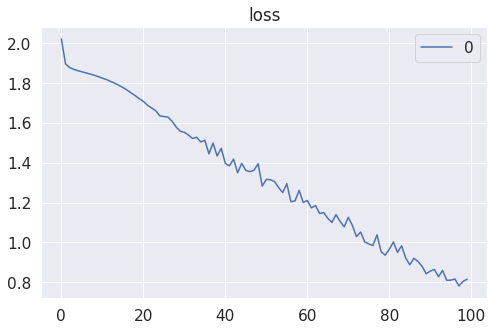

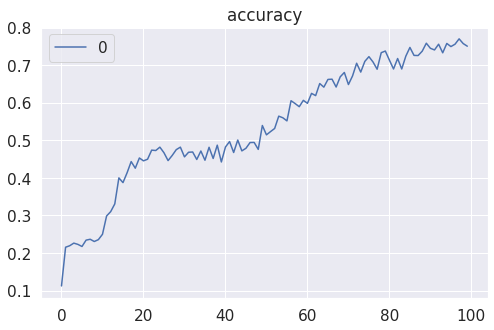

In [42]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_12 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(1024, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='sigmoid'),
                                       
                                       
                                       
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model

insurance_model_12.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_12.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
24/24 [==============================] - 2s 81ms/step - loss: 2.0383 - accuracy: 0.1249
Epoch 2/100
24/24 [==============================] - 2s 80ms/step - loss: 1.9021 - accuracy: 0.2174
Epoch 3/100
24/24 [==============================] - 2s 80ms/step - loss: 1.8774 - accuracy: 0.2174
Epoch 4/100
24/24 [==============================] - 2s 79ms/step - loss: 1.8669 - accuracy: 0.2174
Epoch 5/100
24/24 [==============================] - 2s 80ms/step - loss: 1.8606 - accuracy: 0.2174
Epoch 6/100
24/24 [==============================] - 2s 79ms/step - loss: 1.8547 - accuracy: 0.2187
Epoch 7/100
24/24 [==============================] - 2s 81ms/step - loss: 1.8483 - accuracy: 0.2412
Epoch 8/100
24/24 [==============================] - 2s 81ms/step - loss: 1.8422 - accuracy: 0.2180
Epoch 9/100
24/24 [==============================] - 2s 79ms/step - loss: 1.8357 - accuracy: 0.2565
Epoch 10/100
24/24 [==============================] - 2s 80ms/step - loss: 1.8290 - accuracy: 0.2505

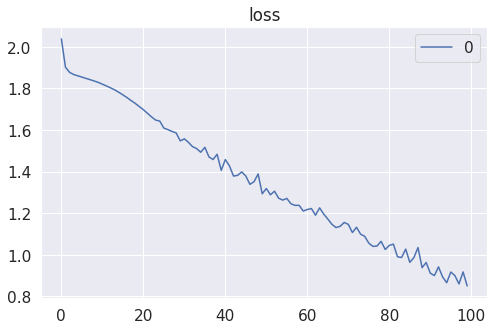

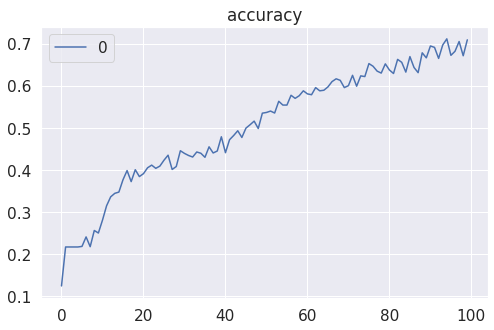

In [34]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_12 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(1024, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='sigmoid'),
                                       
                                       
                                       
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model

insurance_model_12.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_12.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
input_shape(32, 32)

In [ ]:
# 20 marks) Experiment with number of layers and neurons per layer to increase the performance metrics.

Epoch 1/100
24/24 [==============================] - 3s 77ms/step - loss: 2.0542 - accuracy: 0.1127
Epoch 2/100
24/24 [==============================] - 2s 77ms/step - loss: 1.9061 - accuracy: 0.2174
Epoch 3/100
24/24 [==============================] - 2s 77ms/step - loss: 1.8789 - accuracy: 0.2174
Epoch 4/100
24/24 [==============================] - 2s 76ms/step - loss: 1.8686 - accuracy: 0.2174
Epoch 5/100
24/24 [==============================] - 2s 77ms/step - loss: 1.8631 - accuracy: 0.2174
Epoch 6/100
24/24 [==============================] - 2s 78ms/step - loss: 1.8586 - accuracy: 0.2180
Epoch 7/100
24/24 [==============================] - 2s 76ms/step - loss: 1.8542 - accuracy: 0.2359
Epoch 8/100
24/24 [==============================] - 2s 77ms/step - loss: 1.8502 - accuracy: 0.2174
Epoch 9/100
24/24 [==============================] - 2s 77ms/step - loss: 1.8458 - accuracy: 0.2359
Epoch 10/100
24/24 [==============================] - 2s 77ms/step - loss: 1.8410 - accuracy: 0.2362

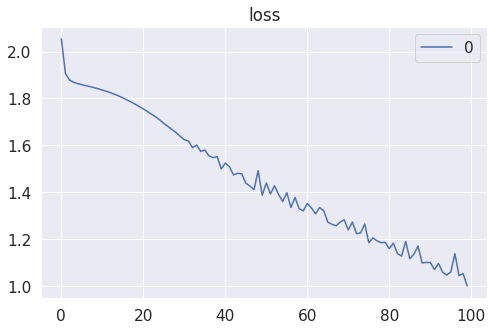

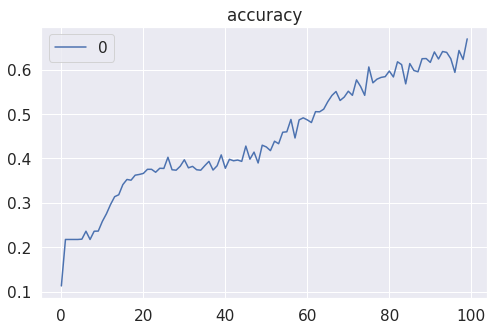

In [47]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_12 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       
                                       tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='sigmoid'),
                                       
                                       tf.keras.layers.Dense(64, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model

insurance_model_12.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_12.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
24/24 [==============================] - 4s 125ms/step - loss: 1.9719 - accuracy: 0.1610
Epoch 2/100
24/24 [==============================] - 3s 124ms/step - loss: 1.8789 - accuracy: 0.2187
Epoch 3/100
24/24 [==============================] - 3s 124ms/step - loss: 1.8653 - accuracy: 0.2296
Epoch 4/100
24/24 [==============================] - 3s 123ms/step - loss: 1.8564 - accuracy: 0.2270
Epoch 5/100
24/24 [==============================] - 3s 124ms/step - loss: 1.8485 - accuracy: 0.2303
Epoch 6/100
24/24 [==============================] - 3s 123ms/step - loss: 1.8395 - accuracy: 0.2502
Epoch 7/100
24/24 [==============================] - 3s 126ms/step - loss: 1.8296 - accuracy: 0.3091
Epoch 8/100
24/24 [==============================] - 3s 124ms/step - loss: 1.8190 - accuracy: 0.2478
Epoch 9/100
24/24 [==============================] - 3s 125ms/step - loss: 1.8066 - accuracy: 0.3429
Epoch 10/100
24/24 [==============================] - 3s 125ms/step - loss: 1.7924 - accura

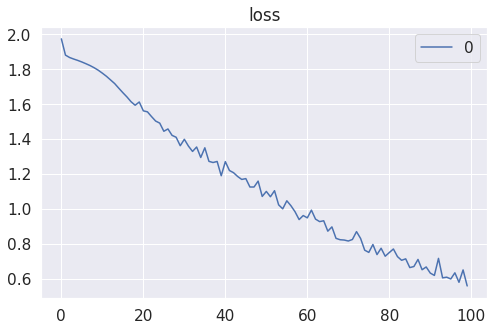

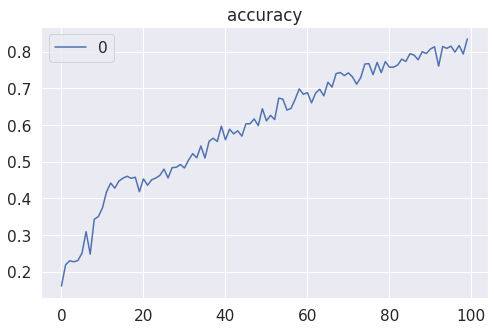

In [48]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_123 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='sigmoid'),
                                       
                                       tf.keras.layers.Dense(64, activation='sigmoid'),
                                       
                                       
                                       
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model

insurance_model_123.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_123.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [73]:
import keras.optimizers

Epoch 1/100
24/24 [==============================] - 17s 656ms/step - loss: 1.9506 - accuracy: 0.2008
Epoch 2/100
24/24 [==============================] - 16s 655ms/step - loss: 1.8959 - accuracy: 0.2190
Epoch 3/100
24/24 [==============================] - 16s 659ms/step - loss: 1.8785 - accuracy: 0.2144
Epoch 4/100
24/24 [==============================] - 16s 655ms/step - loss: 1.8204 - accuracy: 0.2757
Epoch 5/100
24/24 [==============================] - 16s 656ms/step - loss: 1.7945 - accuracy: 0.2760
Epoch 6/100
24/24 [==============================] - 16s 663ms/step - loss: 1.6818 - accuracy: 0.3380
Epoch 7/100
24/24 [==============================] - 17s 702ms/step - loss: 1.6169 - accuracy: 0.3469
Epoch 8/100
24/24 [==============================] - 16s 654ms/step - loss: 1.5906 - accuracy: 0.3469
Epoch 9/100
24/24 [==============================] - 22s 920ms/step - loss: 1.4715 - accuracy: 0.3572
Epoch 10/100
24/24 [==============================] - 16s 688ms/step - loss: 1.498

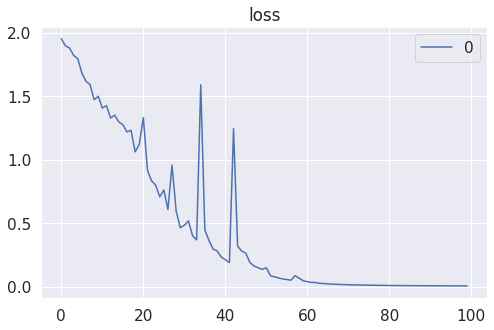

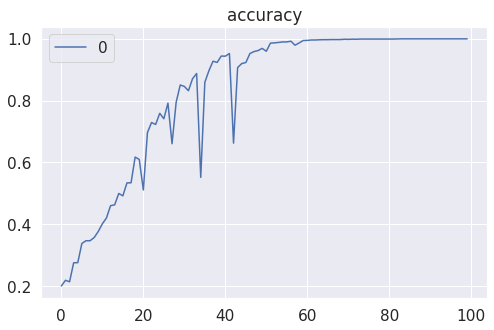

In [77]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='sigmoid'),
                                       tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(64, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=0.095)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


24/24 [==============================] - 16s 655ms/step - loss: 1.8669 - accuracy: 0.2601
Epoch 2/100
24/24 [==============================] - 16s 654ms/step - loss: 1.7224 - accuracy: 0.3748
Epoch 3/100
24/24 [==============================] - 16s 656ms/step - loss: 1.5789 - accuracy: 0.4165
Epoch 4/100
24/24 [==============================] - 16s 658ms/step - loss: 1.4490 - accuracy: 0.4490
Epoch 5/100
24/24 [==============================] - 16s 657ms/step - loss: 1.3543 - accuracy: 0.5239
Epoch 6/100
24/24 [==============================] - 16s 659ms/step - loss: 1.3025 - accuracy: 0.5454
Epoch 7/100
24/24 [==============================] - 16s 678ms/step - loss: 1.1828 - accuracy: 0.6319
Epoch 8/100
24/24 [==============================] - 16s 657ms/step - loss: 1.0928 - accuracy: 0.6574
Epoch 9/100
24/24 [==============================] - 16s 667ms/step - loss: 1.0066 - accuracy: 0.6862
Epoch 10/100
24/24 [==============================] - 16s 657ms/step - loss: 0.8852 - accuracy

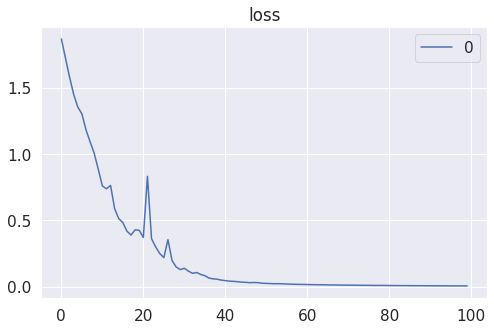

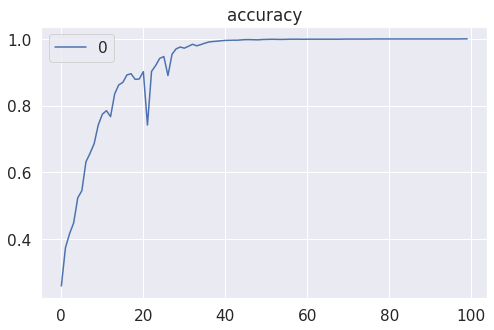

In [78]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(4096, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(1024, activation='sigmoid'),
                                       tf.keras.layers.Dense(512, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(256, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=0.05)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [79]:
# (10 marks) Experiment with activation functions

Epoch 1/100
19/19 [==============================] - 15s 713ms/step - loss: 4.4885 - accuracy: 0.2084 - val_loss: 2.0055 - val_accuracy: 0.0199
Epoch 2/100
19/19 [==============================] - 13s 678ms/step - loss: 1.6963 - accuracy: 0.2821 - val_loss: 1.9192 - val_accuracy: 0.0199
Epoch 3/100
19/19 [==============================] - 13s 685ms/step - loss: 1.5810 - accuracy: 0.4213 - val_loss: 3.3627 - val_accuracy: 0.0132
Epoch 4/100
19/19 [==============================] - 13s 709ms/step - loss: 1.4537 - accuracy: 0.4793 - val_loss: 3.0005 - val_accuracy: 0.0199
Epoch 5/100
19/19 [==============================] - 13s 683ms/step - loss: 1.4768 - accuracy: 0.4901 - val_loss: 2.0506 - val_accuracy: 0.0166
Epoch 6/100
19/19 [==============================] - 13s 682ms/step - loss: 1.3950 - accuracy: 0.5414 - val_loss: 2.7832 - val_accuracy: 0.0116
Epoch 7/100
19/19 [==============================] - 13s 682ms/step - loss: 1.1871 - accuracy: 0.5957 - val_loss: 2.8340 - val_accuracy:

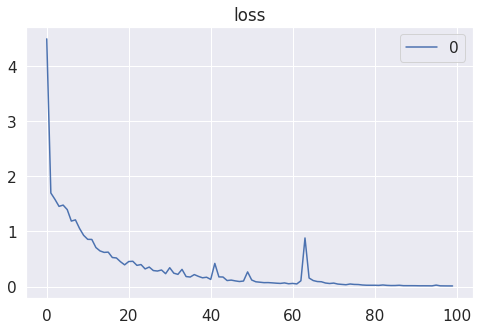

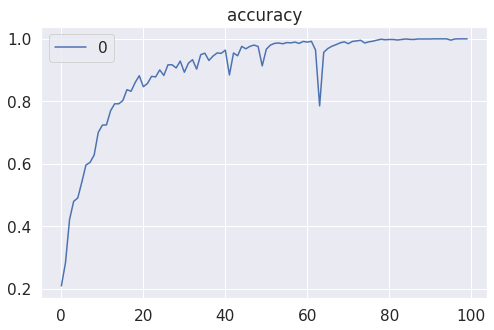

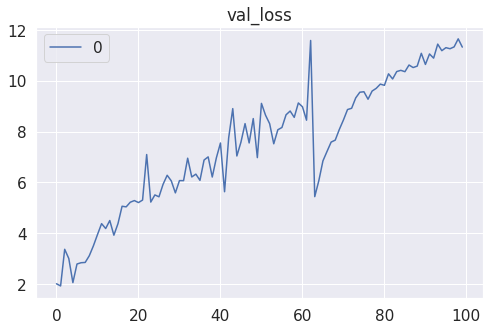

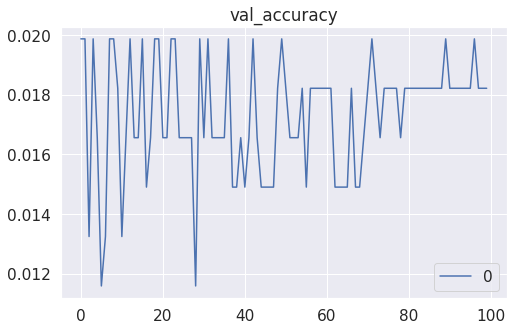

In [88]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(4096, activation='relu'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(32, activation='relu'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.001)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [95]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='elu'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='elu'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='elu'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=.5)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


12/19 [=================>............] - ETA: 4s - loss: nan - accuracy: 0.1530

KeyboardInterrupt: ignored

Epoch 1/100
19/19 [==============================] - 13s 650ms/step - loss: 15.8144 - accuracy: 0.2717 - val_loss: 2.4259 - val_accuracy: 0.0083
Epoch 2/100
19/19 [==============================] - 12s 641ms/step - loss: 1.7880 - accuracy: 0.3807 - val_loss: 2.4633 - val_accuracy: 0.0033
Epoch 3/100
19/19 [==============================] - 12s 642ms/step - loss: 1.6801 - accuracy: 0.4337 - val_loss: 2.6714 - val_accuracy: 0.0083
Epoch 4/100
19/19 [==============================] - 12s 647ms/step - loss: 1.6307 - accuracy: 0.4341 - val_loss: 2.7144 - val_accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 18s 983ms/step - loss: 1.6700 - accuracy: 0.3621 - val_loss: 2.9006 - val_accuracy: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 18s 937ms/step - loss: 1.6400 - accuracy: 0.3902 - val_loss: 2.9984 - val_accuracy: 0.0033
Epoch 7/100
19/19 [==============================] - 13s 693ms/step - loss: 1.6030 - accuracy: 0.3865 - val_loss: 3.4034 - val_

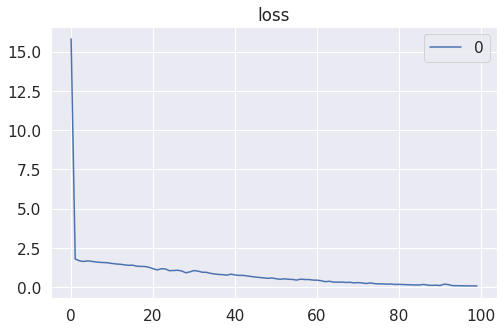

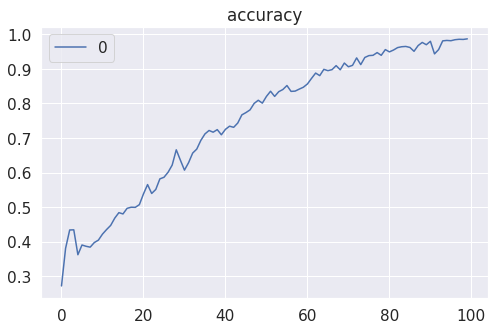

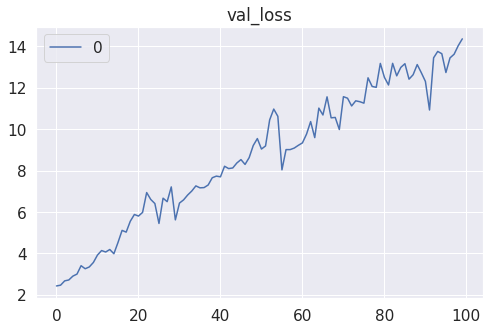

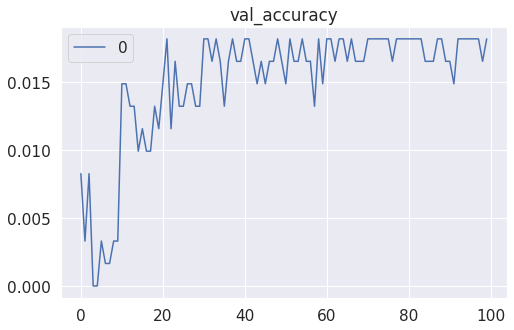

In [101]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='selu'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='selu'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='selu'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=.0008)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [102]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [104]:
test_images = test_images/255

In [105]:
test_loss, test_acc = insurance_model_124.evaluate(test_images , test_labels)

print('Test accuracy:', test_acc)

24/24 [==============================] - 2s 74ms/step - loss: 2.0788 - accuracy: 0.3043
Test accuracy: 0.3042895495891571


Epoch 1/100
19/19 [==============================] - 14s 693ms/step - loss: 1.9028 - accuracy: 0.2237 - val_loss: 4.1451 - val_accuracy: 0.0017
Epoch 2/100
19/19 [==============================] - 12s 646ms/step - loss: 1.7278 - accuracy: 0.2912 - val_loss: 4.6966 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 12s 643ms/step - loss: 1.7053 - accuracy: 0.2949 - val_loss: 4.7275 - val_accuracy: 0.0083
Epoch 4/100
19/19 [==============================] - 12s 642ms/step - loss: 1.6839 - accuracy: 0.3024 - val_loss: 5.0434 - val_accuracy: 0.0033
Epoch 5/100
19/19 [==============================] - 12s 642ms/step - loss: 1.6488 - accuracy: 0.3086 - val_loss: 5.6426 - val_accuracy: 0.0066
Epoch 6/100
19/19 [==============================] - 12s 642ms/step - loss: 1.5280 - accuracy: 0.3906 - val_loss: 5.4961 - val_accuracy: 0.0116
Epoch 7/100
19/19 [==============================] - 12s 642ms/step - loss: 1.4328 - accuracy: 0.4234 - val_loss: 5.3070 - val_accur

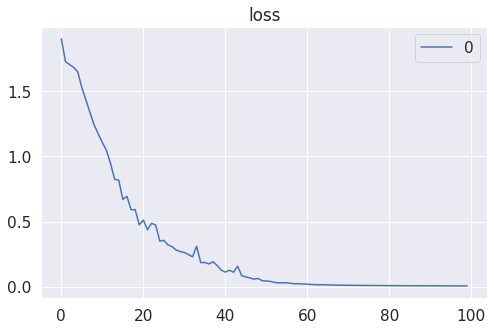

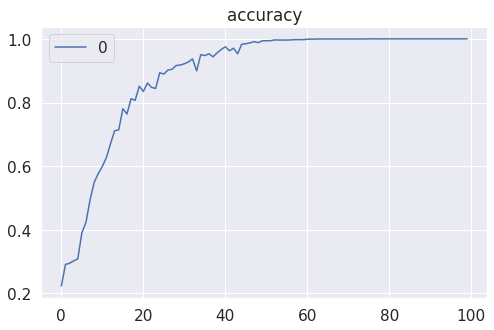

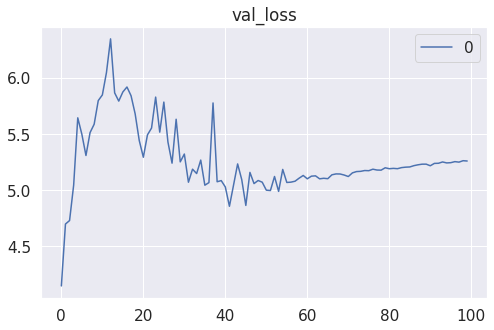

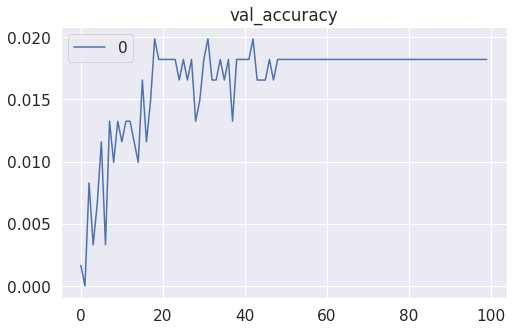

In [113]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='tanh'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='tanh'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='tanh'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=0.009)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


19/19 [==============================] - 13s 663ms/step - loss: 8.9679 - accuracy: 0.1189 - val_loss: 3.4991 - val_accuracy: 0.0033
Epoch 2/100
19/19 [==============================] - 12s 651ms/step - loss: 1.8387 - accuracy: 0.2270 - val_loss: 3.4723 - val_accuracy: 0.0149
Epoch 3/100
19/19 [==============================] - 12s 649ms/step - loss: 1.6573 - accuracy: 0.2767 - val_loss: 3.6000 - val_accuracy: 0.0166
Epoch 4/100
19/19 [==============================] - 12s 650ms/step - loss: 1.5740 - accuracy: 0.4006 - val_loss: 3.7103 - val_accuracy: 0.0099
Epoch 5/100
19/19 [==============================] - 14s 731ms/step - loss: 1.5324 - accuracy: 0.4379 - val_loss: 3.9743 - val_accuracy: 0.0116
Epoch 6/100
19/19 [==============================] - 14s 722ms/step - loss: 1.5150 - accuracy: 0.4312 - val_loss: 3.9351 - val_accuracy: 0.0066
Epoch 7/100
19/19 [==============================] - 12s 649ms/step - loss: 1.4966 - accuracy: 0.4370 - val_loss: 4.0386 - val_accuracy: 0.0083
Epoc

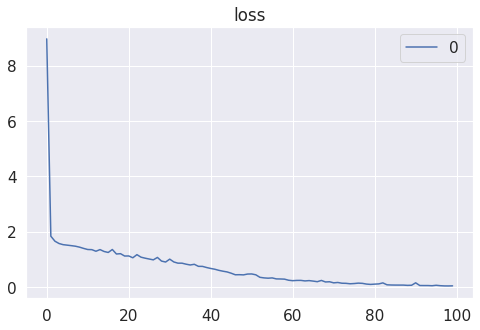

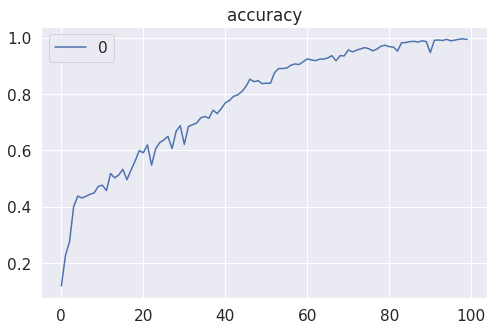

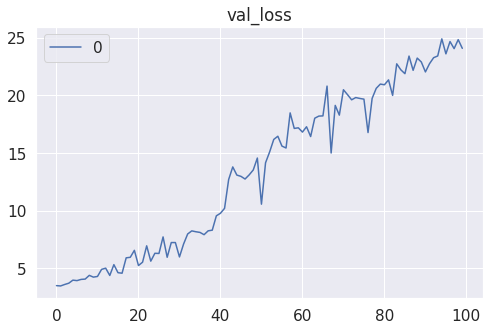

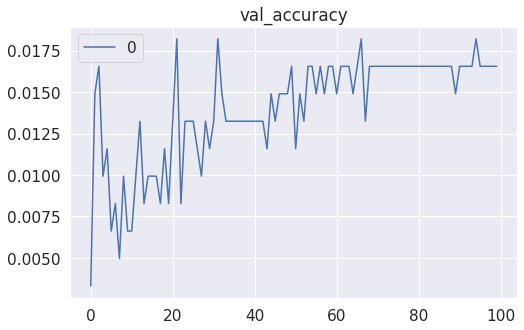

In [144]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='softplus'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='softplus'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='softplus'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=0.0008)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [145]:
# (15 marks) Experiment with regularization techniques: Early stopping, Dropout rate, L1 for sparse model

In [47]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,monitor='val_loss', mode='min', restore_best_weights=True)


Epoch 1/100
19/19 [==============================] - 14s 697ms/step - loss: 1.9028 - accuracy: 0.2237 - val_loss: 4.1451 - val_accuracy: 0.0017
Epoch 2/100
19/19 [==============================] - 12s 650ms/step - loss: 1.7278 - accuracy: 0.2912 - val_loss: 4.6966 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 13s 698ms/step - loss: 1.7053 - accuracy: 0.2949 - val_loss: 4.7275 - val_accuracy: 0.0083
Epoch 4/100
19/19 [==============================] - 12s 651ms/step - loss: 1.6839 - accuracy: 0.3024 - val_loss: 5.0434 - val_accuracy: 0.0033
Epoch 5/100
19/19 [==============================] - 12s 652ms/step - loss: 1.6488 - accuracy: 0.3086 - val_loss: 5.6426 - val_accuracy: 0.0066
Epoch 6/100
19/19 [==============================] - 12s 652ms/step - loss: 1.5280 - accuracy: 0.3906 - val_loss: 5.4961 - val_accuracy: 0.0116
Epoch 7/100
19/19 [==============================] - 12s 650ms/step - loss: 1.4328 - accuracy: 0.4234 - val_loss: 5.3070 - val_accur

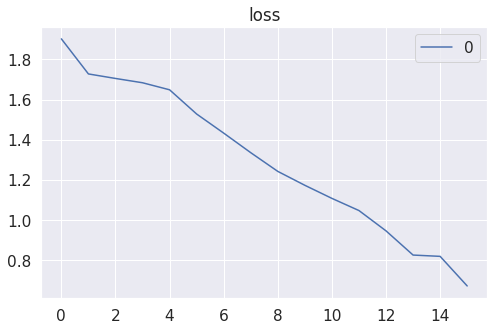

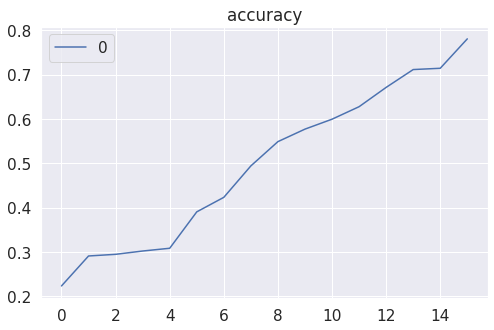

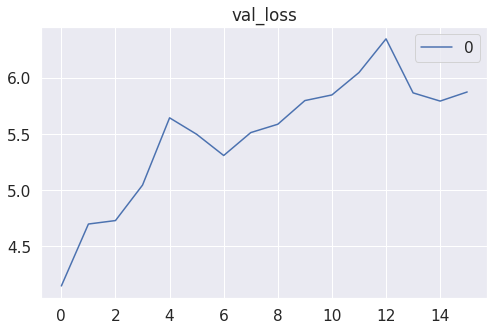

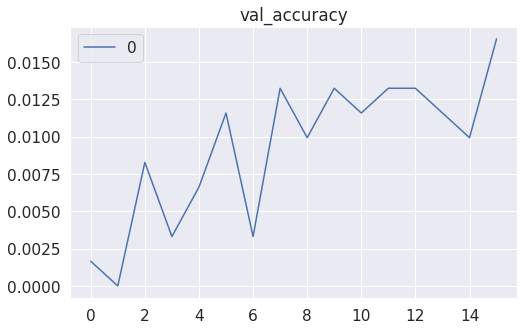

In [148]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='tanh'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='tanh'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='tanh'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=.009)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 16s 807ms/step - loss: 11.9067 - accuracy: 0.1831 - val_loss: 2.6709 - val_accuracy: 0.0199
Epoch 2/100
19/19 [==============================] - 17s 919ms/step - loss: 1.9313 - accuracy: 0.2121 - val_loss: 2.8671 - val_accuracy: 0.0199
Epoch 3/100
19/19 [==============================] - 13s 673ms/step - loss: 1.8640 - accuracy: 0.2399 - val_loss: 2.8039 - val_accuracy: 0.0199
Epoch 4/100
19/19 [==============================] - 12s 652ms/step - loss: 1.8234 - accuracy: 0.2382 - val_loss: 2.6455 - val_accuracy: 0.0182
Epoch 5/100
19/19 [==============================] - 12s 651ms/step - loss: 1.8117 - accuracy: 0.2436 - val_loss: 4.0595 - val_accuracy: 0.0182
Epoch 6/100
19/19 [==============================] - 12s 649ms/step - loss: 1.7574 - accuracy: 0.2904 - val_loss: 3.6314 - val_accuracy: 0.0199
Epoch 7/100
19/19 [==============================] - 12s 650ms/step - loss: 1.7006 - accuracy: 0.3389 - val_loss: 3.4391 - val_accuracy

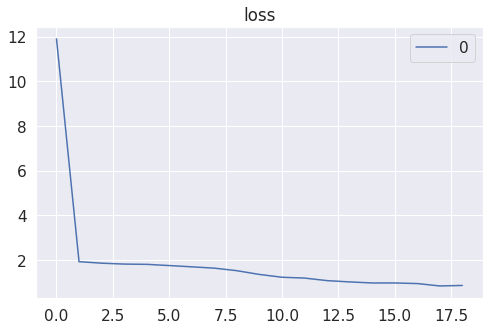

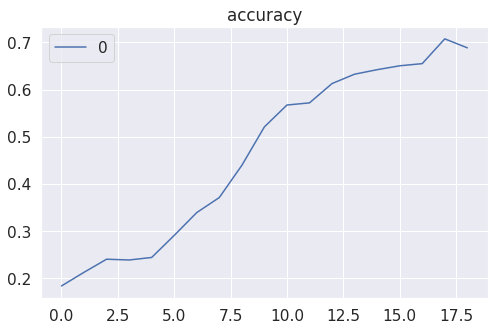

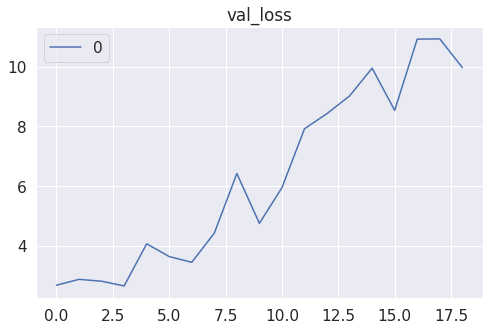

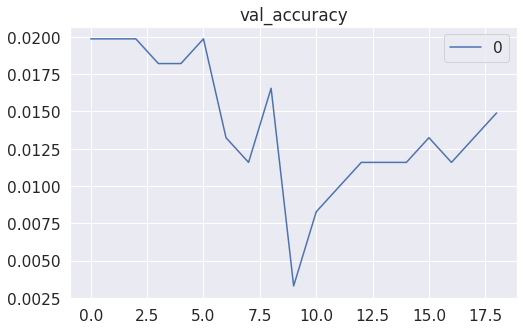

In [149]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='relu'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='relu'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=.001)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 24s 1s/step - loss: 5.9676 - accuracy: 0.2104 - val_loss: 3.4795 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 12s 658ms/step - loss: 1.7800 - accuracy: 0.2842 - val_loss: 3.2263 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 12s 655ms/step - loss: 1.7897 - accuracy: 0.2585 - val_loss: 3.8885 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 12s 657ms/step - loss: 1.7020 - accuracy: 0.3281 - val_loss: 3.3149 - val_accuracy: 0.0083
Epoch 5/100
19/19 [==============================] - 12s 655ms/step - loss: 1.7575 - accuracy: 0.2755 - val_loss: 3.7749 - val_accuracy: 0.0099
Epoch 6/100
19/19 [==============================] - 12s 658ms/step - loss: 1.5844 - accuracy: 0.3853 - val_loss: 3.9876 - val_accuracy: 0.0083
Epoch 7/100
19/19 [==============================] - 12s 658ms/step - loss: 1.5965 - accuracy: 0.3840 - val_loss: 3.6041 - val_

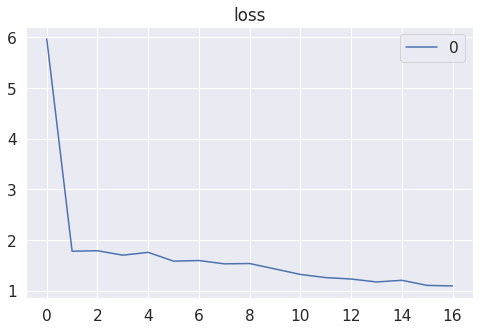

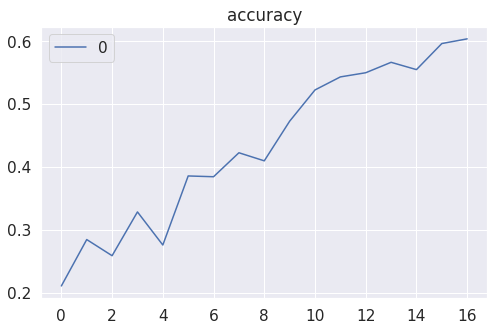

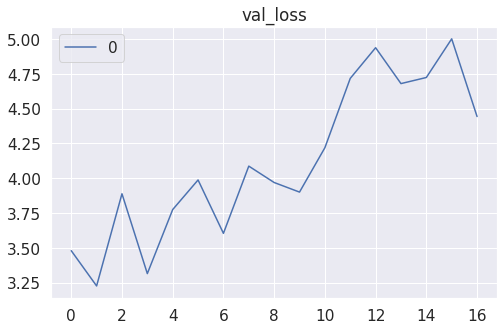

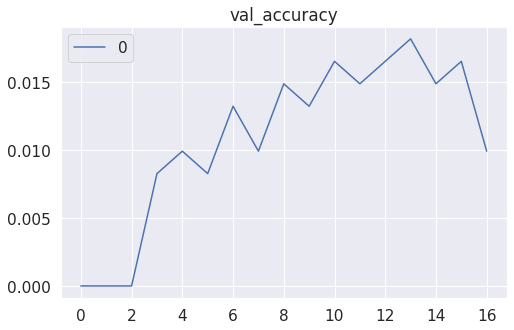

In [153]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='relu'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='relu'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.001)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 13s 672ms/step - loss: 1.8871 - accuracy: 0.2647 - val_loss: 4.1090 - val_accuracy: 0.0116
Epoch 2/100
19/19 [==============================] - 13s 679ms/step - loss: 1.6095 - accuracy: 0.3811 - val_loss: 3.8620 - val_accuracy: 0.0132
Epoch 3/100
19/19 [==============================] - 12s 653ms/step - loss: 1.4782 - accuracy: 0.4238 - val_loss: 4.7027 - val_accuracy: 0.0116
Epoch 4/100
19/19 [==============================] - 12s 651ms/step - loss: 1.4129 - accuracy: 0.4710 - val_loss: 4.2991 - val_accuracy: 0.0132
Epoch 5/100
19/19 [==============================] - 14s 725ms/step - loss: 1.2955 - accuracy: 0.5174 - val_loss: 4.5489 - val_accuracy: 0.0182
Epoch 6/100
19/19 [==============================] - 12s 651ms/step - loss: 1.2304 - accuracy: 0.5373 - val_loss: 4.6251 - val_accuracy: 0.0166
Epoch 7/100
19/19 [==============================] - 12s 653ms/step - loss: 1.1787 - accuracy: 0.5754 - val_loss: 4.4567 - val_accuracy:

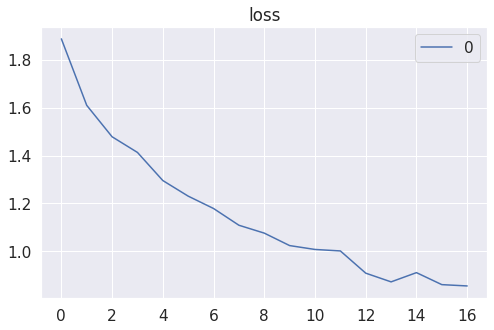

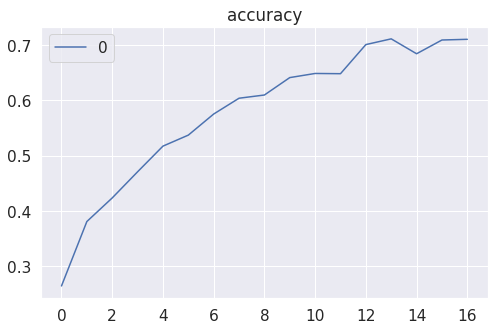

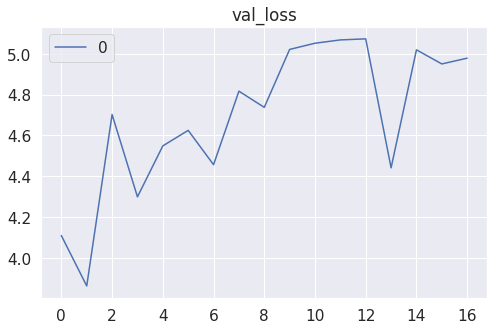

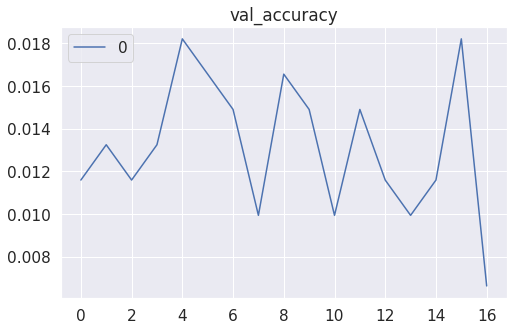

In [162]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=[32, 32, 3]),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='tanh'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='tanh'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='tanh'),
                                       tf.keras.layers.Dropout(0.3),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=.001)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=[32, 32, 3]),
                                      #  tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                      #  tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='relu'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='relu'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.001)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 121s 6s/step - loss: 65.1713 - accuracy: 0.1466 - val_loss: 2.0347 - val_accuracy: 0.0017
Epoch 2/100
19/19 [==============================] - 123s 6s/step - loss: 1.8970 - accuracy: 0.1839 - val_loss: 2.0472 - val_accuracy: 0.0033
Epoch 3/100
19/19 [==============================] - 120s 6s/step - loss: 1.8694 - accuracy: 0.1988 - val_loss: 2.0270 - val_accuracy: 0.0033
Epoch 4/100
19/19 [==============================] - 121s 6s/step - loss: 1.8488 - accuracy: 0.2386 - val_loss: 1.9991 - val_accuracy: 0.0099
Epoch 5/100
19/19 [==============================] - 122s 6s/step - loss: 1.8353 - accuracy: 0.2601 - val_loss: 2.0311 - val_accuracy: 0.0050
Epoch 6/100
19/19 [==============================] - 123s 6s/step - loss: 1.8308 - accuracy: 0.3210 - val_loss: 2.0108 - val_accuracy: 0.0099
Epoch 7/100
19/19 [==============================] - 120s 6s/step - loss: 1.8194 - accuracy: 0.2945 - val_loss: 2.0148 - val_accuracy: 0.0116
Epoch

In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=[32, 32, 3]),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='tanh'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='tanh'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='tanh'),
                                       tf.keras.layers.Dropout(0.3),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=.001)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 13s 677ms/step - loss: 310.1639 - accuracy: 0.2403 - val_loss: 300.1161 - val_accuracy: 0.0099
Epoch 2/100
19/19 [==============================] - 13s 665ms/step - loss: 298.6549 - accuracy: 0.4374 - val_loss: 301.9723 - val_accuracy: 0.0066
Epoch 3/100
19/19 [==============================] - 13s 667ms/step - loss: 298.0530 - accuracy: 0.5497 - val_loss: 302.1481 - val_accuracy: 0.0132
Epoch 4/100
19/19 [==============================] - 13s 669ms/step - loss: 297.7012 - accuracy: 0.5613 - val_loss: 304.2344 - val_accuracy: 0.0066
Epoch 5/100
19/19 [==============================] - 13s 665ms/step - loss: 297.2144 - accuracy: 0.6723 - val_loss: 305.1303 - val_accuracy: 0.0149
Epoch 6/100
19/19 [==============================] - 13s 667ms/step - loss: 296.8139 - accuracy: 0.7225 - val_loss: 306.1404 - val_accuracy: 0.0149
Epoch 7/100
19/19 [==============================] - 13s 669ms/step - loss: 296.4867 - accuracy: 0.7589 - val_lo

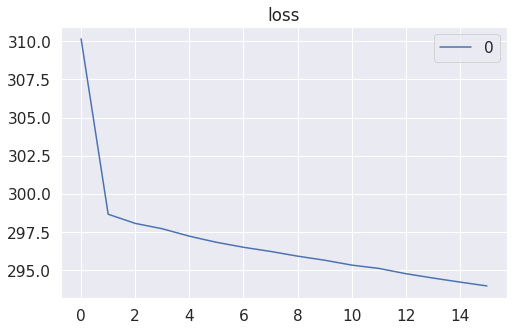

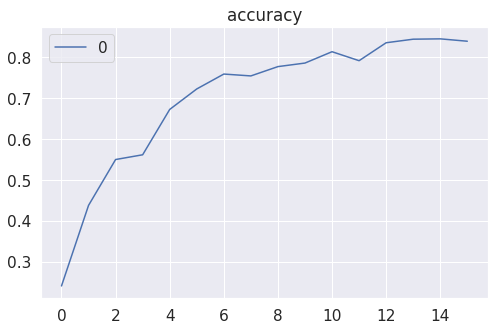

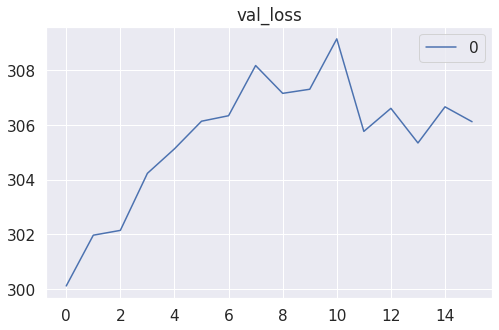

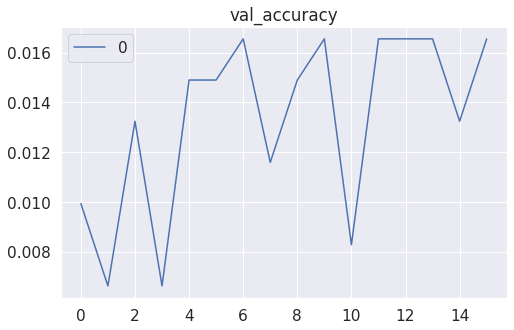

In [175]:
# Build a neural network

tf.random.set_seed(42)


# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=[32, 32, 3]),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l1(0.01)),
                                      #  tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l1(0.01)),
                                      #  tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l1(0.01)),
                                      #  tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax', kernel_initializer="glorot_uniform"),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.00025)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [45]:
#(10 marks) Experiment with at least 2 more Optimizers

Epoch 1/100
19/19 [==============================] - 14s 670ms/step - loss: 1.9895 - accuracy: 0.2299 - val_loss: 5.7449 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 12s 657ms/step - loss: 1.8627 - accuracy: 0.2502 - val_loss: 5.2935 - val_accuracy: 0.1242
Epoch 3/100
19/19 [==============================] - 12s 655ms/step - loss: 1.7618 - accuracy: 0.2966 - val_loss: 4.6691 - val_accuracy: 0.0480
Epoch 4/100
19/19 [==============================] - 12s 656ms/step - loss: 1.6473 - accuracy: 0.3467 - val_loss: 5.3954 - val_accuracy: 0.0083
Epoch 5/100
19/19 [==============================] - 14s 730ms/step - loss: 1.5169 - accuracy: 0.3720 - val_loss: 4.9631 - val_accuracy: 0.0844
Epoch 6/100
19/19 [==============================] - 12s 655ms/step - loss: 1.3499 - accuracy: 0.4557 - val_loss: 5.2330 - val_accuracy: 0.0762
Epoch 7/100
19/19 [==============================] - 12s 655ms/step - loss: 1.2497 - accuracy: 0.5203 - val_loss: 5.3561 - val_accur

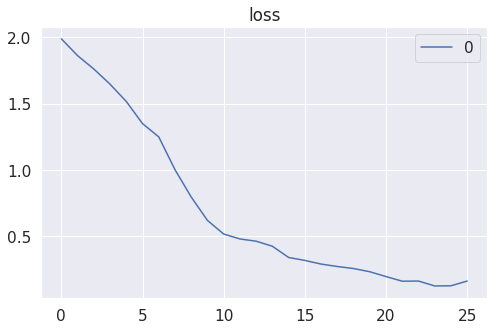

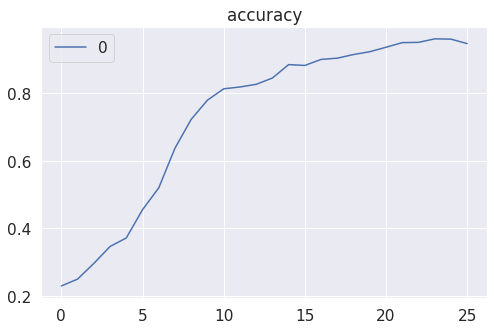

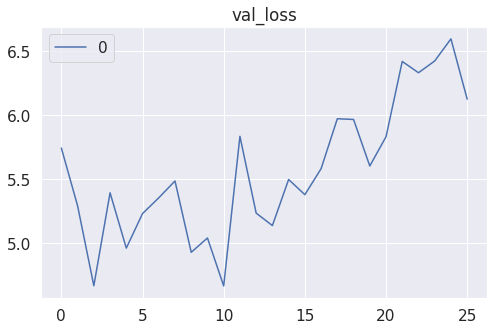

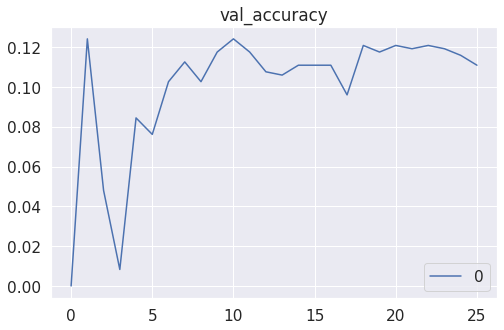

In [55]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=[32, 32, 3]),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='tanh'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='tanh'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='tanh'),
                                       tf.keras.layers.Dropout(0.3),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.Adam(learning_rate=.0005)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 14s 649ms/step - loss: 9.8097 - accuracy: 0.1926 - val_loss: 2.0278 - val_accuracy: 0.1043
Epoch 2/100
19/19 [==============================] - 12s 652ms/step - loss: 2.3030 - accuracy: 0.2556 - val_loss: 2.0723 - val_accuracy: 0.1076
Epoch 3/100
19/19 [==============================] - 12s 660ms/step - loss: 1.7083 - accuracy: 0.3662 - val_loss: 2.3894 - val_accuracy: 0.0579
Epoch 4/100
19/19 [==============================] - 12s 655ms/step - loss: 1.4271 - accuracy: 0.4727 - val_loss: 2.8595 - val_accuracy: 0.0662
Epoch 5/100
19/19 [==============================] - 12s 648ms/step - loss: 1.1713 - accuracy: 0.5684 - val_loss: 3.5038 - val_accuracy: 0.0911
Epoch 6/100
19/19 [==============================] - 12s 654ms/step - loss: 0.9915 - accuracy: 0.6500 - val_loss: 3.9524 - val_accuracy: 0.1109
Epoch 7/100
19/19 [==============================] - 12s 655ms/step - loss: 0.8741 - accuracy: 0.6930 - val_loss: 3.6811 - val_accuracy:

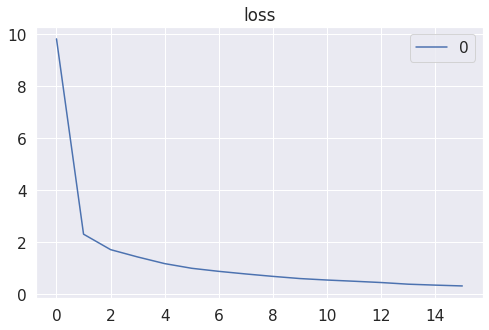

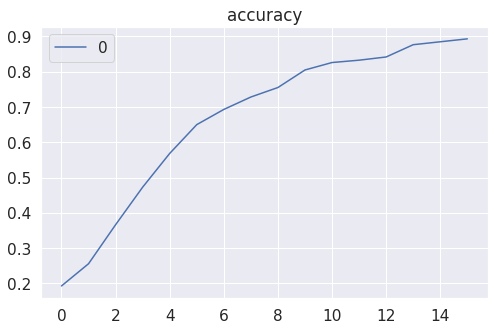

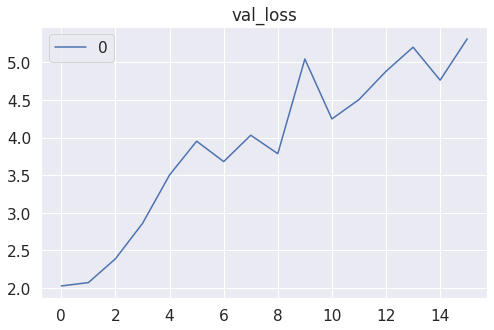

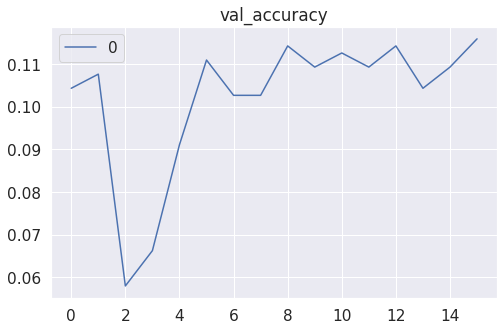

In [53]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='relu'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='relu'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.0001)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 15s 664ms/step - loss: 2.0761 - accuracy: 0.2109 - val_loss: 5.0811 - val_accuracy: 0.0033
Epoch 2/100
19/19 [==============================] - 13s 661ms/step - loss: 1.9059 - accuracy: 0.2523 - val_loss: 4.8517 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 12s 658ms/step - loss: 1.7959 - accuracy: 0.3061 - val_loss: 4.8423 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 12s 660ms/step - loss: 1.6726 - accuracy: 0.3463 - val_loss: 5.2480 - val_accuracy: 0.0166
Epoch 5/100
19/19 [==============================] - 12s 658ms/step - loss: 1.6126 - accuracy: 0.3674 - val_loss: 5.1181 - val_accuracy: 0.1010
Epoch 6/100
19/19 [==============================] - 13s 663ms/step - loss: 1.4803 - accuracy: 0.4205 - val_loss: 5.5382 - val_accuracy: 0.0828
Epoch 7/100
19/19 [==============================] - 12s 659ms/step - loss: 1.3470 - accuracy: 0.4892 - val_loss: 5.2374 - val_a

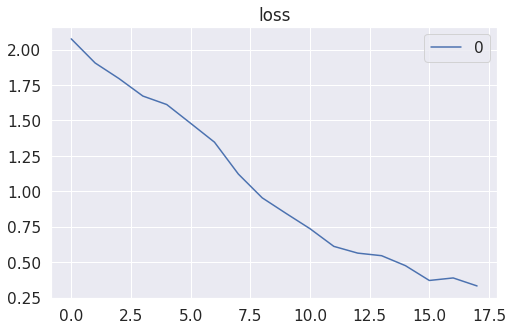

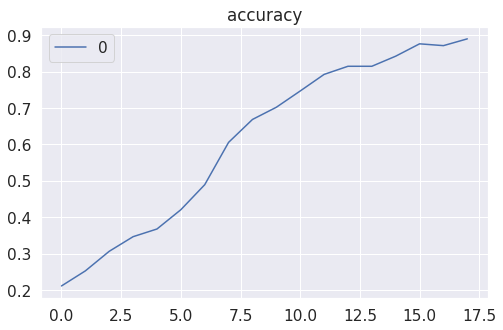

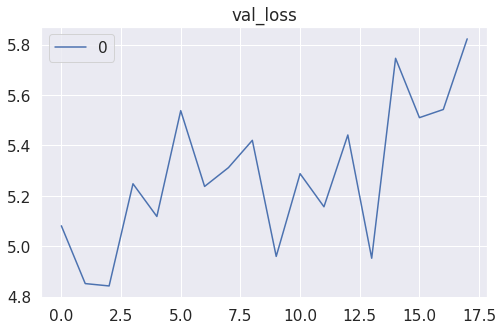

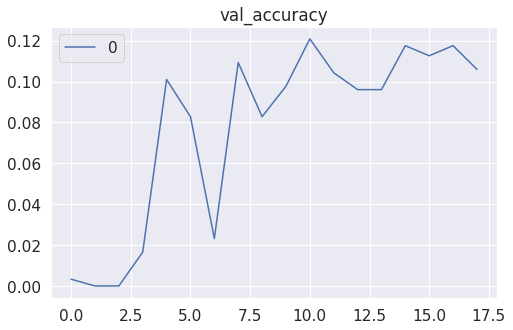

In [58]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=[32, 32, 3]),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='tanh'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='tanh'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='tanh'),
                                       tf.keras.layers.Dropout(0.3),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.RMSprop(learning_rate=.0003, rho=0.9)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 14s 705ms/step - loss: 721252.9375 - accuracy: 0.1831 - val_loss: 1091.5691 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 12s 659ms/step - loss: 976.3170 - accuracy: 0.2278 - val_loss: 903.2765 - val_accuracy: 0.0033
Epoch 3/100
19/19 [==============================] - 12s 658ms/step - loss: 859.4589 - accuracy: 0.2589 - val_loss: 830.9189 - val_accuracy: 0.0265
Epoch 4/100
19/19 [==============================] - 12s 656ms/step - loss: 806.3194 - accuracy: 0.2800 - val_loss: 794.4902 - val_accuracy: 0.0281
Epoch 5/100
19/19 [==============================] - 12s 654ms/step - loss: 776.2872 - accuracy: 0.2792 - val_loss: 770.4035 - val_accuracy: 0.0530
Epoch 6/100
19/19 [==============================] - 12s 656ms/step - loss: 756.3594 - accuracy: 0.3065 - val_loss: 755.4557 - val_accuracy: 0.0232
Epoch 7/100
19/19 [==============================] - 12s 653ms/step - loss: 741.5309 - accuracy: 0.3260 

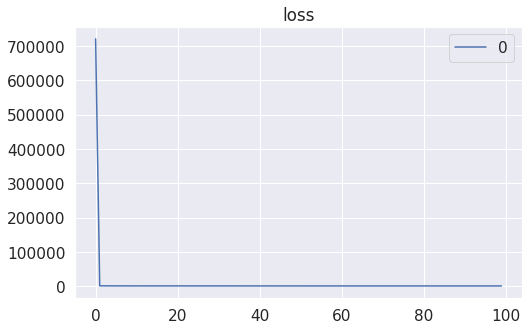

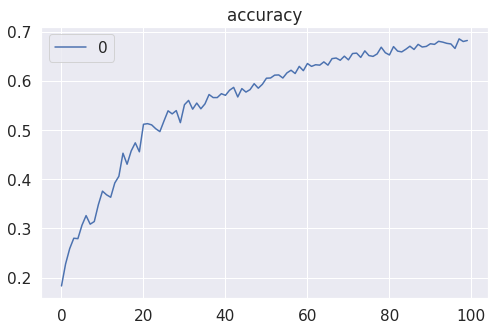

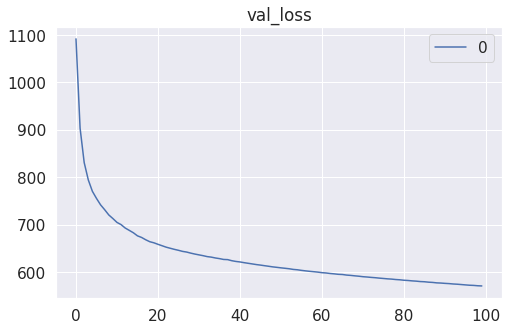

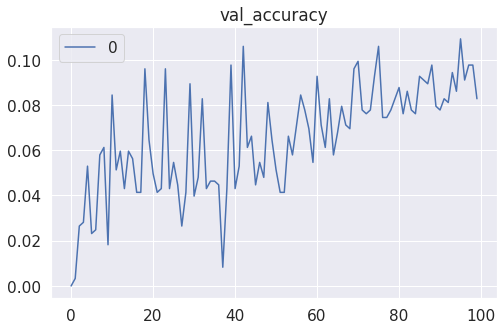

In [63]:
# Build a neural network

tf.random.set_seed(42)


# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=[32, 32, 3]),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l1(0.1)),
                                      #  tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l1(0.1)),
                                      #  tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l1(0.1)),
                                      #  tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax', kernel_initializer="glorot_uniform"),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.Adagrad(learning_rate=0.05)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


Epoch 1/100
19/19 [==============================] - 16s 759ms/step - loss: 9.8097 - accuracy: 0.1926 - val_loss: 2.0278 - val_accuracy: 0.1043
Epoch 2/100
19/19 [==============================] - 14s 693ms/step - loss: 2.3030 - accuracy: 0.2556 - val_loss: 2.0723 - val_accuracy: 0.1076
Epoch 3/100
19/19 [==============================] - 13s 668ms/step - loss: 1.7083 - accuracy: 0.3662 - val_loss: 2.3894 - val_accuracy: 0.0579
Epoch 4/100
19/19 [==============================] - 14s 761ms/step - loss: 1.4271 - accuracy: 0.4727 - val_loss: 2.8595 - val_accuracy: 0.0662
Epoch 5/100
19/19 [==============================] - 13s 661ms/step - loss: 1.1713 - accuracy: 0.5684 - val_loss: 3.5038 - val_accuracy: 0.0911
Epoch 6/100
19/19 [==============================] - 13s 667ms/step - loss: 0.9915 - accuracy: 0.6500 - val_loss: 3.9524 - val_accuracy: 0.1109
Epoch 7/100
19/19 [==============================] - 13s 665ms/step - loss: 0.8741 - accuracy: 0.6930 - val_loss: 3.6811 - val_accuracy:

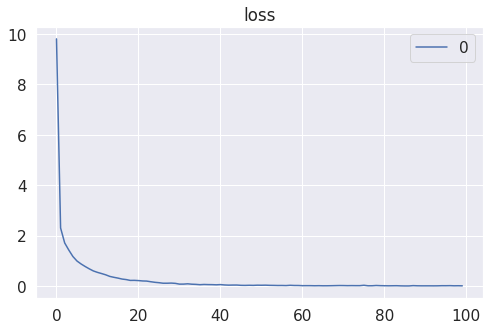

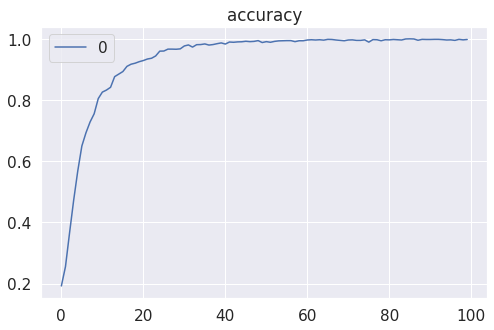

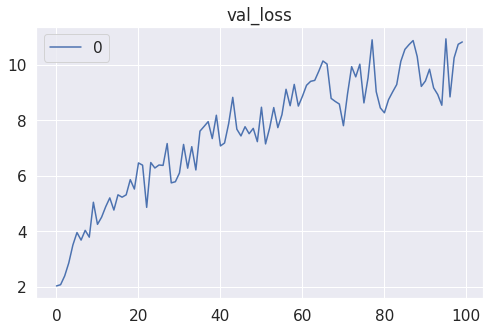

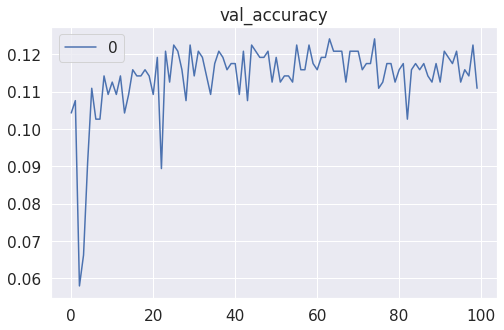

In [64]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_20 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='relu'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='relu'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.0001)

insurance_model_20.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_20.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
from sklearn.metrics import classification_report
pred1=insurance_model_20.predict(test_images)

c1 = classification_report(test_labels,pred1,target_names=list(class_names_label.keys()), output_dict=True)
sns.heatmap(pd.DataFrame(c1).iloc[:-1, :].T, annot=True)


Epoch 1/100
19/19 [==============================] - 13s 676ms/step - loss: 1.9052 - accuracy: 0.2469 - val_loss: 3.6911 - val_accuracy: 0.0911
Epoch 2/100
19/19 [==============================] - 13s 668ms/step - loss: 1.6572 - accuracy: 0.3513 - val_loss: 3.8510 - val_accuracy: 0.0828
Epoch 3/100
19/19 [==============================] - 13s 684ms/step - loss: 1.5245 - accuracy: 0.4109 - val_loss: 3.7989 - val_accuracy: 0.0579
Epoch 4/100
19/19 [==============================] - 13s 672ms/step - loss: 1.3972 - accuracy: 0.4979 - val_loss: 4.2851 - val_accuracy: 0.1126
Epoch 5/100
19/19 [==============================] - 14s 748ms/step - loss: 1.3262 - accuracy: 0.5244 - val_loss: 4.4378 - val_accuracy: 0.1076
Epoch 6/100
19/19 [==============================] - 13s 664ms/step - loss: 1.3078 - accuracy: 0.5298 - val_loss: 4.4229 - val_accuracy: 0.1093
Epoch 7/100
19/19 [==============================] - 13s 668ms/step - loss: 1.1949 - accuracy: 0.5754 - val_loss: 4.6641 - val_accuracy:

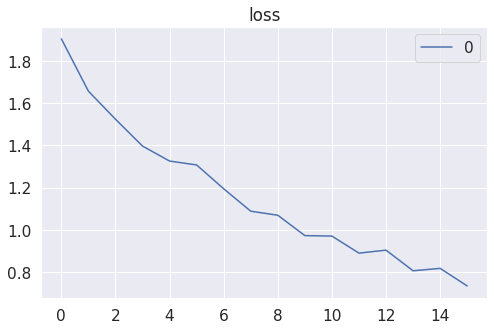

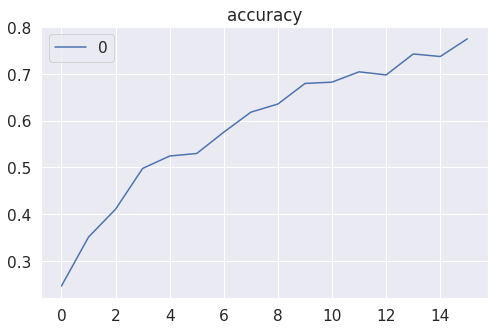

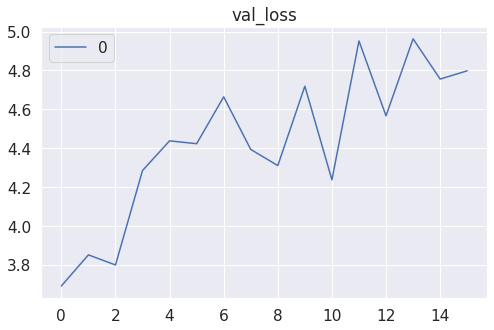

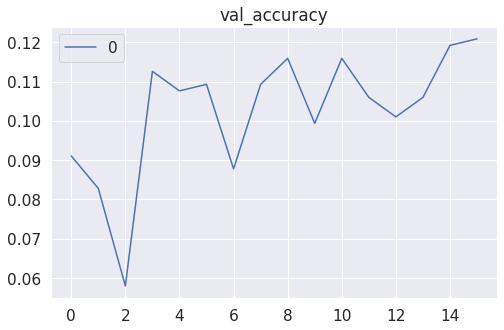

In [65]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_21 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu', input_shape=[32, 32, 3]),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='tanh'),
                                       tf.keras.layers.Dropout(0.2),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='tanh'),
                                       tf.keras.layers.Dropout(0.25),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='tanh'),
                                       tf.keras.layers.Dropout(0.3),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=.001)

insurance_model_21.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_21.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128, callbacks=[early_stopping_cb])
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
from sklearn.metrics import classification_report
pred1=insurance_model_21.predict(test_images)

c1 = classification_report(test_labels,pred1,target_names=list(class_names_label.keys()), output_dict=True)
sns.heatmap(pd.DataFrame(c1).iloc[:-1, :].T, annot=True)


Epoch 1/100
19/19 [==============================] - 13s 676ms/step - loss: 1.8699 - accuracy: 0.2249 - val_loss: 4.3083 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 13s 669ms/step - loss: 1.7117 - accuracy: 0.2606 - val_loss: 4.4602 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 13s 668ms/step - loss: 1.6922 - accuracy: 0.2871 - val_loss: 4.8867 - val_accuracy: 0.0116
Epoch 4/100
19/19 [==============================] - 13s 667ms/step - loss: 1.6241 - accuracy: 0.3194 - val_loss: 5.0250 - val_accuracy: 0.0132
Epoch 5/100
19/19 [==============================] - 13s 662ms/step - loss: 1.5778 - accuracy: 0.3575 - val_loss: 5.0807 - val_accuracy: 0.1258
Epoch 6/100
19/19 [==============================] - 13s 662ms/step - loss: 1.4780 - accuracy: 0.4196 - val_loss: 5.0419 - val_accuracy: 0.1109
Epoch 7/100
19/19 [==============================] - 13s 663ms/step - loss: 1.3632 - accuracy: 0.4615 - val_loss: 5.1052 - val_a

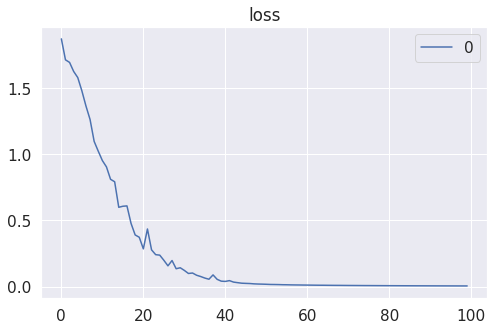

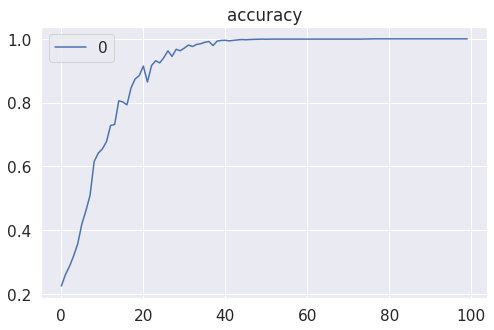

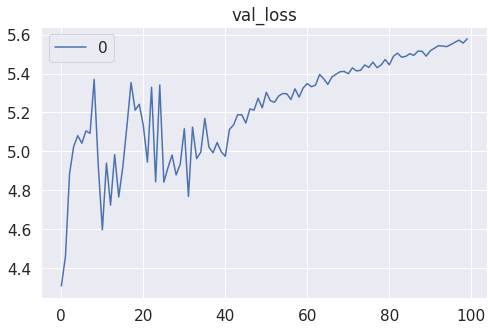

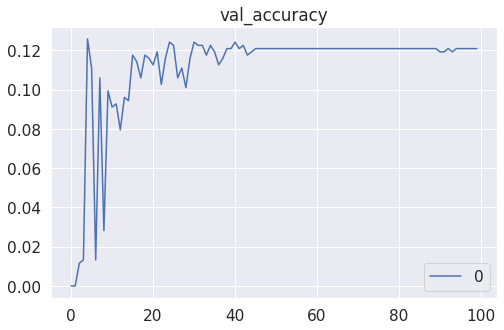

In [66]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_22 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='tanh'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='tanh'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(64, activation='tanh'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=0.009)

insurance_model_22.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_22.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
from sklearn.metrics import classification_report
pred1=insurance_model_22.predict(test_images)

c1 = classification_report(test_labels,pred1,target_names=list(class_names_label.keys()), output_dict=True)
sns.heatmap(pd.DataFrame(c1).iloc[:-1, :].T, annot=True)


Epoch 1/100
19/19 [==============================] - 32s 727ms/step - loss: 4.9928 - accuracy: 0.2138 - val_loss: 2.1228 - val_accuracy: 0.1258
Epoch 2/100
19/19 [==============================] - 13s 708ms/step - loss: 1.8885 - accuracy: 0.3115 - val_loss: 2.3098 - val_accuracy: 0.1126
Epoch 3/100
19/19 [==============================] - 15s 790ms/step - loss: 1.7748 - accuracy: 0.3840 - val_loss: 2.5410 - val_accuracy: 0.0877
Epoch 4/100
19/19 [==============================] - 13s 706ms/step - loss: 1.6500 - accuracy: 0.3969 - val_loss: 3.0645 - val_accuracy: 0.0977
Epoch 5/100
19/19 [==============================] - 14s 712ms/step - loss: 1.5000 - accuracy: 0.4118 - val_loss: 3.6305 - val_accuracy: 0.0464
Epoch 6/100
19/19 [==============================] - 14s 718ms/step - loss: 1.4292 - accuracy: 0.4582 - val_loss: 3.6750 - val_accuracy: 0.1076
Epoch 7/100
19/19 [==============================] - 17s 897ms/step - loss: 1.3584 - accuracy: 0.5008 - val_loss: 3.1497 - val_accuracy:

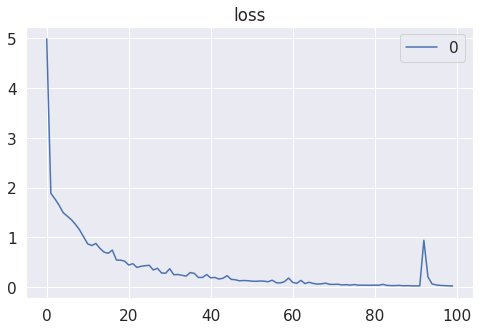

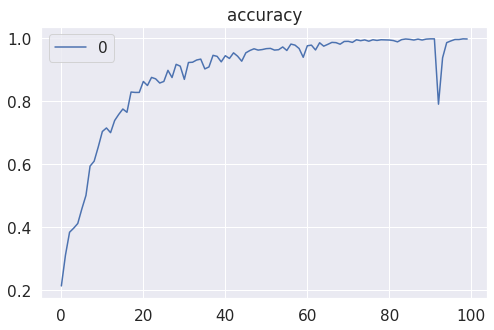

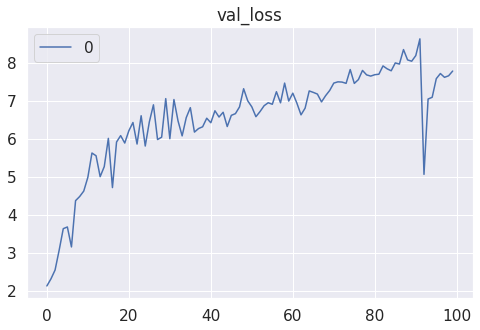

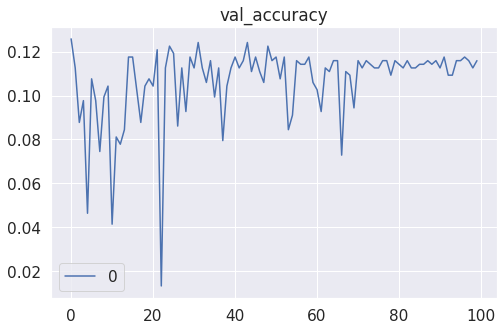

In [67]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_23 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                      #  tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(4096, activation='relu'),
                                      #  tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='relu'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                       tf.keras.layers.Dense(32, activation='relu'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.001)

insurance_model_23.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_23.fit(train_images, train_labels, epochs = 100, validation_split=0.2, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
  from sklearn.metrics import classification_report
pred1=insurance_model_23.predict(test_images)

c1 = classification_report(test_labels,pred1,target_names=list(class_names_label.keys()), output_dict=True)
sns.heatmap(pd.DataFrame(c1).iloc[:-1, :].T, annot=True)


In [68]:
train_images = train_images*255

In [73]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential(train_images, train_labels):
  hidden_units1 = 1024
  hidden_units2 = 256
  hidden_units3 = 128
  hidden_units4 = 7
  learning_rate = 0.0001
  epp = 100
  batch_s = 128

  model = keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 50, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
    tf.keras.layers.Conv2D(32, 50, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
  ])
  
  # Compile the Model
  
  model.compile(optimizer=tf.compat.v1.train.GradientDescentOptimizer(learning_rate, name = 'GradientDescent'),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # Model Training

  # train the model
  history = model.fit(train_images, train_labels, 
                      epochs=epp, 
                      validation_split=0.2,
                      batch_size=batch_s,
                      )
  
  return model,history
  
# build the model
model,history2 = build_model_using_sequential(train_images, train_labels)
plot_history(history2, 'loss')

Epoch 1/100
19/19 [==============================] - 175s 9s/step - loss: 1.9401 - accuracy: 0.1872 - val_loss: 1.9617 - val_accuracy: 0.0546
Epoch 2/100
19/19 [==============================] - 172s 9s/step - loss: 1.9396 - accuracy: 0.1939 - val_loss: 1.9638 - val_accuracy: 0.0795
Epoch 3/100
19/19 [==============================] - 173s 9s/step - loss: 1.9391 - accuracy: 0.2009 - val_loss: 1.9658 - val_accuracy: 0.1076
Epoch 4/100
19/19 [==============================] - 172s 9s/step - loss: 1.9389 - accuracy: 0.2046 - val_loss: 1.9678 - val_accuracy: 0.1209
Epoch 5/100
19/19 [==============================] - 172s 9s/step - loss: 1.9385 - accuracy: 0.2005 - val_loss: 1.9699 - val_accuracy: 0.1225
Epoch 6/100
19/19 [==============================] - 171s 9s/step - loss: 1.9381 - accuracy: 0.1943 - val_loss: 1.9720 - val_accuracy: 0.1258
Epoch 7/100
19/19 [==============================] - 171s 9s/step - loss: 1.9374 - accuracy: 0.1988 - val_loss: 1.9742 - val_accuracy: 0.1258
Epoch 

In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='sigmoid'),
                                       tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(64, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=0.095)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='sigmoid'),
                                       tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(64, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=0.095)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_124 = tf.keras.Sequential([
    
                                       

                                       
                                       tf.keras.layers.Conv2D(32, (10, 10), padding='same', activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Conv2D(64, (10, 10), padding='same',activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(4,4)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(2048, activation='sigmoid'),
                                       tf.keras.layers.Dense(1024, activation='sigmoid'),
                                       tf.keras.layers.Dense(512, activation='sigmoid'),
                                       tf.keras.layers.Dense(256, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(128, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(64, activation='sigmoid'),
                                      #  tf.keras.layers.Dense(32, activation='sigmoid'),
                                       tf.keras.layers.Dense(7, activation='softmax'),
    
])

# 2. Compile the model
optimizer1 = tf.keras.optimizers.SGD(lr=0.095)

insurance_model_124.compile(optimizer=optimizer1,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_124.fit(train_images, train_labels, epochs = 100, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_12 = tf.keras.Sequential([
    
#                                        InceptionV3(input_shape=(128,128,3), include_top=False),

                                       
                                       tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                       tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(1024, activation='sigmoid',kernel_initializer="he_normal"),
                                       tf.keras.layers.Dense(32, activation='elu',kernel_initializer="he_normal"),
                                       tf.keras.layers.Dense(16, activation='elu',kernel_initializer="he_normal"),
                                       
                                       tf.keras.layers.Dense(7),
    
])

# 2. Compile the model

insurance_model_12.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_12.fit(train_images, train_labels, epochs = 50, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    


In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_12 = tf.keras.Sequential([
    
#                                        InceptionV3(input_shape=(128,128,3), include_top=False),

                                       
                                       tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                       tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(1024, activation='sigmoid',kernel_initializer="he_normal"),
                                       tf.keras.layers.Dense(32, activation='elu',kernel_initializer="he_normal"),
                                       tf.keras.layers.Dense(16, activation='elu',kernel_initializer="he_normal"),
                                       
                                       tf.keras.layers.Dense(7),
    
])

# 2. Compile the model

insurance_model_12.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
2


# 3. Fitting the model
history = insurance_model_12.fit(train_images, train_labels, epochs = 50, batch_size=128)
for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
    
